### Import Libraries

In [349]:
!pip install xgboost

In [350]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

### Import Dataset

In [351]:
df = pd.read_excel("Tourism.xlsx", sheet_name = 1)
df[::1000]

CustomerID  ProdTaken   Age TypeofContact  CityTier  DurationOfPitch  \
0         200000          1  41.0  Self Enquiry         3              6.0   
1000      201000          0  52.0  Self Enquiry         1             14.0   
2000      202000          0  27.0  Self Enquiry         1              6.0   
3000      203000          0  54.0  Self Enquiry         1             13.0   
4000      204000          0  24.0  Self Enquiry         3              9.0   

          Occupation  Gender  NumberOfPersonVisited  NumberOfFollowups  \
0           Salaried  Female                      3                3.0   
1000        Salaried  Female                      2                3.0   
2000        Salaried  Female                      3                3.0   
3000        Salaried    Male                      3                4.0   
4000  Large Business    Male                      4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0            Deluxe                    3.0        Single            1.0   
1000          Basic                    5.0      Divorced            1.0   
2000       Standard                    5.0       Married            2.0   
3000         Deluxe                    3.0        Single            4.0   
4000          Basic                    5.0       Married            5.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisited  \
0            1                       2       1                      0.0   
1000         0                       1       1                      1.0   
2000         0                       4       0                      2.0   
3000         0                       5       1                      1.0   
4000         0                       3       1                      3.0   

         Designation  MonthlyIncome  
0            Manager        20993.0  
1000       Executive        17950.0  
2000  Senior Manager        22412.0  
3000         Manager        21128.0  
4000       Executive        21000.0

### Data Information

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

In [353]:
# Check Null Values
df.isnull().sum()

CustomerID                   0
ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

In [354]:
# Fill Null values of Age Column with average value
df["Age"].fillna(df["Age"].mean(), inplace = True)

# Fill Null values of TypeofContact with frequent values
df["TypeofContact"].fillna("Self Enquiry", inplace = True)

# Fill Null Values of DurationOfPitch with average value
df["DurationOfPitch"].fillna(df["DurationOfPitch"].mean(), inplace = True)

# Fill Null Values of NumberOfFollowups with average value
df["NumberOfFollowups"].fillna(4, inplace = True)

# Fill Null Values of PreferredPropertyStar with average value
df["PreferredPropertyStar"].fillna(3, inplace = True)

# Fill Null Values of NumberOfTrips with average value
df["NumberOfTrips"].fillna(df["NumberOfTrips"].mean(), inplace = True)

# Fill Null Values of NumberOfChildrenVisited  with average value
df["NumberOfChildrenVisited"].fillna(2,inplace = True)

# Fill Null Values of MonthlyIncome with average value
df["MonthlyIncome"].fillna(df["MonthlyIncome"].mean(), inplace = True)

In [355]:
df["Gender"] = df["Gender"].replace("Fe Male", "Female")

In [356]:
# Again Check if null values left 
df.isnull().sum()

CustomerID                 0
ProdTaken                  0
Age                        0
TypeofContact              0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

In [357]:
# Check Data Information Again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4888 non-null   float64
 3   TypeofContact            4888 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4888 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4888 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4888 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4888 non-null   float64
 14  Passport                

### Univariate Analysis

In [358]:
# Statistics of features
df.describe()

CustomerID    ProdTaken          Age     CityTier  DurationOfPitch  \
count    4888.000000  4888.000000  4888.000000  4888.000000      4888.000000   
mean   202443.500000     0.188216    37.622265     1.654255        15.490835   
std      1411.188388     0.390925     9.098418     0.916583         8.297971   
min    200000.000000     0.000000    18.000000     1.000000         5.000000   
25%    201221.750000     0.000000    31.000000     1.000000         9.000000   
50%    202443.500000     0.000000    37.000000     1.000000        14.000000   
75%    203665.250000     0.000000    43.000000     3.000000        19.000000   
max    204887.000000     1.000000    61.000000     3.000000       127.000000   

       NumberOfPersonVisited  NumberOfFollowups  PreferredPropertyStar  \
count            4888.000000        4888.000000            4888.000000   
mean                2.905074           3.711129               3.577946   
std                 0.724891           0.998271               0.797005   
min                 1.000000           1.000000               3.000000   
25%                 2.000000           3.000000               3.000000   
50%                 3.000000           4.000000               3.000000   
75%                 3.000000           4.000000               4.000000   
max                 5.000000           6.000000               5.000000   

       NumberOfTrips     Passport  PitchSatisfactionScore       OwnCar  \
count    4888.000000  4888.000000             4888.000000  4888.000000   
mean        3.236521     0.290917                3.078151     0.620295   
std         1.822342     0.454232                1.365792     0.485363   
min         1.000000     0.000000                1.000000     0.000000   
25%         2.000000     0.000000                2.000000     0.000000   
50%         3.000000     0.000000                3.000000     1.000000   
75%         4.000000     1.000000                4.000000     1.000000   
max        22.000000     1.000000                5.000000     1.000000   

       NumberOfChildrenVisited  MonthlyIncome  
count              4888.000000    4888.000000  
mean                  1.198241   23619.853491  
std                   0.857197    5250.862747  
min                   0.000000    1000.000000  
25%                   1.000000   20485.000000  
50%                   1.000000   22655.000000  
75%                   2.000000   25424.750000  
max                   3.000000   98678.000000

### Remove Outliers

In [359]:
# Remove Duration of Pitch outliers which are 127. It seems unrealistic
df = df[df["DurationOfPitch"] < 40]

In [360]:
# Remove Number of Trips greater than 8 which are just 4. They seems outliers
df = df[df["NumberOfTrips"] < 9]

In [361]:
# Remove Monthly income of Salaried Person greater than 40000 which are just 2. They seems outliers
df = df[df["MonthlyIncome"] < 40000]

### Bivariate Analysis

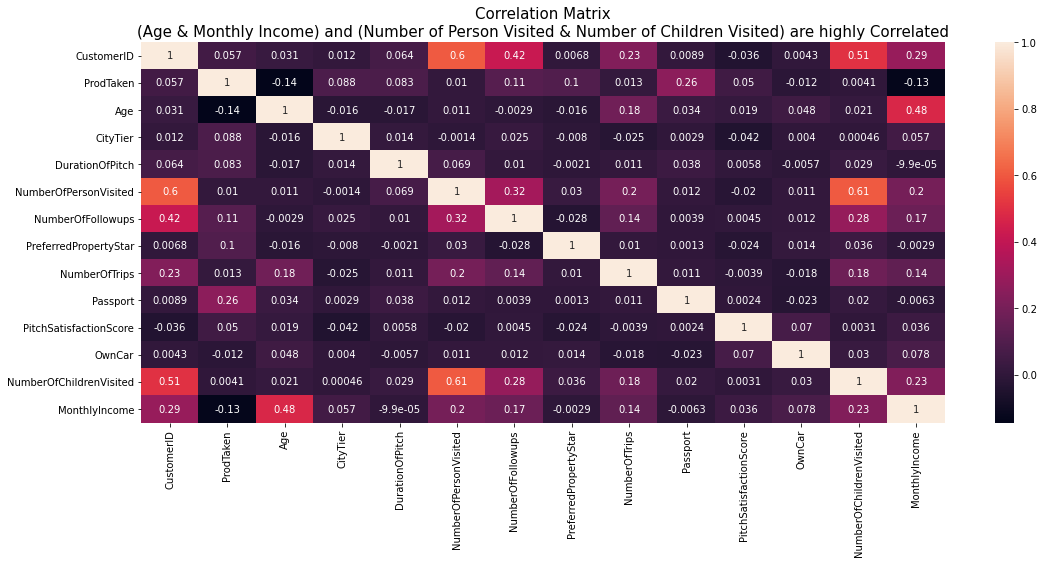

In [362]:
# Correlation
plt.figure(figsize = (18, 7))
correlation = df.corr()
sns.heatmap(correlation, annot = True)
plt.title("Correlation Matrix\n(Age & Monthly Income) and (Number of Person Visited & Number of Children Visited) are highly Correlated", size = 15)
print("\n")
plt.show()
plt.savefig("Corerelation")
plt.close()
plt.show()

### Exploratory Data Analysis

**Frequency of Product Taken Flag**

In [363]:
fc = df["ProdTaken"].value_counts().to_frame().reset_index()
fc.columns = ["ProdTaken", "Frequency"] 
fc = fc.sort_values(by = "Frequency", ascending = False)
fc

ProdTaken  Frequency
0          0       3962
1          1        918

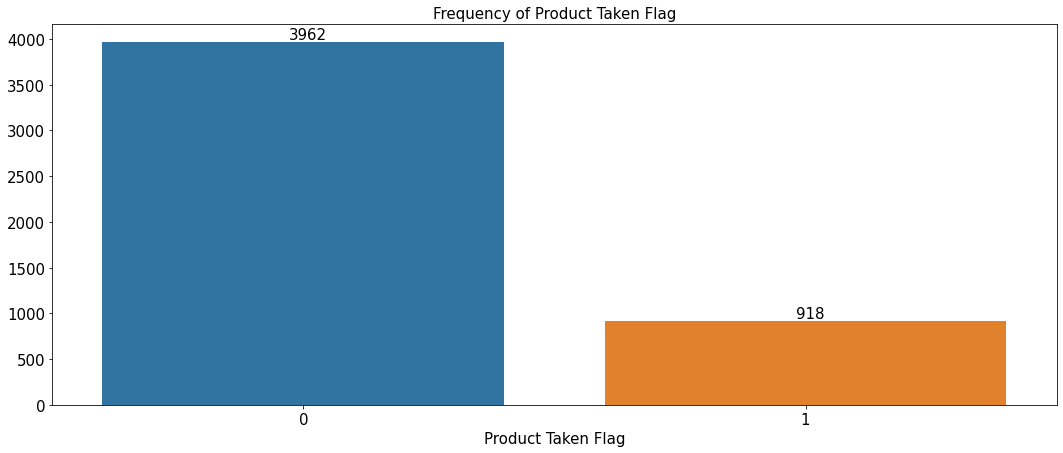

In [364]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "ProdTaken", y = "Frequency", data = fc)
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Product Taken Flag", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Product Taken Flag", size = 15) 
plt.ylabel(None)
plt.show()

**Distribution of Age**

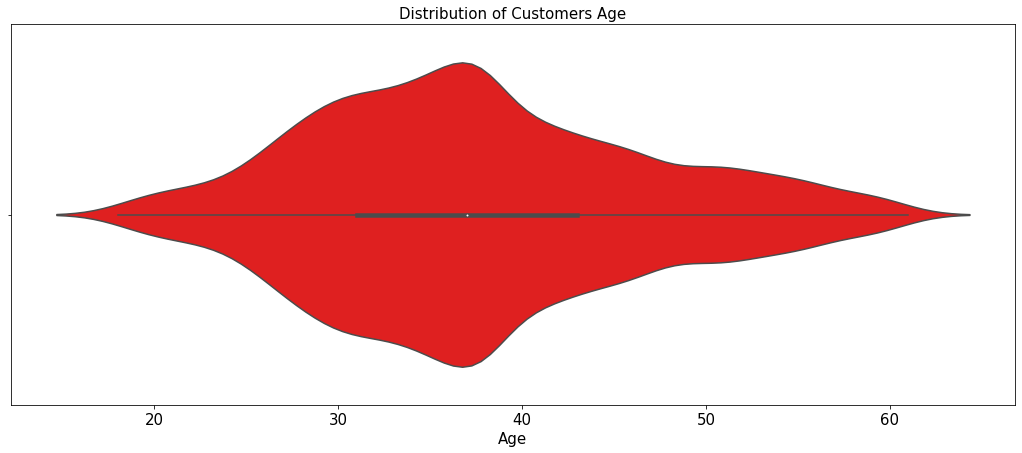

In [365]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "Age", data = df, color = "red")
plt.title("Distribution of Customers Age", size = 15)
plt.xlabel("Age", size = 15)
plt.xticks(size = 15)
plt.show()

**Frequency of Type of Contact**

In [366]:
ft = df["TypeofContact"].value_counts().to_frame().reset_index()
ft.columns = ["TypeofContact", "Frequency"] 
ft = ft.sort_values(by = "Frequency", ascending = False)
ft

TypeofContact  Frequency
0     Self Enquiry       3467
1  Company Invited       1413

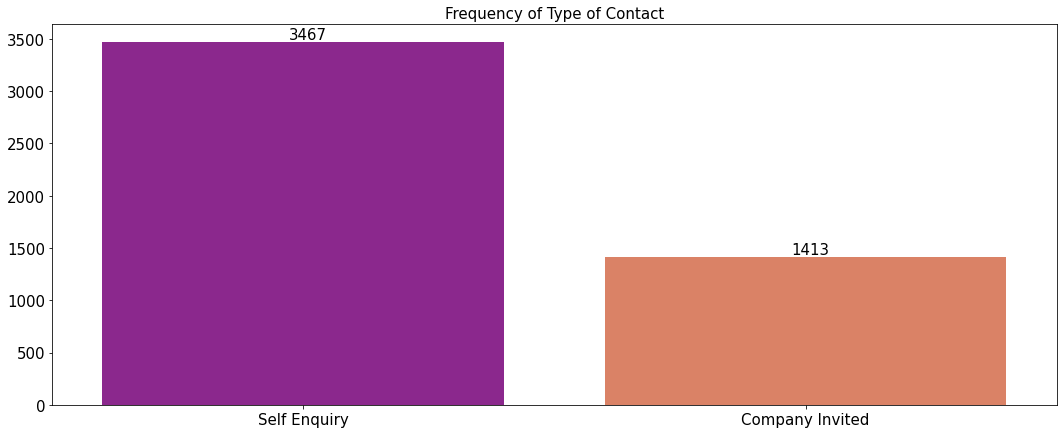

In [367]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "TypeofContact", y = "Frequency", data = ft, palette = "plasma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Type of Contact", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Frequency of City Tier**

In [368]:
fct = df["CityTier"].value_counts().to_frame().reset_index()
fct.columns = ["CityTier", "Frequency"] 
fct = fct.sort_values(by = "Frequency", ascending = False)
fct

CityTier  Frequency
0         1       3184
1         3       1498
2         2        198

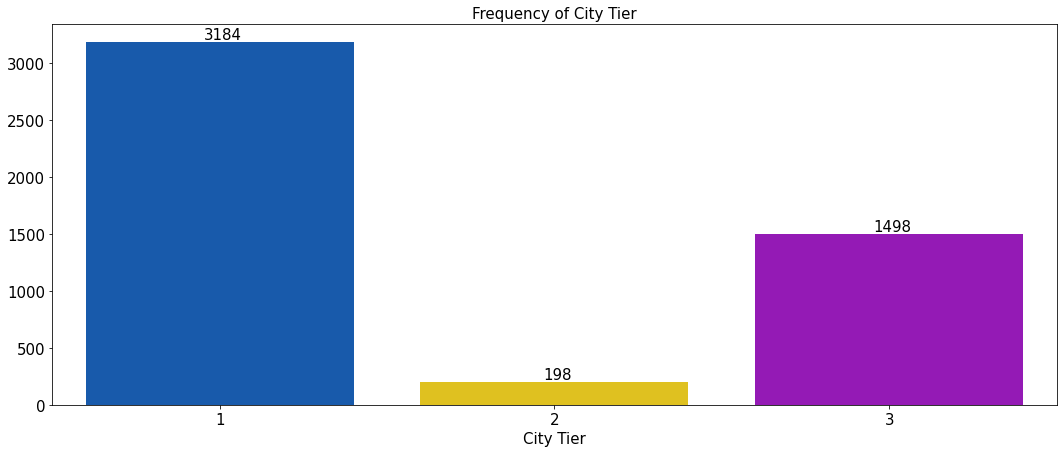

In [369]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "CityTier", y = "Frequency", data = fct, palette = "prism")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of City Tier", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("City Tier", size = 15)
plt.ylabel(None)
plt.show()

**Distribution of Duration of Pitch**

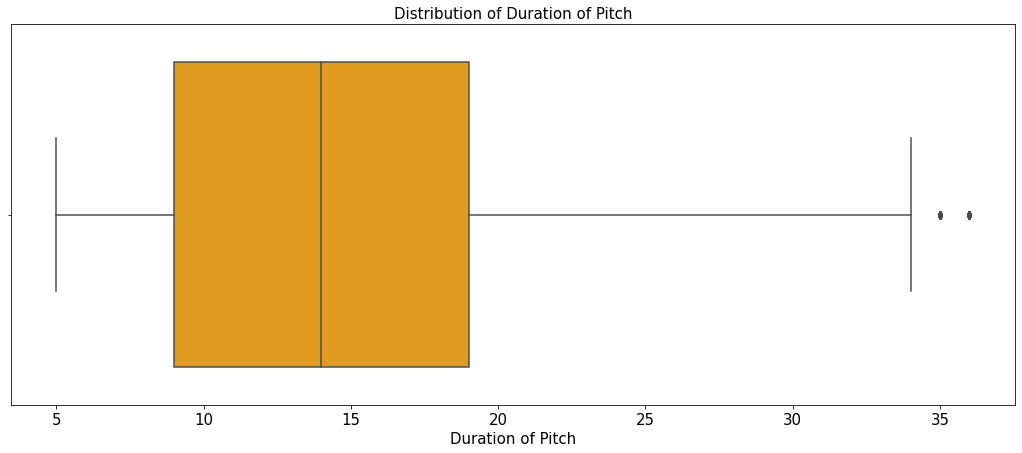

In [370]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "DurationOfPitch", data = df, color = "orange")
plt.title("Distribution of Duration of Pitch", size = 15)
plt.xlabel("Duration of Pitch", size = 15)
plt.xticks(size = 15)
plt.show()

**Frequency of Customer Occupation**

In [371]:
fco = df["Occupation"].value_counts().to_frame().reset_index()
fco.columns = ["Occupation", "Frequency"] 
fco = fco.sort_values(by = "Frequency", ascending = False)
fco

Occupation  Frequency
0        Salaried       2362
1  Small Business       2084
2  Large Business        432
3     Free Lancer          2

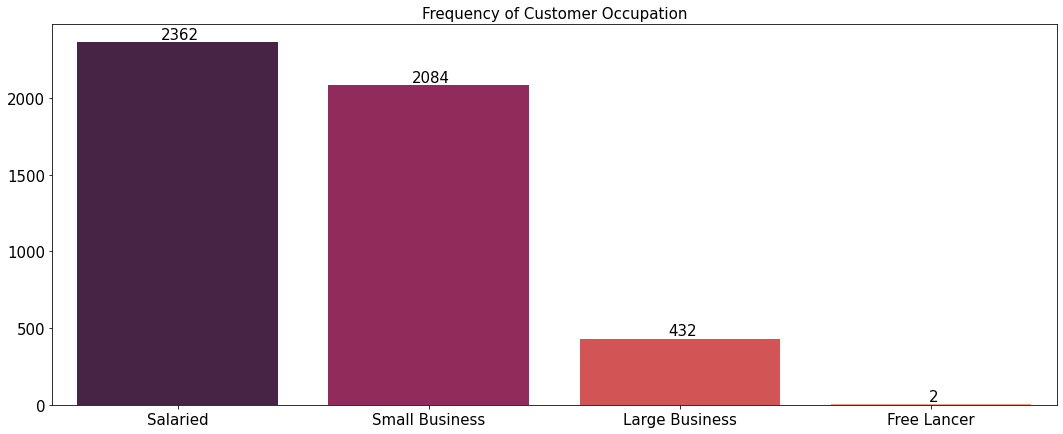

In [372]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Occupation", y = "Frequency", data = fco, palette = "rocket")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Customer Occupation", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Frequency of Gender**

In [373]:
fg = df["Gender"].value_counts().to_frame().reset_index()
fg.columns = ["Gender", "Frequency"] 
fg = fg.sort_values(by = "Frequency", ascending = False)
fg

Gender  Frequency
0    Male       2910
1  Female       1970

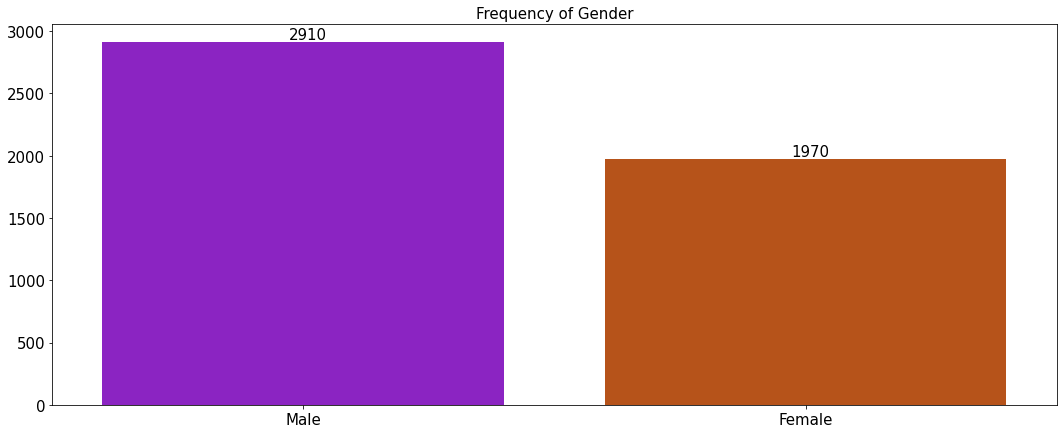

In [374]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Gender", y = "Frequency", data = fg, palette = "gnuplot")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Gender", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Frequency of Numbers of Person Visited**

In [375]:
fp = df["NumberOfPersonVisited"].value_counts().to_frame().reset_index()
fp.columns = ["NumberOfPersonVisited", "Frequency"] 
fp = fp.sort_values(by = "Frequency", ascending = False)
fp

NumberOfPersonVisited  Frequency
0                      3       2398
1                      2       1415
2                      4       1025
3                      1         39
4                      5          3

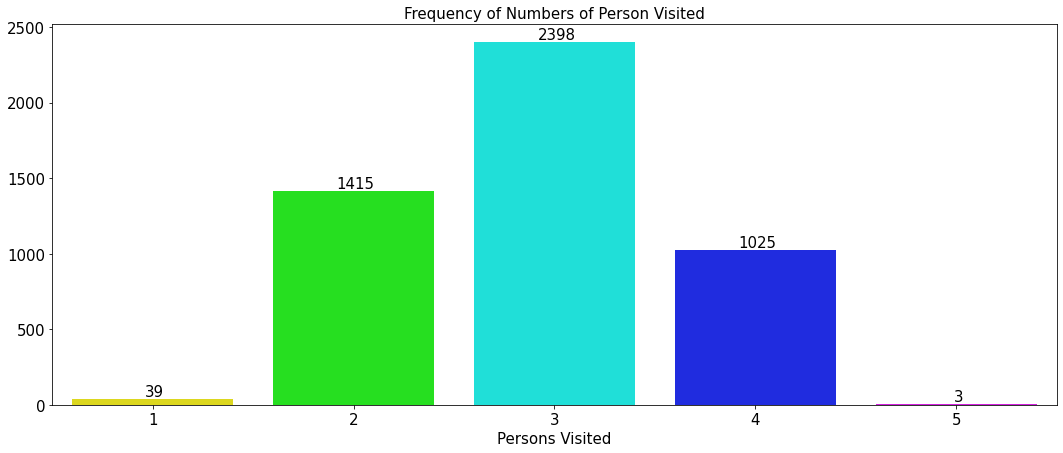

In [376]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "NumberOfPersonVisited", y = "Frequency", data = fp, palette = "hsv")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Numbers of Person Visited", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Persons Visited", size = 15)
plt.ylabel(None)
plt.show()

**Frequency of Number of Followups**

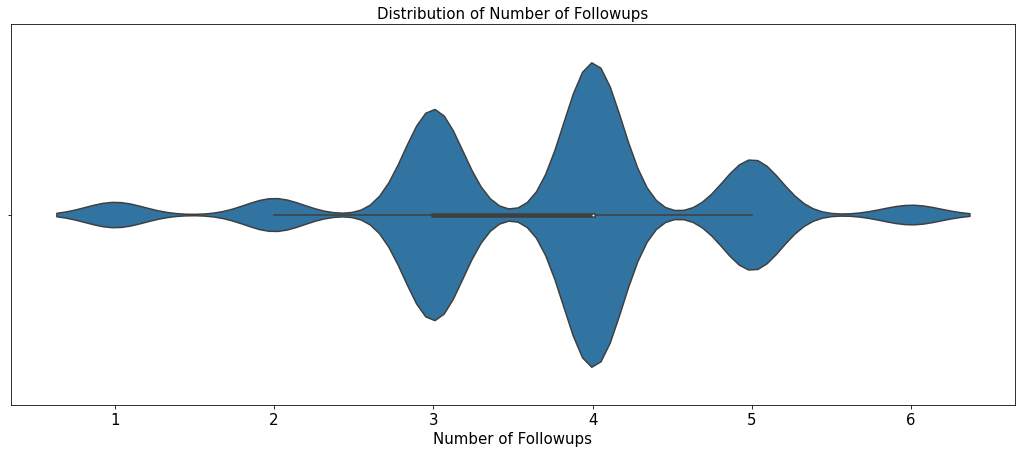

In [377]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "NumberOfFollowups", data = df)
plt.title("Distribution of Number of Followups", size = 15)
plt.xlabel("Number of Followups", size = 15)
plt.xticks(size = 15)
plt.show()

**Frequency of Products Pitched** 

In [378]:
fpp = df["ProductPitched"].value_counts().to_frame().reset_index()
fpp.columns = ["ProductPitched", "Frequency"] 
fpp = fpp.sort_values(by = "Frequency", ascending = False)
fpp

ProductPitched  Frequency
0          Basic       1836
1         Deluxe       1730
2       Standard        742
3   Super Deluxe        342
4           King        230

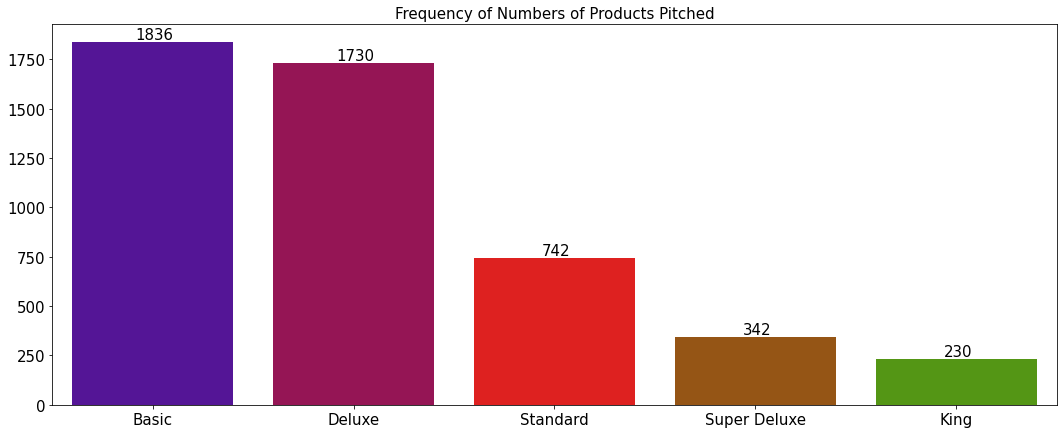

In [379]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "ProductPitched", y = "Frequency", data = fpp, palette = "brg")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Numbers of Products Pitched", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Frequency of Preferred Property Star**

In [380]:
fps = df["PreferredPropertyStar"].round(2).value_counts().to_frame().reset_index()
fps.columns = ["PreferredPropertyStar", "Frequency"] 
fps = fps.sort_values(by = "Frequency", ascending = False)
fps

PreferredPropertyStar  Frequency
0                    3.0       3014
1                    5.0        955
2                    4.0        911

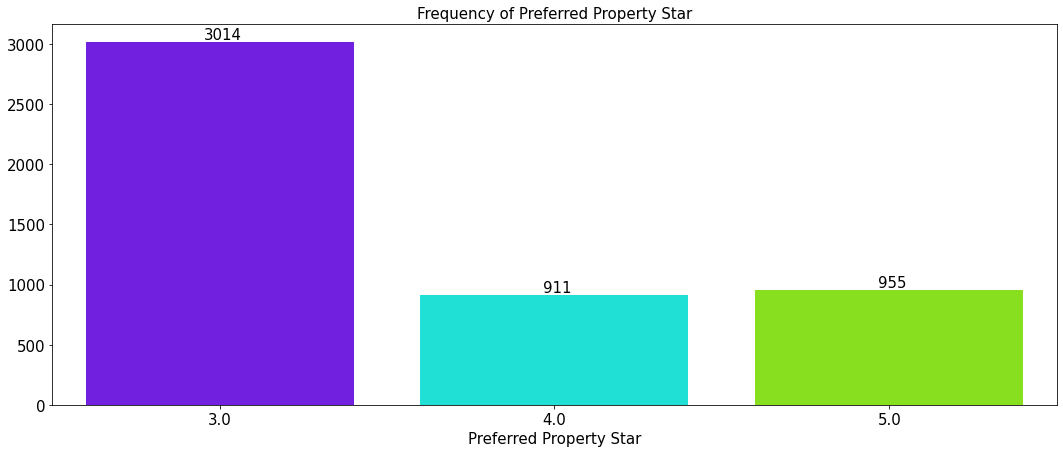

In [381]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "PreferredPropertyStar", y = "Frequency", data = fps, palette = "hsv_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Preferred Property Star", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Preferred Property Star", size = 15)
plt.ylabel(None)
plt.show()

**Frequency of Marital Status**


In [382]:
fms = df["MaritalStatus"].value_counts().to_frame().reset_index()
fms.columns = ["MaritalStatus", "Frequency"] 
fms = fms.sort_values(by = "Frequency", ascending = False)
fms

MaritalStatus  Frequency
0       Married       2338
1      Divorced        948
2        Single        914
3     Unmarried        680

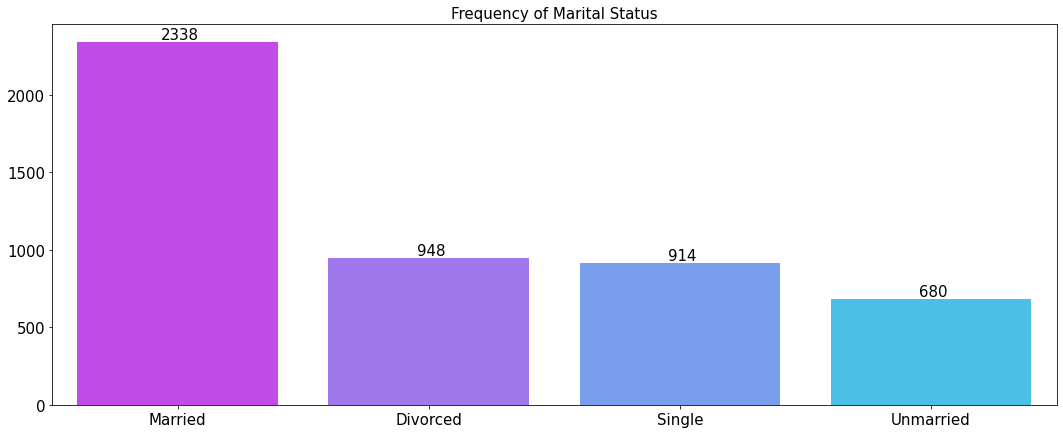

In [383]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "MaritalStatus", y = "Frequency", data = fms, palette = "cool_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Marital Status", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Frequency of Number of Trips**

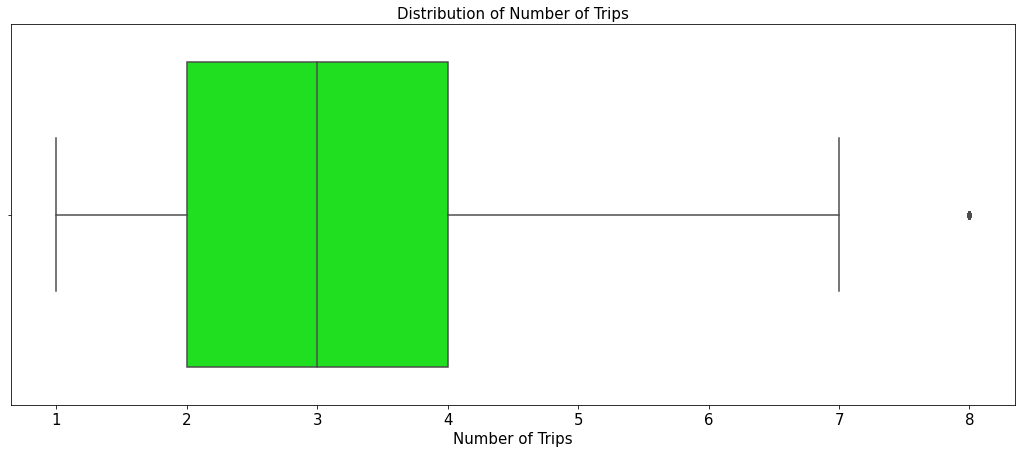

In [384]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "NumberOfTrips", data = df, color = "lime")
plt.title("Distribution of Number of Trips", size = 15)
plt.xlabel("Number of Trips", size = 15)
plt.xticks(size = 15)
plt.show()

**Frequency of Passport**

In [385]:
fp = df["Passport"].value_counts().to_frame().reset_index()
fp.columns = ["Passport", "Frequency"] 
fp = fp.sort_values(by = "Frequency", ascending = False)
fp

Passport  Frequency
0         0       3462
1         1       1418

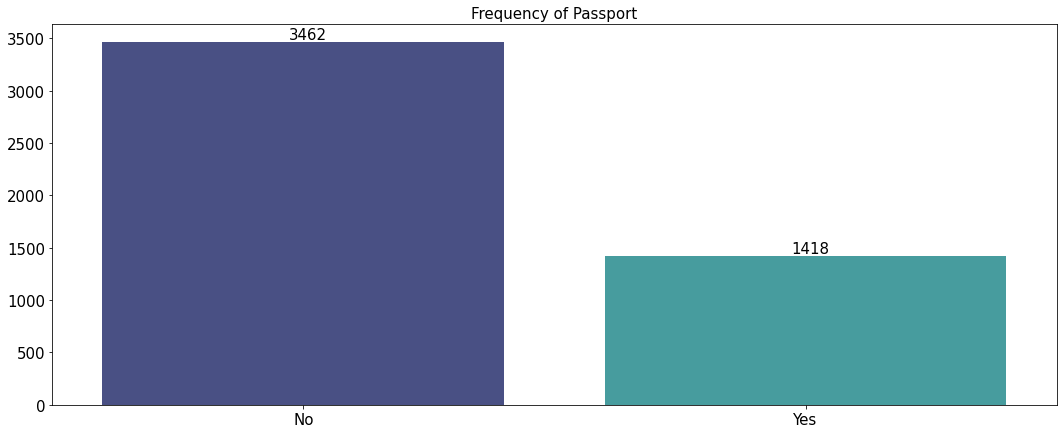

In [386]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Passport", y = "Frequency", data = fp, palette = "mako")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Passport", size = 15)
plt.xticks([0, 1], ["No", "Yes"], size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Frequency of Pitch Satisfaction Score**

In [387]:
fps = df["PitchSatisfactionScore"].value_counts().to_frame().reset_index()
fps.columns = ["PitchSatisfactionScore", "Frequency"] 
fps = fps.sort_values(by = "Frequency", ascending = False)
fps

PitchSatisfactionScore  Frequency
0                       3       1478
1                       5        970
2                       1        940
3                       4        910
4                       2        582

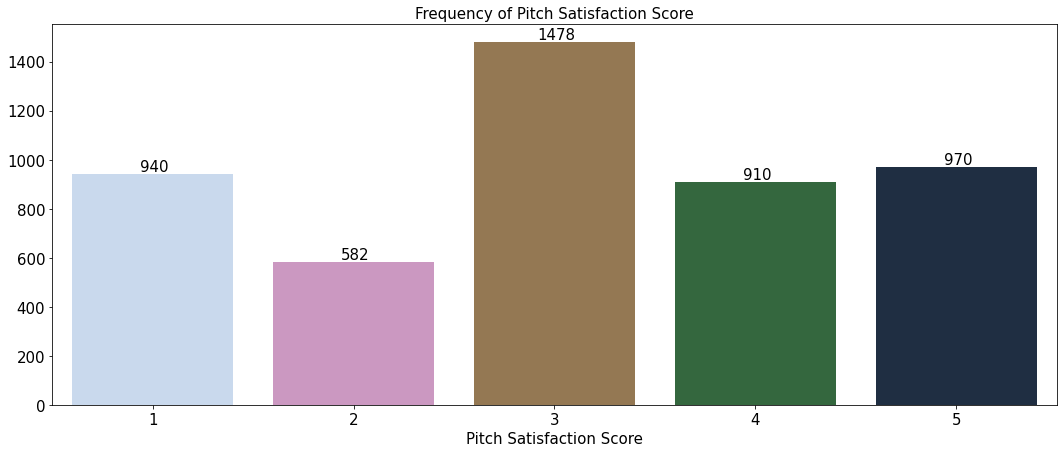

In [388]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "PitchSatisfactionScore", y = "Frequency", data = fps, palette = "cubehelix_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Pitch Satisfaction Score", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Pitch Satisfaction Score", size = 15)
plt.ylabel(None)
plt.show()

**Frequency of Customers having Car**

In [389]:
fcc = df["OwnCar"].value_counts().to_frame().reset_index()
fcc.columns = ["OwnCar", "Frequency"] 
fcc = fcc.sort_values(by = "Frequency", ascending = False)
fcc

OwnCar  Frequency
0       1       3024
1       0       1856

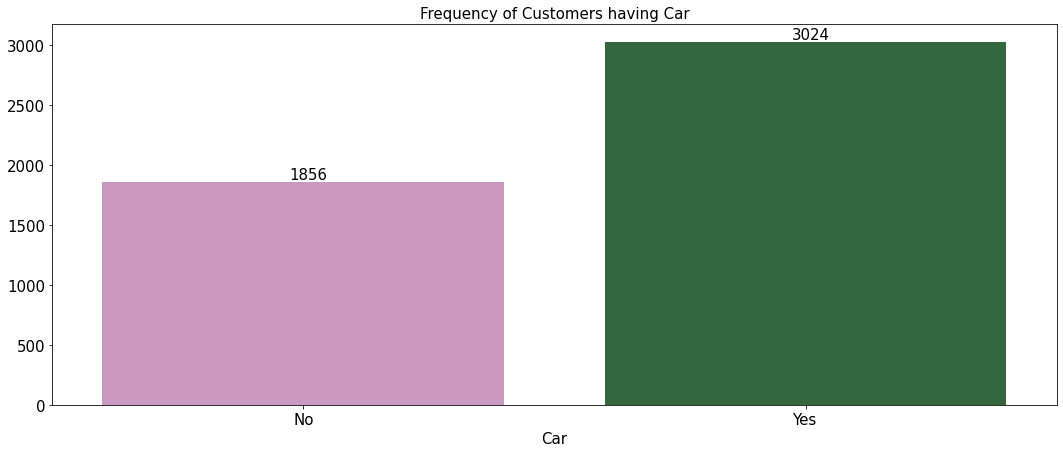

In [390]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "OwnCar", y = "Frequency", data = fcc, palette = "cubehelix_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Customers having Car", size = 15)
plt.xticks([0, 1], ["No", "Yes"], size = 15)
plt.yticks(size = 15)
plt.xlabel("Car", size = 15)
plt.ylabel(None)
plt.show()

**Frequency of Number of Childrens Visited**

In [391]:
fcv = df["NumberOfChildrenVisited"].value_counts().to_frame().reset_index()
fcv.columns = ["NumberOfChildrenVisited", "Frequency"] 
fcv = fcv.sort_values(by = "Frequency", ascending = False)
fcv

NumberOfChildrenVisited  Frequency
0                      1.0       2076
1                      2.0       1399
2                      0.0       1080
3                      3.0        325

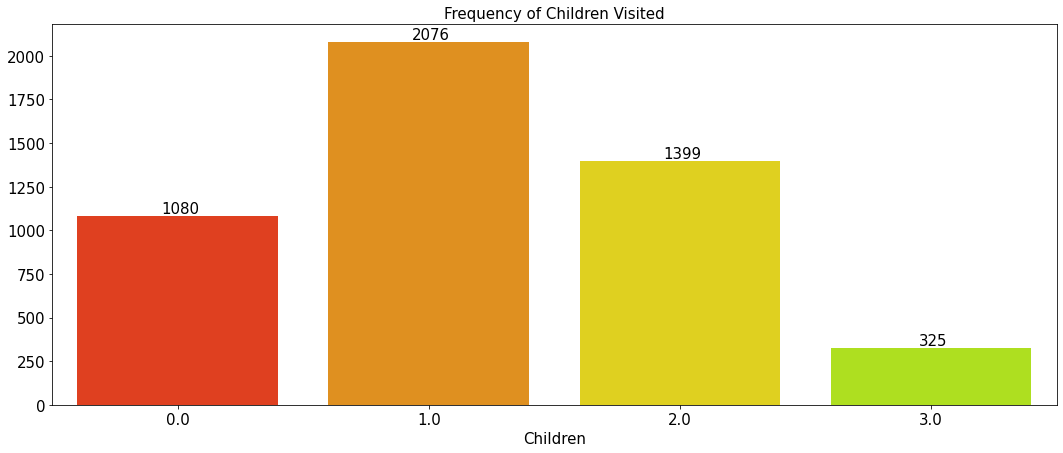

In [392]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "NumberOfChildrenVisited", y = "Frequency", data = fcv, palette = "prism")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Children Visited", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Children", size = 15)
plt.ylabel(None)
plt.show()

**Frequency of Customers Designation**

In [393]:
fcd = df["Designation"].value_counts().to_frame().reset_index()
fcd.columns = ["Designation", "Frequency"] 
fcd = fcd.sort_values(by = "Frequency", ascending = False)
fcd

Designation  Frequency
0       Executive       1836
1         Manager       1730
2  Senior Manager        742
3             AVP        342
4              VP        230

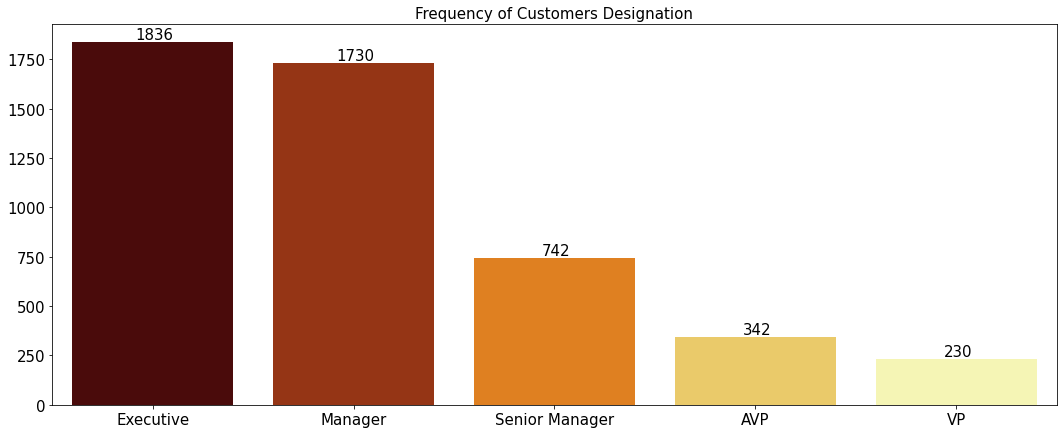

In [394]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Designation", y = "Frequency", data = fcd, palette = "afmhot")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Customers Designation", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Distribution of Monthly Income**

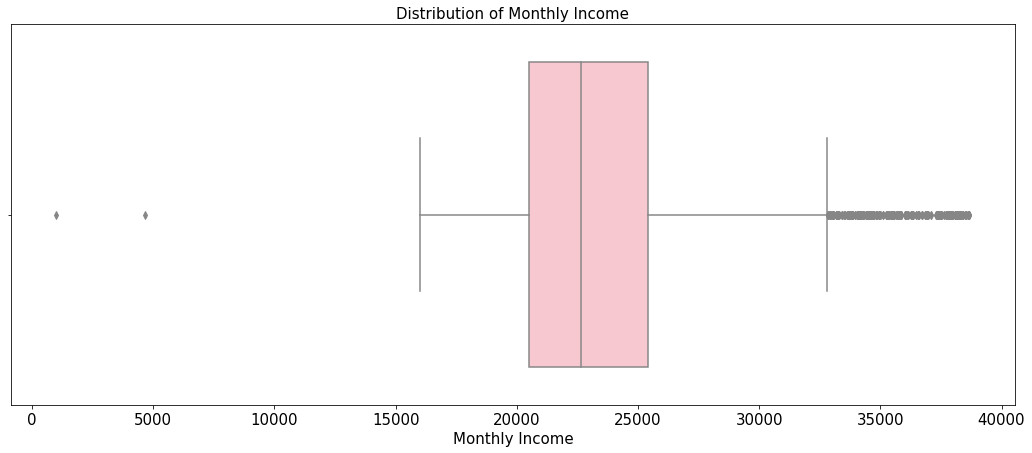

In [395]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "MonthlyIncome", data = df, color = "pink")
plt.title("Distribution of Monthly Income", size = 15)
plt.xlabel("Monthly Income", size = 15)
plt.xticks(size = 15)
plt.show()

### Advanced Analytics

**Age by Product Taken Flag**

In [396]:
pa = df.groupby("ProdTaken")["Age"].agg(["min", "mean", "max"]).round(2).reset_index()
pa.columns = ["Product Taken Flag", "Min Age", "Avg Age", "Max Age"]
pa

Product Taken Flag  Min Age  Avg Age  Max Age
0                   0     18.0    38.25     61.0
1                   1     18.0    34.92     60.0

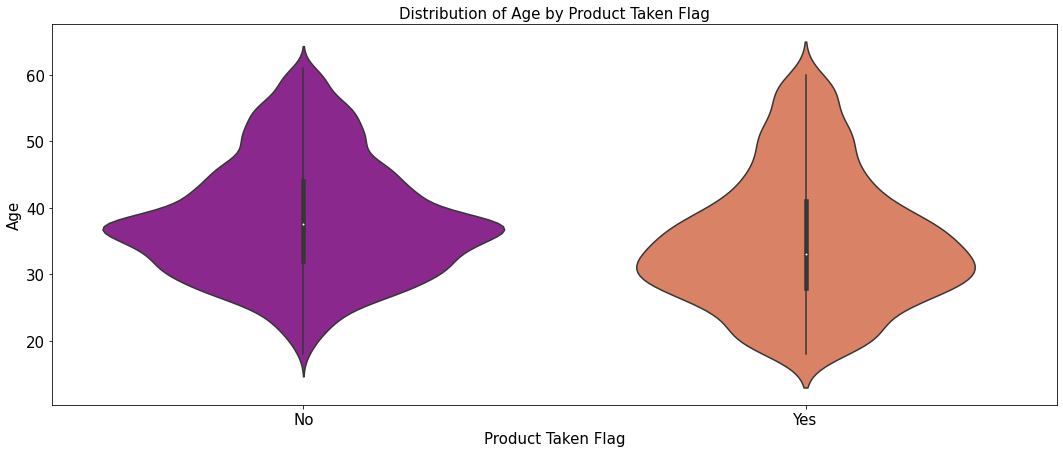

In [397]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "ProdTaken", y = "Age", data = df, palette = "plasma")
plt.title("Distribution of Age by Product Taken Flag", size = 15)
plt.xlabel("Product Taken Flag", size = 15)
plt.ylabel("Age", size = 15)
plt.xticks([0, 1], ["No", "Yes"], size =15)
plt.yticks(size = 15)
plt.show()

**Products Taken Flag by Type of Contact**

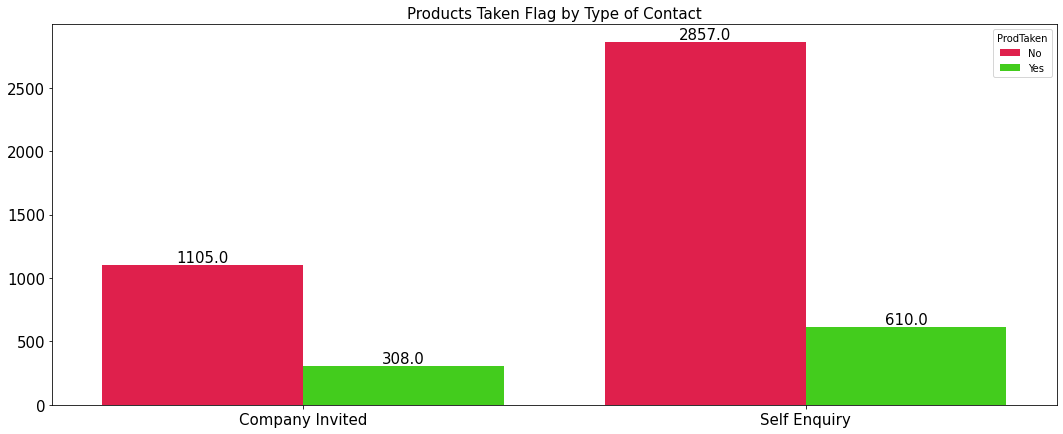

In [398]:
pt_tc = df.groupby(["TypeofContact", "ProdTaken"])["ProdTaken"].agg(["count"]).reset_index()
pt_tc["ProdTaken"] = pt_tc["ProdTaken"].replace([0, 1], ["No", "Yes"])

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "TypeofContact", y = "count", hue = "ProdTaken", data = pt_tc, palette = "prism_r")
for p in graph.patches:
        graph.annotate('{:.01f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Products Taken Flag by Type of Contact", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**City Tier by Product Taken Flag**

In [399]:
ct_pt = df.groupby("ProdTaken")["CityTier"].agg(["min", "mean", "max"]).round(2).reset_index()
ct_pt.columns = ["Product Taken Flag", "Min City Tier", "Avg City Tier", "Max City Tier"]
ct_pt

Product Taken Flag  Min City Tier  Avg City Tier  Max City Tier
0                   0              1           1.62              3
1                   1              1           1.82              3

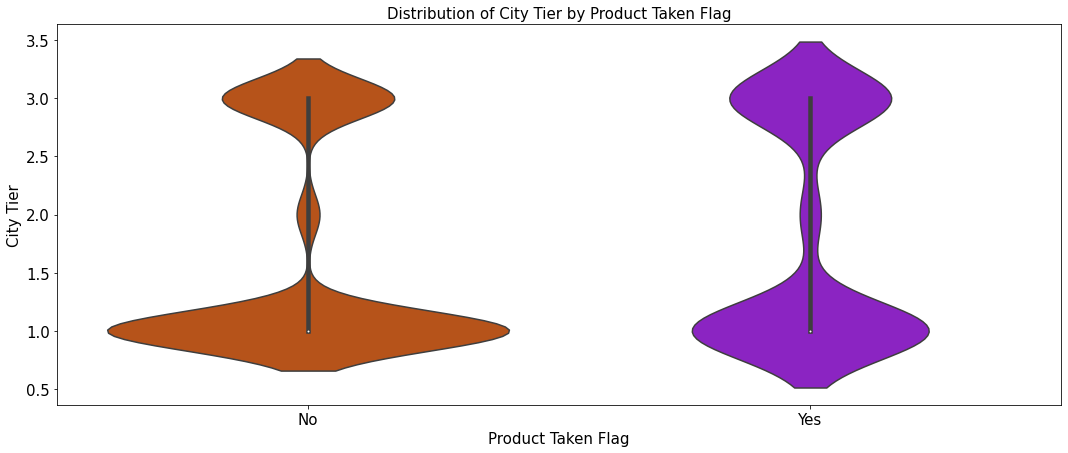

In [400]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "ProdTaken", y = "CityTier", data = df, palette = "gnuplot_r")
plt.title("Distribution of City Tier by Product Taken Flag", size = 15)
plt.xlabel("Product Taken Flag", size = 15)
plt.ylabel("City Tier", size = 15)
plt.xticks([0, 1], ["No", "Yes"], size =15)
plt.yticks(size = 15)
plt.show()

**Duration of Pitch by Product Taken Flag**

In [401]:
dp_pt = df.groupby("ProdTaken")["DurationOfPitch"].agg(["min", "mean", "max"]).round(2).reset_index()
dp_pt.columns = ["Product Taken Flag", "Min Duration of Pitch", "Avg Duration of Pitch", "Max Duration of Pitch"]
dp_pt

Product Taken Flag  Min Duration of Pitch  Avg Duration of Pitch  \
0                   0                    5.0                  15.13   
1                   1                    6.0                  16.82   

   Max Duration of Pitch  
0                   36.0  
1                   36.0

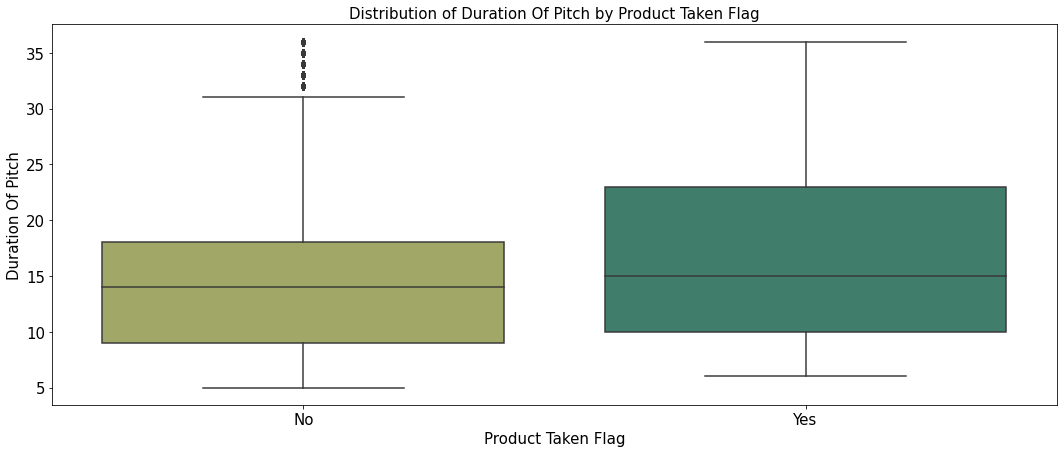

In [402]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "ProdTaken", y = "DurationOfPitch", data = df, palette = "gist_earth_r")
plt.title("Distribution of Duration Of Pitch by Product Taken Flag", size = 15)
plt.xlabel("Product Taken Flag", size = 15)
plt.ylabel("Duration Of Pitch", size = 15)
plt.xticks([0, 1], ["No", "Yes"], size =15)
plt.yticks(size = 15)
plt.show()

**Occupation by Product Taken Flag**

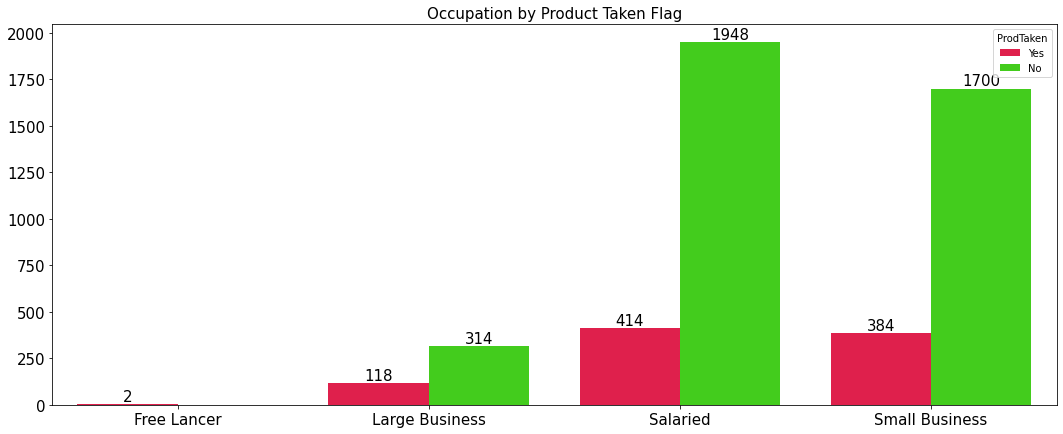

In [403]:
o_pt = df.groupby(["Occupation", "ProdTaken"])["ProdTaken"].agg(["count"]).reset_index()

o_pt["ProdTaken"] = o_pt["ProdTaken"].replace([0, 1], ["No", "Yes"])

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Occupation", y = "count", hue = "ProdTaken", data = o_pt, palette = "prism_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Occupation by Product Taken Flag", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Gender by Product Taken Flag**

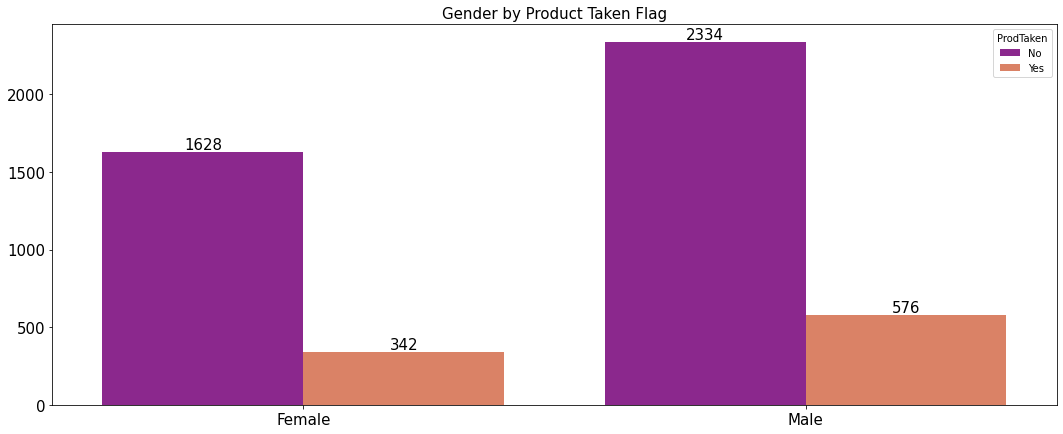

In [404]:
g_pt = df.groupby(["Gender", "ProdTaken"])["ProdTaken"].agg(["count"]).reset_index()

g_pt["ProdTaken"] = g_pt["ProdTaken"].replace([0, 1], ["No", "Yes"])

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Gender", y = "count", hue = "ProdTaken", data = g_pt, palette = "plasma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Gender by Product Taken Flag", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Number of Person Visited by Product Taken Flag**

In [405]:
pv_pt = df.groupby("ProdTaken")["NumberOfPersonVisited"].agg(["min", "mean", "max"]).round(2).reset_index()
pv_pt.columns = ["Product Taken Flag", "Min Person Visited", "Avg Person Visited", "Max Person Visited"]
pv_pt

Product Taken Flag  Min Person Visited  Avg Person Visited  \
0                   0                   1                2.90   
1                   1                   2                2.92   

   Max Person Visited  
0                   5  
1                   4

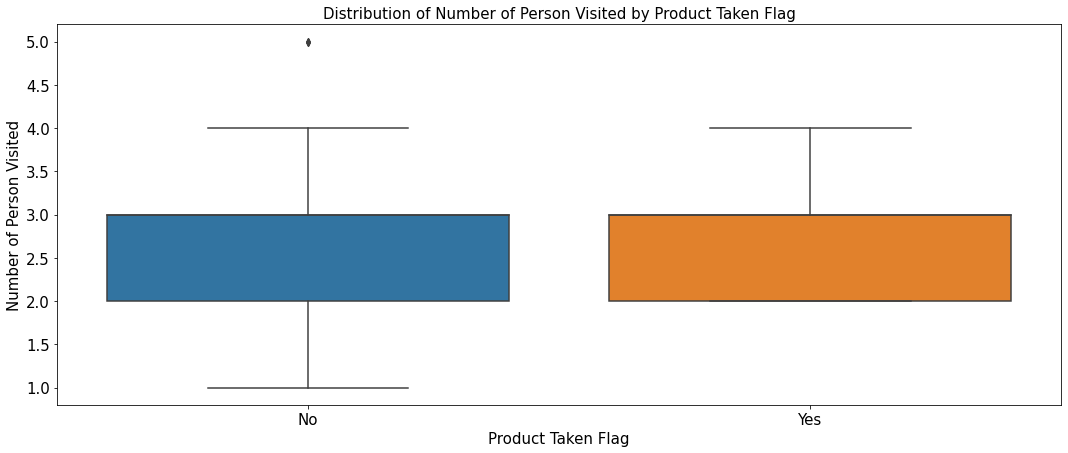

In [406]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "ProdTaken", y = "NumberOfPersonVisited",data = df)
plt.title("Distribution of Number of Person Visited by Product Taken Flag", size = 15)
plt.xlabel("Product Taken Flag", size = 15)
plt.ylabel("Number of Person Visited", size = 15)
plt.xticks([0, 1], ["No", "Yes"], size =15)
plt.yticks(size = 15)
plt.show()

**Number of Followups by Product Taken Flag**

In [407]:
f_pt = df.groupby("ProdTaken")["NumberOfFollowups"].agg(["min", "mean", "max"]).round(2).reset_index()
f_pt.columns = ["Product Taken Flag", "Min Number of Followups", "Avg Number of Followups", "Max Number of Followups"]
f_pt

Product Taken Flag  Min Number of Followups  Avg Number of Followups  \
0                   0                      1.0                     3.66   
1                   1                      1.0                     3.94   

   Max Number of Followups  
0                      6.0  
1                      6.0

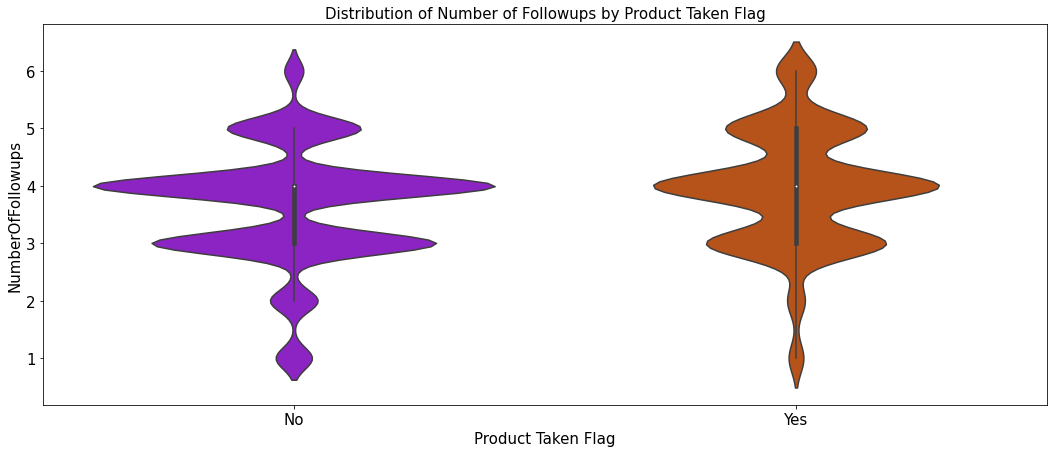

In [408]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "ProdTaken", y = "NumberOfFollowups",data = df, palette = "gnuplot")
plt.title("Distribution of Number of Followups by Product Taken Flag", size = 15)
plt.xlabel("Product Taken Flag", size = 15)
plt.ylabel("NumberOfFollowups", size = 15)
plt.xticks([0, 1], ["No", "Yes"], size =15)
plt.yticks(size = 15)
plt.show()

**Product Pitched by Product Taken Flag**

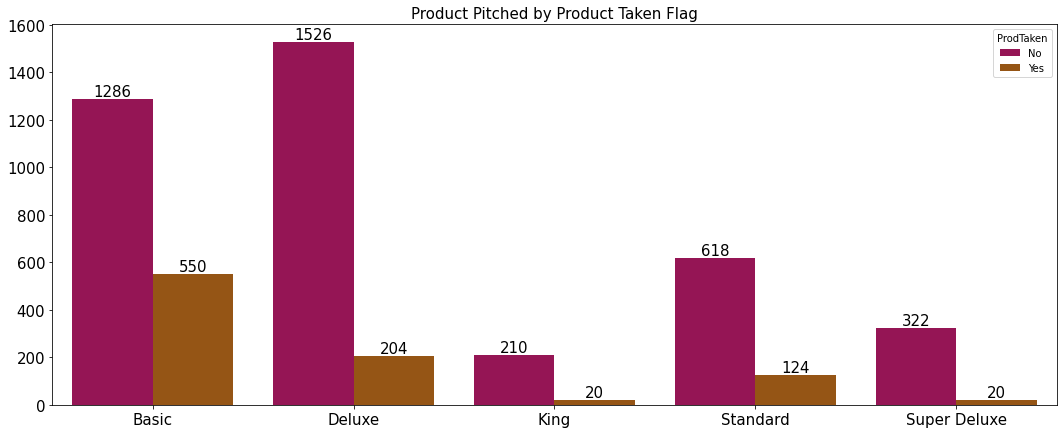

In [409]:
pp_pt = df.groupby(["ProductPitched", "ProdTaken"])["ProdTaken"].agg(["count"]).reset_index()
pp_pt["ProdTaken"] = pp_pt["ProdTaken"].replace([0, 1], ["No", "Yes"])

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "ProductPitched", y = "count", hue = "ProdTaken", data = pp_pt, palette = "brg")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Product Pitched by Product Taken Flag", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Preferred Property Star by Product Taken Flag**

In [410]:
ps_pt = df.groupby("ProdTaken")["PreferredPropertyStar"].agg(["min", "mean", "max"]).round(2).reset_index()
ps_pt.columns = ["Product Taken", "Min Star", "Avg Star", "Max Star"]
ps_pt

Product Taken  Min Star  Avg Star  Max Star
0              0       3.0      3.54       5.0
1              1       3.0      3.74       5.0

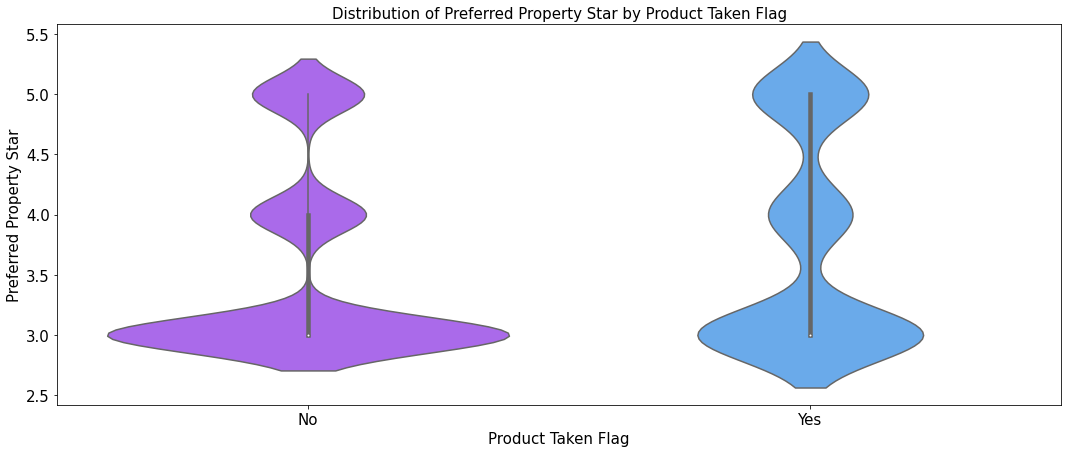

In [411]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "ProdTaken", y = "PreferredPropertyStar", data = df, palette = "cool_r")
plt.title("Distribution of Preferred Property Star by Product Taken Flag", size = 15)
plt.xlabel("Product Taken Flag", size = 15)
plt.ylabel("Preferred Property Star", size = 15)
plt.xticks([0, 1], ["No", "Yes"], size =15)
plt.yticks(size = 15)
plt.show()

**Martial Status by Product Taken Flag**

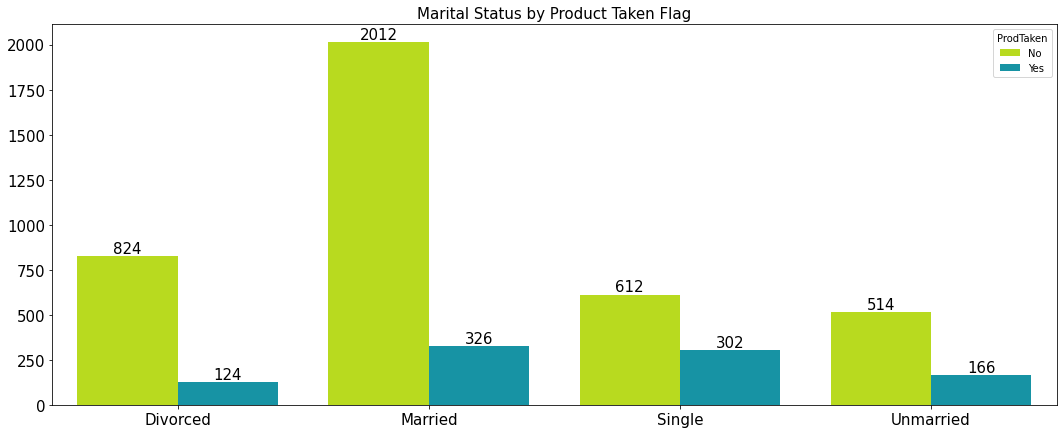

In [412]:
ms_pt = df.groupby(["MaritalStatus", "ProdTaken"])["ProdTaken"].agg(["count"]).reset_index()
ms_pt["ProdTaken"] = ms_pt["ProdTaken"].replace([0, 1], ["No", "Yes"])

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "MaritalStatus", y = "count", hue = "ProdTaken", data = ms_pt, palette = "nipy_spectral_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Marital Status by Product Taken Flag", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Number of Trips by  Product Taken Flag**

In [413]:
t_pt = df.groupby("ProdTaken")["NumberOfTrips"].agg(["min", "mean", "max"]).round(2).reset_index()
t_pt.columns = ["Product Taken", "Min Trips", "Avg Trips", "Max Trips"]
t_pt

Product Taken  Min Trips  Avg Trips  Max Trips
0              0        1.0       3.21        8.0
1              1        1.0       3.27        8.0

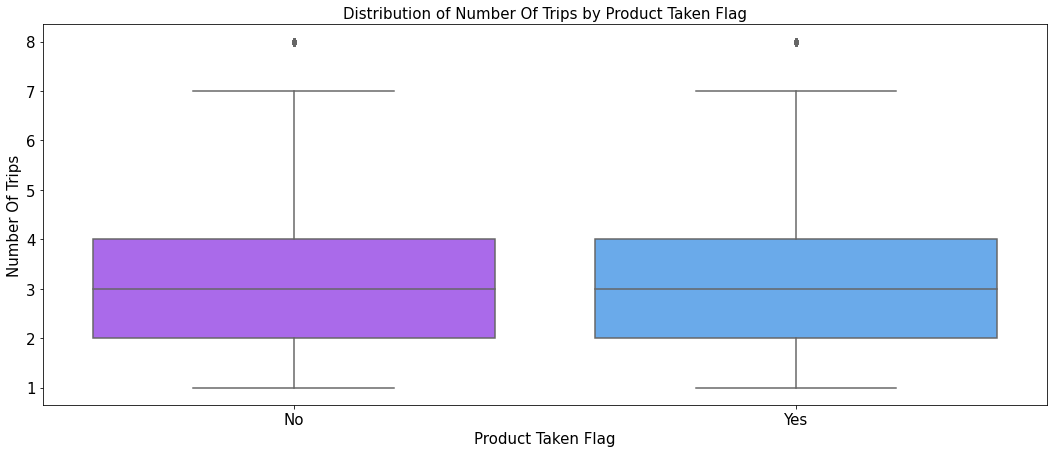

In [414]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "ProdTaken", y = "NumberOfTrips", data = df, palette = "cool_r")
plt.title("Distribution of Number Of Trips by Product Taken Flag", size = 15)
plt.xlabel("Product Taken Flag", size = 15)
plt.ylabel("Number Of Trips", size = 15)
plt.xticks([0, 1], ["No", "Yes"], size =15)
plt.yticks(size = 15)
plt.show()

**Pitch Satisfaction Score by Product Taken Flag**

In [415]:
ps_pt = df.groupby("ProdTaken")["PitchSatisfactionScore"].agg(["min", "mean", "max"]).round(2).reset_index()
ps_pt.columns = ["Product Taken", "Min Pitch Score", "Avg Pitch Score", "Max Pitch Score"]
ps_pt

Product Taken  Min Pitch Score  Avg Pitch Score  Max Pitch Score
0              0                1             3.05                5
1              1                1             3.22                5

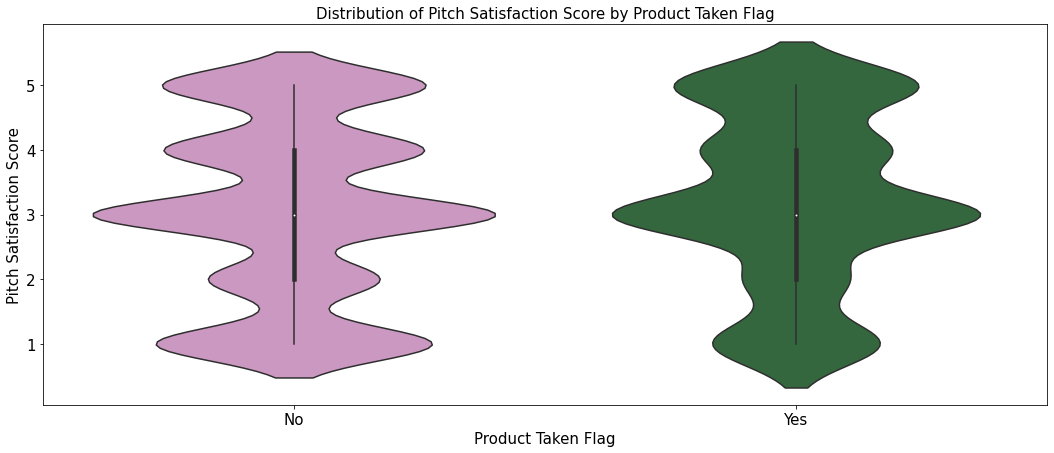

In [416]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "ProdTaken", y = "PitchSatisfactionScore", data = df, palette = "cubehelix_r")
plt.title("Distribution of Pitch Satisfaction Score by Product Taken Flag", size = 15)
plt.xlabel("Product Taken Flag", size = 15)
plt.ylabel("Pitch Satisfaction Score", size = 15)
plt.xticks([0, 1], ["No", "Yes"], size =15)
plt.yticks(size = 15)
plt.show()

**Number Of Children Visited by Product Taken Flag**

In [417]:
cv_pt = df.groupby("ProdTaken")["NumberOfChildrenVisited"].agg(["min", "mean", "max"]).round(2).reset_index()
cv_pt.columns = ["Product Taken", "Min Children Visited", "Avg Children Visited", "Max Children Visited"]
cv_pt

Product Taken  Min Children Visited  Avg Children Visited  \
0              0                   0.0                  1.20   
1              1                   0.0                  1.21   

   Max Children Visited  
0                   3.0  
1                   3.0

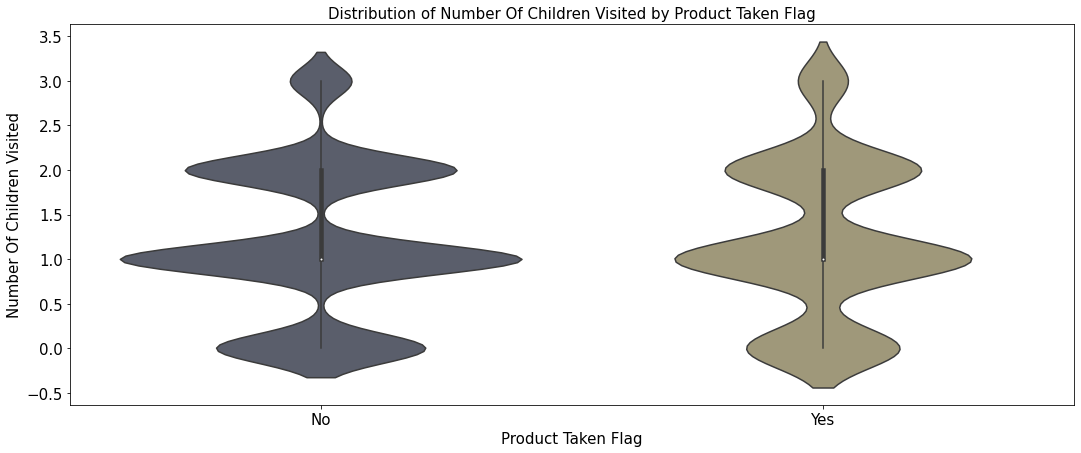

In [418]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "ProdTaken", y = "NumberOfChildrenVisited", data = df, palette = "cividis")
plt.title("Distribution of Number Of Children Visited by Product Taken Flag", size = 15)
plt.xlabel("Product Taken Flag", size = 15)
plt.ylabel("Number Of Children Visited", size = 15)
plt.xticks([0, 1], ["No", "Yes"], size =15)
plt.yticks(size = 15)
plt.show()

**Designation by Product Taken Flag**

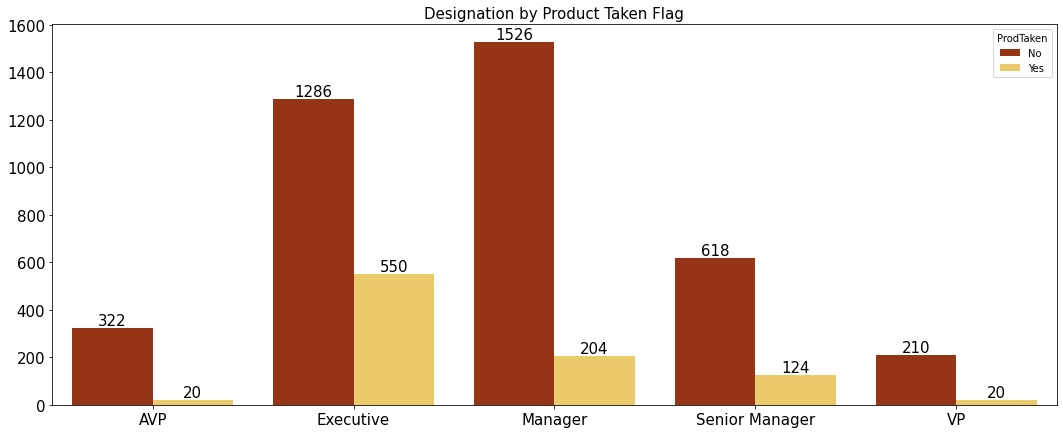

In [419]:
d_pt = df.groupby(["Designation", "ProdTaken"])["ProdTaken"].agg(["count"]).reset_index()
d_pt["ProdTaken"] = d_pt["ProdTaken"].replace([0, 1], ["No", "Yes"])

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Designation", y = "count", hue = "ProdTaken", data = d_pt, palette = "afmhot")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Designation by Product Taken Flag", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Monthly Income by Product Taken Flag**

In [420]:
mi_pt = df.groupby("ProdTaken")["MonthlyIncome"].agg(["min", "mean", "max"]).round(2).reset_index()
mi_pt.columns = ["Product Taken", "Min Monthly Income", "Avg Monthly Income", "Max Monthly Income"]
mi_pt

Product Taken  Min Monthly Income  Avg Monthly Income  Max Monthly Income
0              0              1000.0            23908.88             38677.0
1              1             16009.0            22229.91             38537.0

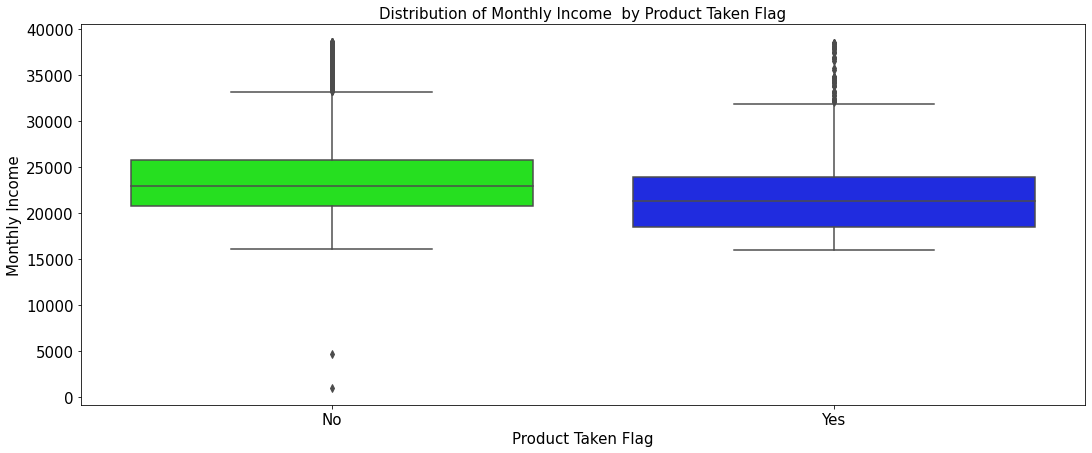

In [421]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "ProdTaken", y = "MonthlyIncome", data = df, palette = "hsv")
plt.title("Distribution of Monthly Income  by Product Taken Flag", size = 15)
plt.xlabel("Product Taken Flag", size = 15)
plt.ylabel("Monthly Income", size = 15)
plt.xticks([0, 1], ["No", "Yes"], size =15)
plt.yticks(size = 15)
plt.show()

**Customer Age by Type of Contact**

In [422]:
a_c = df.groupby("TypeofContact")["Age"].agg(["min", "mean", "max"]).round(2).reset_index()
a_c.columns = ["Type of Contact", "Min Age", "Avg Age", "Max Age"]
a_c

Type of Contact  Min Age  Avg Age  Max Age
0  Company Invited     18.0    37.30     61.0
1     Self Enquiry     18.0    37.75     61.0

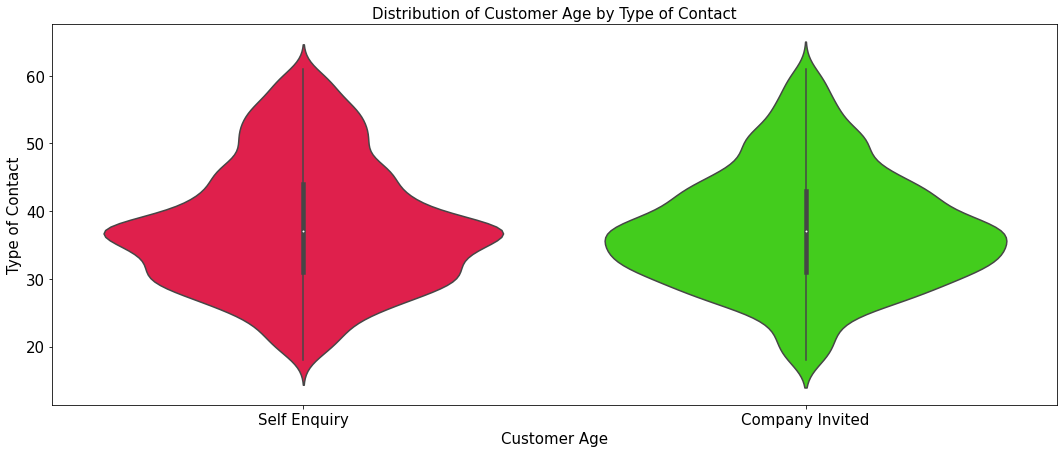

In [423]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "TypeofContact", y = "Age", data = df, palette = "prism_r")
plt.title("Distribution of Customer Age by Type of Contact", size = 15)
plt.xlabel("Customer Age", size = 15)
plt.ylabel("Type of Contact", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**City Tier by Type of Contact**

In [424]:
ct_c = df.groupby("TypeofContact")["CityTier"].agg(["min", "mean", "max"]).round(2).reset_index()
ct_c.columns = ["Type of Contact", "Min City Tier", "Avg City Tier", "Max City Tier"]
ct_c

Type of Contact  Min City Tier  Avg City Tier  Max City Tier
0  Company Invited              1           1.67              3
1     Self Enquiry              1           1.65              3

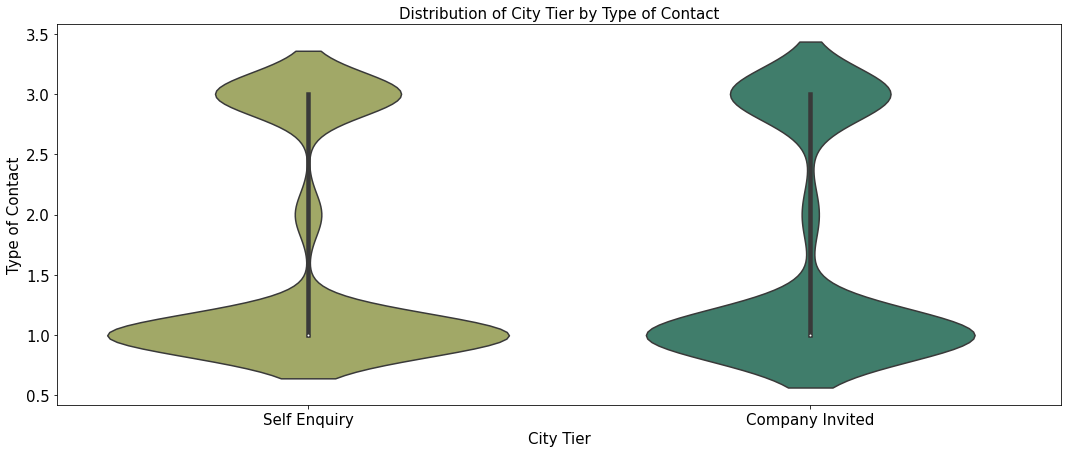

In [425]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "TypeofContact", y = "CityTier", data = df, palette = "gist_earth_r")
plt.title("Distribution of City Tier by Type of Contact", size = 15)
plt.xlabel("City Tier", size = 15)
plt.ylabel("Type of Contact", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Duration of Pitch by Type of Contact**

In [426]:
dp_c = df.groupby("TypeofContact")["DurationOfPitch"].agg(["min", "mean", "max"]).round(2).reset_index()
dp_c.columns = ["Type of Contact", "Min Pitch", "Avg Pitch", "Max Pitch"]
dp_c

Type of Contact  Min Pitch  Avg Pitch  Max Pitch
0  Company Invited        5.0      15.72       36.0
1     Self Enquiry        5.0      15.34       36.0

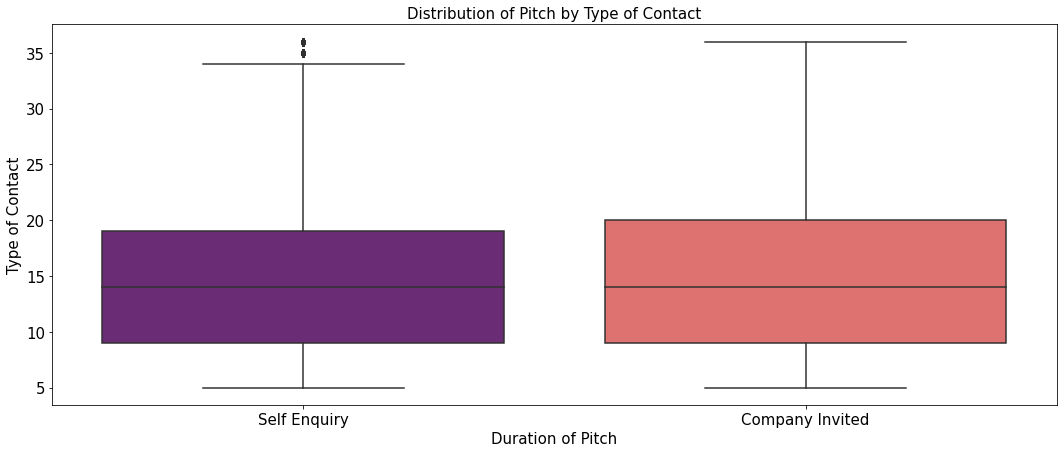

In [427]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "TypeofContact", y = "DurationOfPitch", data = df, palette = "magma")
plt.title("Distribution of Pitch by Type of Contact", size = 15)
plt.xlabel("Duration of Pitch", size = 15)
plt.ylabel("Type of Contact", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Type of Contact by Occupation**

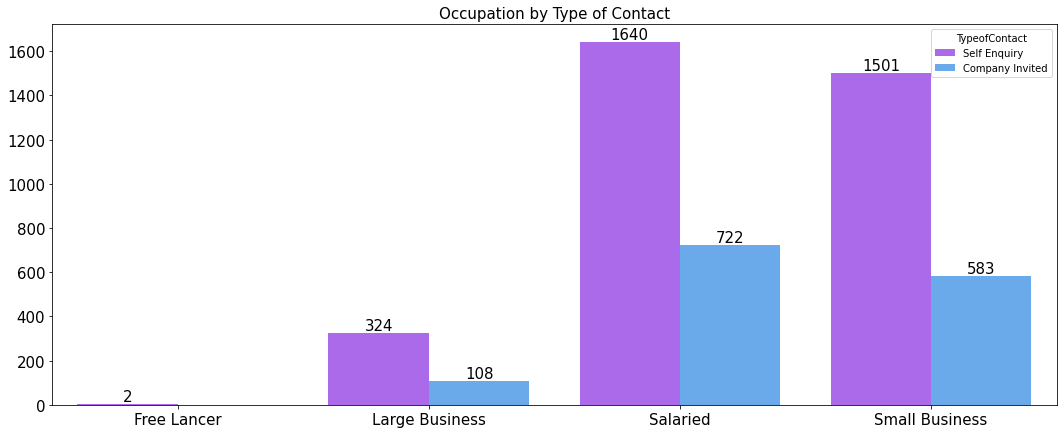

In [428]:
o_c = df.groupby(["Occupation", "TypeofContact"])["TypeofContact"].agg(["count"]).round(2).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Occupation", y = "count", hue = "TypeofContact", data = o_c, palette = "cool_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Occupation by Type of Contact", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Gender by Type of Contact**

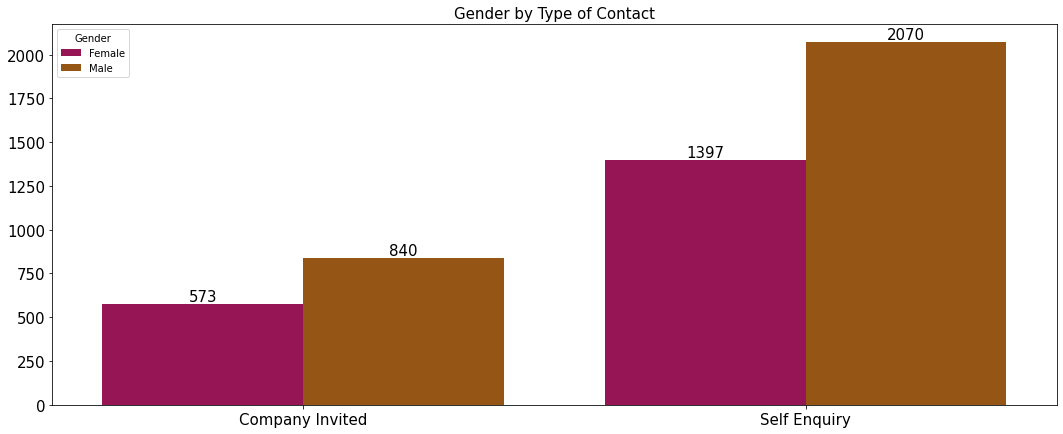

In [429]:
g_c = df.groupby(["TypeofContact", "Gender"])["Gender"].agg(["count"]).reset_index()
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "TypeofContact", y = "count", hue = "Gender", data = g_c, palette = "brg")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Gender by Type of Contact", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Number Of Person Visited by Type of Contact**

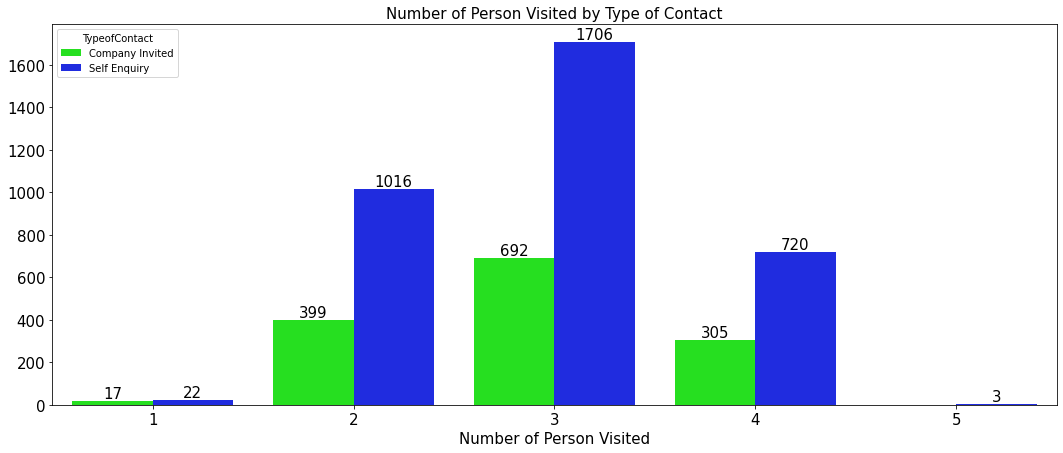

In [430]:
pv_tc = df.groupby(["NumberOfPersonVisited", "TypeofContact"])["TypeofContact"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "NumberOfPersonVisited", y = "count", hue = "TypeofContact", data = pv_tc, palette = "hsv")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Number of Person Visited by Type of Contact", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Number of Person Visited", size = 15)
plt.ylabel(None)
plt.show()

**Number of Followships by Type of Contact**

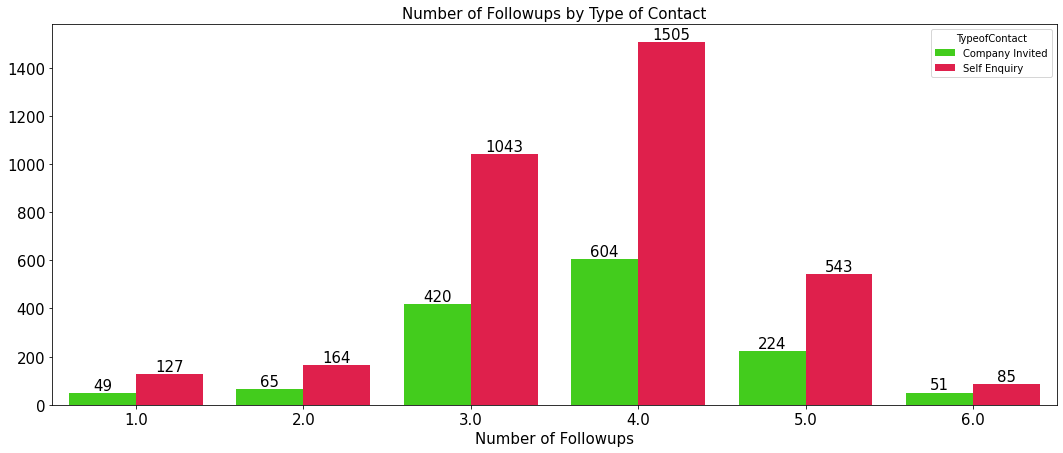

In [431]:
f_tc = df.groupby(["NumberOfFollowups", "TypeofContact"])["TypeofContact"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "NumberOfFollowups", y = "count", hue = "TypeofContact", data = f_tc, palette = "prism")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Number of Followups by Type of Contact", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Number of Followups", size = 15)
plt.ylabel(None)
plt.show()

**Type of Contact by Product Pitched**

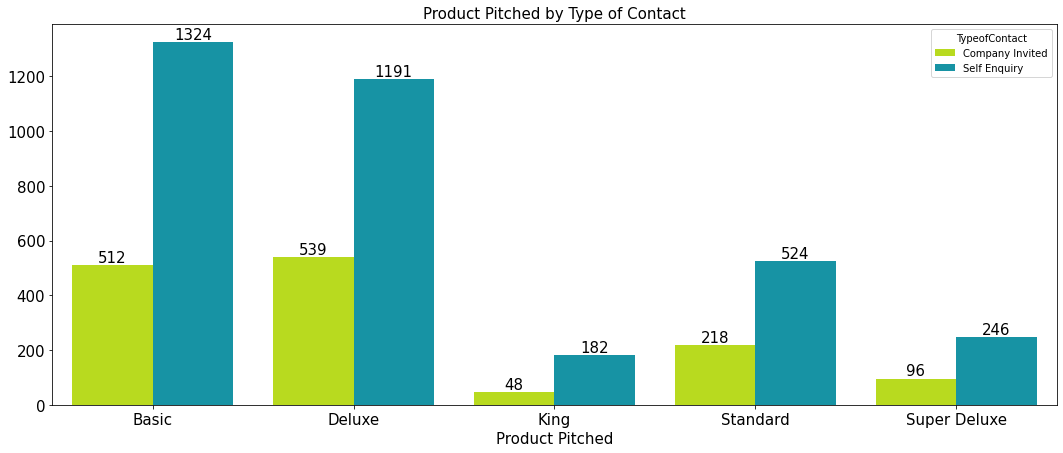

In [432]:
pp_tc = df.groupby(["ProductPitched", "TypeofContact"])["TypeofContact"].agg(["count"]).reset_index()
pp_tc
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "ProductPitched", y = "count", hue = "TypeofContact", data = pp_tc, palette = "nipy_spectral_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Product Pitched by Type of Contact", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Product Pitched", size = 15)
plt.ylabel(None)
plt.show()

**Type of Contact by Preferred Property Star**

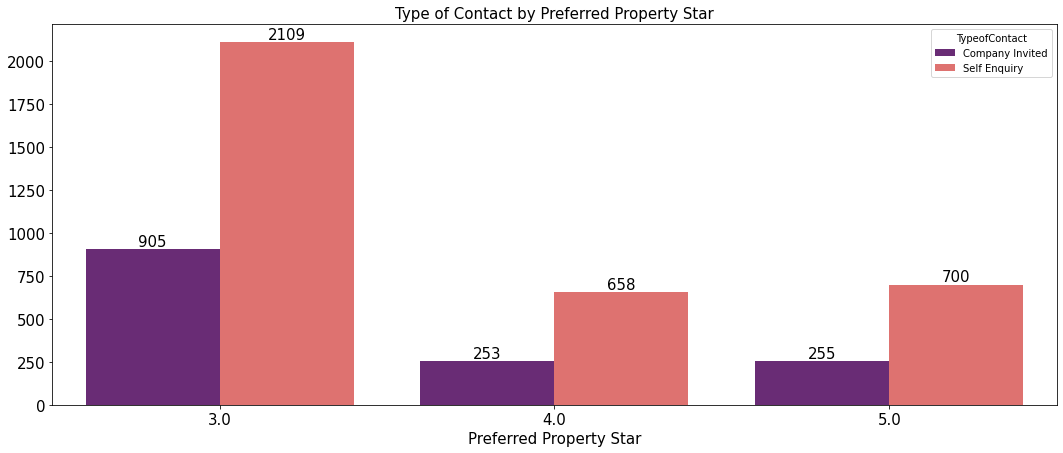

In [433]:
ps_tc = df.groupby(["PreferredPropertyStar", "TypeofContact"])["TypeofContact"].agg(["count"]).reset_index()
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "PreferredPropertyStar", y = "count", hue = "TypeofContact", data = ps_tc, palette = "magma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Type of Contact by Preferred Property Star", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Preferred Property Star", size = 15)
plt.ylabel(None)
plt.show()

**Marital Status by Type of Contact**

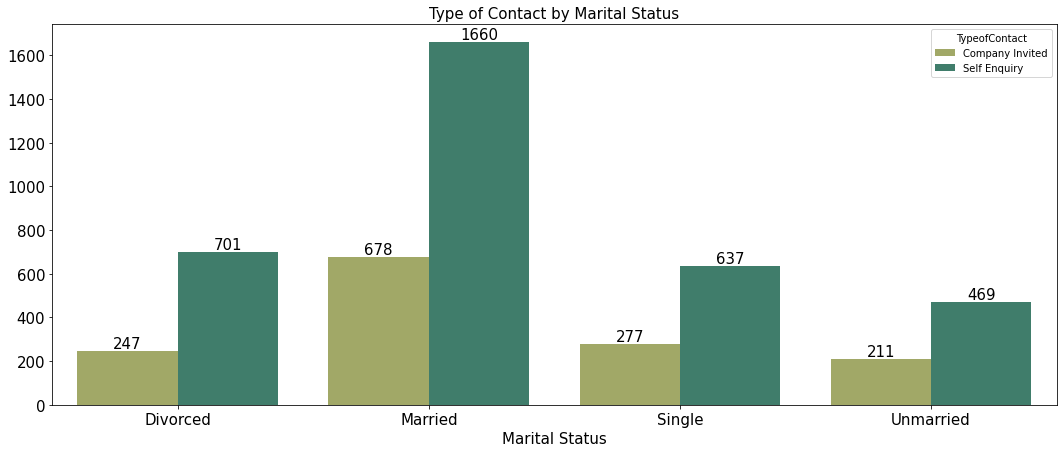

In [434]:
ms_tc = df.groupby(["MaritalStatus", "TypeofContact"])["TypeofContact"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "MaritalStatus", y = "count", hue = "TypeofContact", data = ms_tc, palette = "gist_earth_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Type of Contact by Marital Status", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Marital Status", size = 15)
plt.ylabel(None)
plt.show()

**Type of Contact by Number of Trips**

In [435]:
c_t = df.groupby(["TypeofContact"])["NumberOfTrips"].agg(["min", "mean", "max"]).round(2).reset_index()
c_t.columns = ["Type of Contact", "Min Trips", "Avg Trips", "Max Trips"]
c_t

Type of Contact  Min Trips  Avg Trips  Max Trips
0  Company Invited        1.0       3.16        8.0
1     Self Enquiry        1.0       3.25        8.0

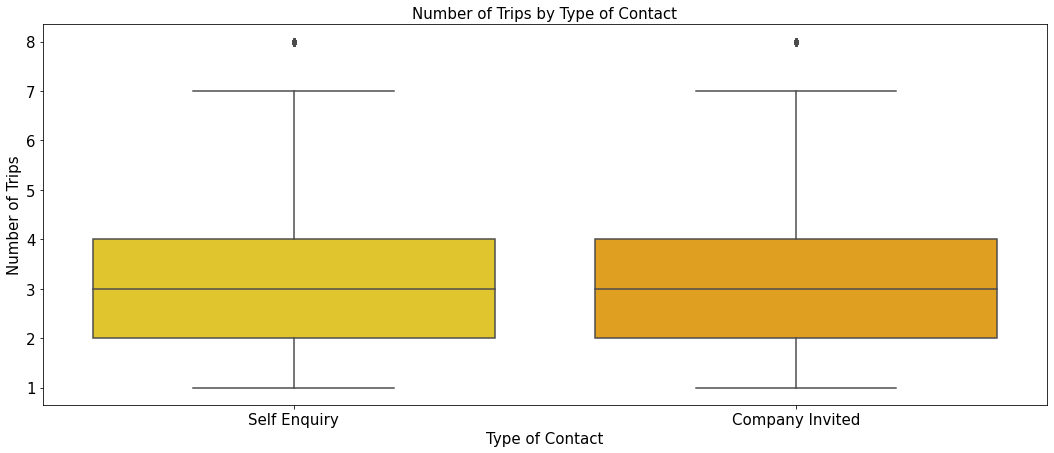

In [436]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "TypeofContact", y = "NumberOfTrips", data = df, palette = "Wistia")
plt.title("Number of Trips by Type of Contact", size = 15)
plt.xlabel("Type of Contact", size = 15)
plt.ylabel("Number of Trips", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Passport by Type of Contact**

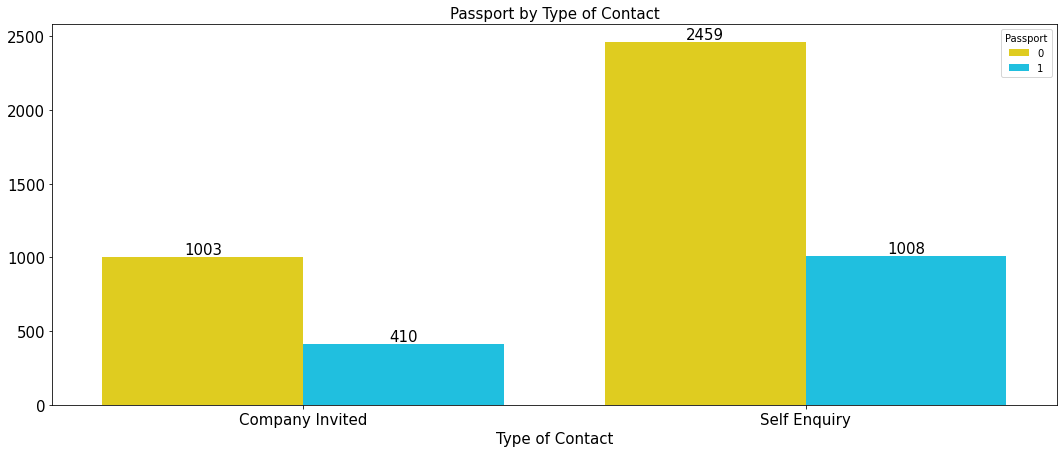

In [437]:
p_tc = df.groupby(["TypeofContact", "Passport"])["Passport"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "TypeofContact", y = "count", hue = "Passport", data = p_tc, palette = "jet_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Passport by Type of Contact", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Type of Contact", size = 15)
plt.ylabel(None)
plt.show()

**Type of Contact by Pitch Satisfaction Score**

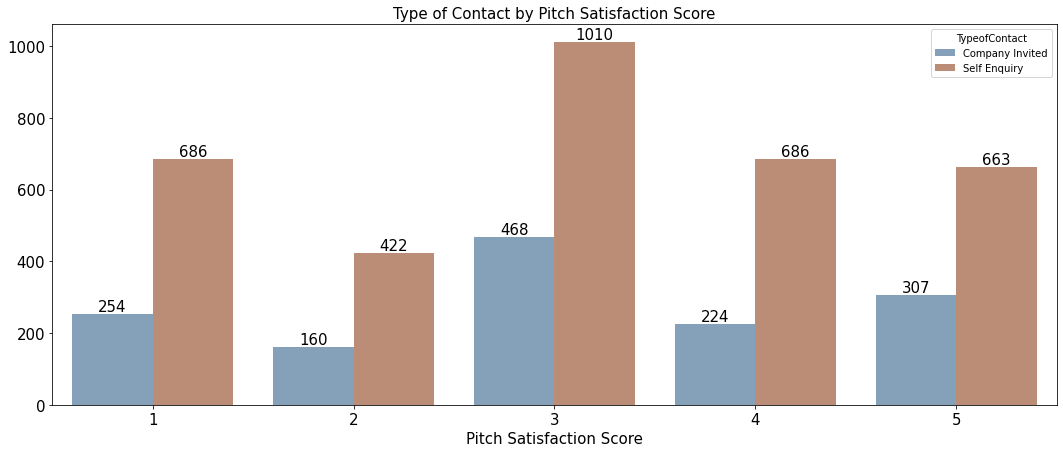

In [438]:
c_ps = df.groupby(["PitchSatisfactionScore", "TypeofContact"])["TypeofContact"].agg(["count"]).reset_index()
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "PitchSatisfactionScore", y = "count", hue = "TypeofContact", data = c_ps, palette = "twilight_shifted")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Type of Contact by Pitch Satisfaction Score", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Pitch Satisfaction Score", size = 15)
plt.ylabel(None)
plt.show()

**Customer Car by Type of Contact**

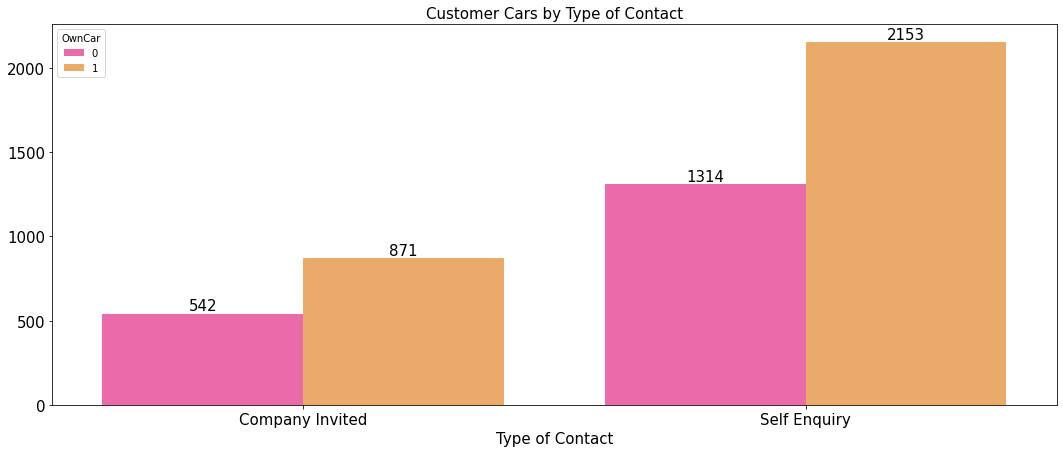

In [439]:
cc_tc = df.groupby(["TypeofContact", "OwnCar"])["OwnCar"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "TypeofContact", y = "count", hue = "OwnCar", data = cc_tc, palette = "spring")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Customer Cars by Type of Contact", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Type of Contact", size = 15)
plt.ylabel(None)
plt.show()

**Type of Contact by Childrens Visited**

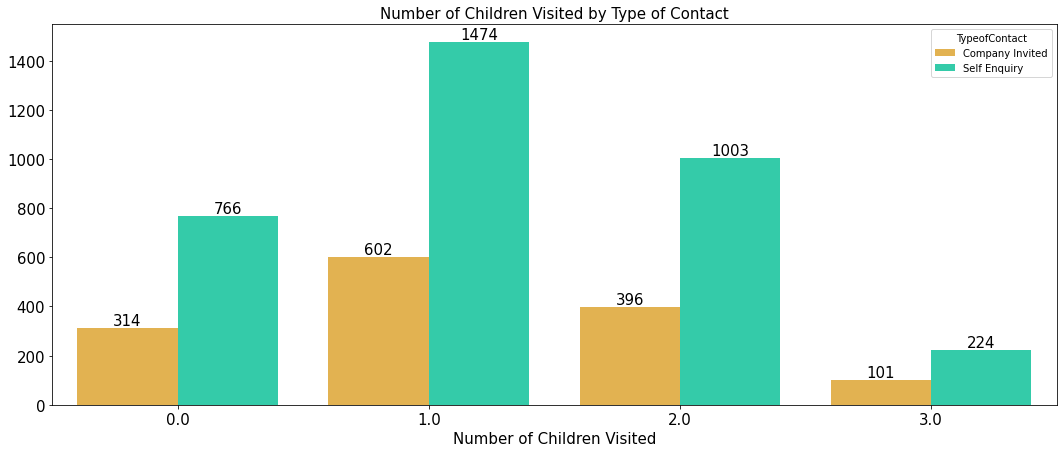

In [440]:
tc_c = df.groupby(["NumberOfChildrenVisited", "TypeofContact"])["TypeofContact"].agg(["count"]).reset_index()
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "NumberOfChildrenVisited", y = "count", hue = "TypeofContact", data = tc_c, palette = "turbo_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Number of Children Visited by Type of Contact", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Number of Children Visited", size = 15)
plt.ylabel(None)
plt.show()

**Type of Contact by Designation**

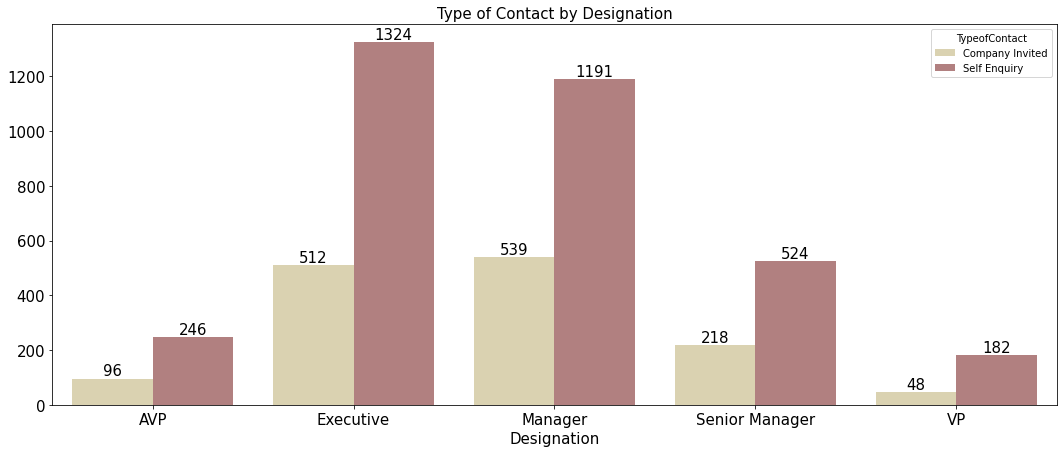

In [441]:
tc_d = df.groupby(["Designation", "TypeofContact"])["TypeofContact"].agg(["count"]).reset_index()
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Designation", y = "count", hue = "TypeofContact", data = tc_d, palette = "pink_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Type of Contact by Designation", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Designation", size = 15)
plt.ylabel(None)
plt.show()

**Monthly Income by Type of Contact**

In [442]:
mi_tc = df.groupby(["TypeofContact"])["MonthlyIncome"].agg(["min", "mean", "max"]).round(2).reset_index()
mi_tc.columns = ["Type of Contact", "Min Income", "Avg Income", "Max Income"]
mi_tc

Type of Contact  Min Income  Avg Income  Max Income
0  Company Invited     16051.0    23411.72     38651.0
1     Self Enquiry      1000.0    23666.94     38677.0

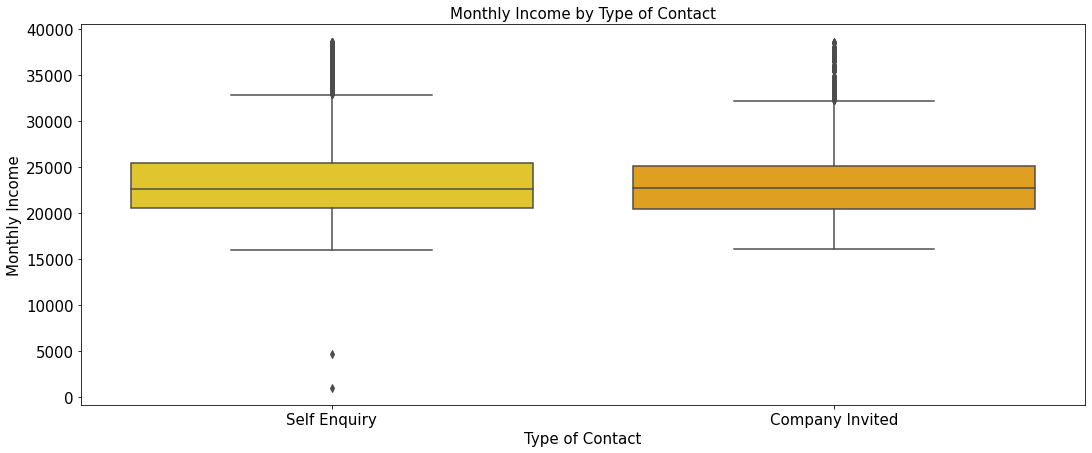

In [443]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "TypeofContact", y = "MonthlyIncome", data = df, palette = "Wistia")
plt.title("Monthly Income by Type of Contact", size = 15)
plt.xlabel("Type of Contact", size = 15)
plt.ylabel("Monthly Income", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Customer Age by Occupation**

In [444]:
ca_o = df.groupby(["Occupation"])["Age"].agg(["min", "mean", "max"]).round(2).reset_index()
ca_o.columns = ["Occupation", "Min Age", "Avg Age", "Max Age"]
ca_o

Occupation  Min Age  Avg Age  Max Age
0     Free Lancer     37.0    37.50     38.0
1  Large Business     19.0    36.71     60.0
2        Salaried     18.0    37.64     61.0
3  Small Business     18.0    37.79     61.0

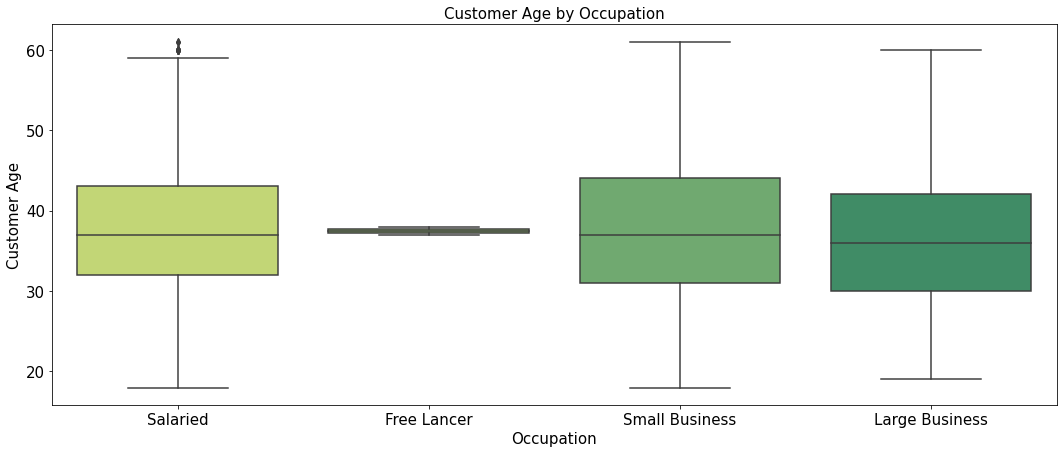

In [445]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "Occupation", y = "Age", data = df, palette = "summer_r")
plt.title("Customer Age by Occupation", size = 15)
plt.xlabel("Occupation", size = 15)
plt.ylabel("Customer Age", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**City Tier by Occupation**

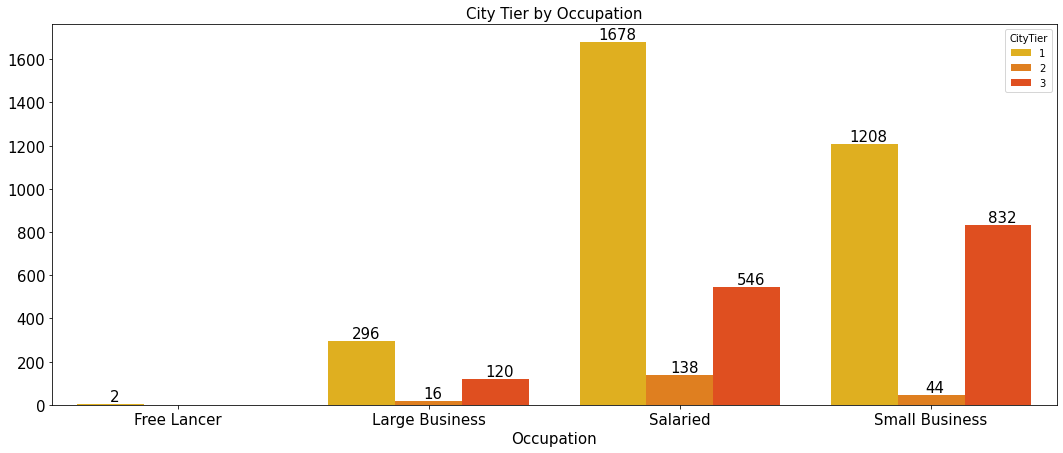

In [446]:
ct_o = df.groupby(["Occupation", "CityTier"])["CityTier"].agg(["count"]).reset_index()
ct_o
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Occupation", y = "count", hue = "CityTier", data = ct_o, palette = "autumn_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.15, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("City Tier by Occupation", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Occupation", size = 15)
plt.ylabel(None)
plt.show()

**Duration of Pitch by Occupation**

In [447]:
dp_o = df.groupby(["Occupation"])["DurationOfPitch"].agg(["min", "mean", "max"]).round(2).reset_index()
dp_o.columns = ["Occupation", "Min Duration", "Avg Duration", "Max Duration"]
dp_o

Occupation  Min Duration  Avg Duration  Max Duration
0     Free Lancer           8.0          8.50           9.0
1  Large Business           6.0         14.77          36.0
2        Salaried           5.0         15.12          36.0
3  Small Business           5.0         15.97          36.0

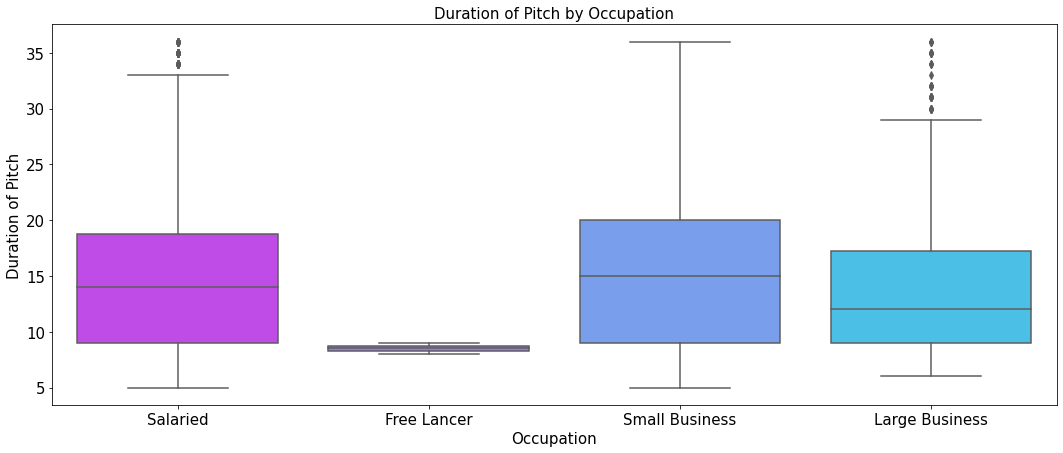

In [448]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "Occupation", y = "DurationOfPitch", data = df, palette = "cool_r")
plt.title("Duration of Pitch by Occupation", size = 15)
plt.xlabel("Occupation", size = 15)
plt.ylabel("Duration of Pitch", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Gender by Occupation**

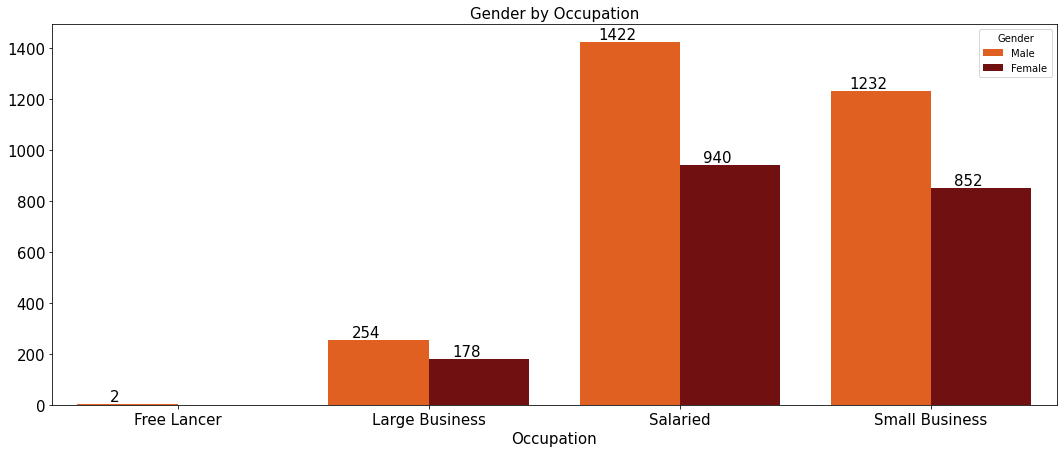

In [449]:
g_o = df.groupby(["Occupation", "Gender"])["Gender"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Occupation", y = "count", hue = "Gender", data = g_o, palette = "gist_heat_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.15, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Gender by Occupation", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Occupation", size = 15)
plt.ylabel(None)
plt.show()

**Number Of Person Visited by Occupation**

In [450]:
pv_o = df.groupby(["Occupation"])["NumberOfPersonVisited"].agg(["min", "mean", "max"]).round(2).reset_index()
pv_o.columns = ["Occupation", "Min Person Visited", "Avg Person Visited", "Max Person Visited"]
pv_o

Occupation  Min Person Visited  Avg Person Visited  Max Person Visited
0     Free Lancer                   3                3.50                   4
1  Large Business                   1                2.88                   4
2        Salaried                   1                2.91                   5
3  Small Business                   1                2.90                   5

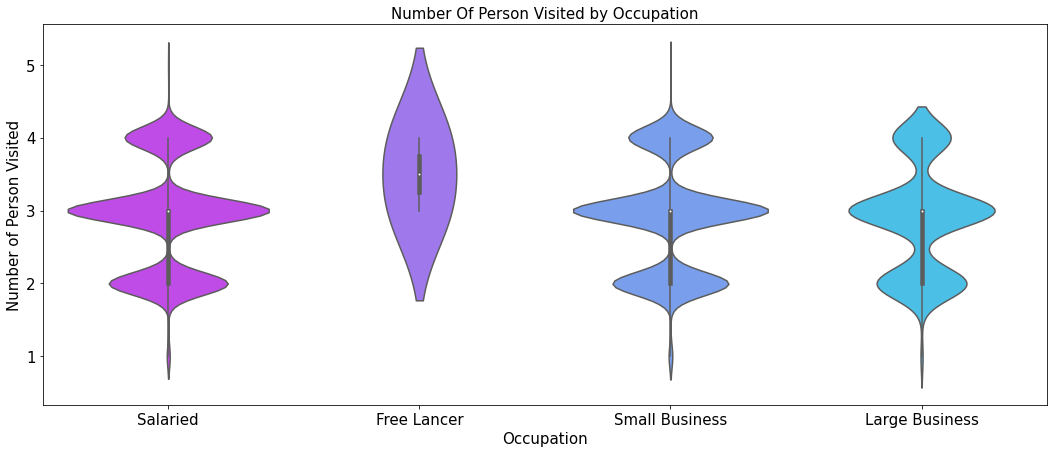

In [451]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "Occupation", y = "NumberOfPersonVisited", data = df, palette = "cool_r")
plt.title("Number Of Person Visited by Occupation", size = 15)
plt.xlabel("Occupation", size = 15)
plt.ylabel("Number of Person Visited", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Occupation by Number Of Followups**

In [452]:
o_f = df.groupby("Occupation")["NumberOfFollowups"].agg(["min", "mean", "max"]).round(2).reset_index()
o_f.columns = ["Occupation", "Min Followups", "Avg Followups", "Max Followups"]
o_f

Occupation  Min Followups  Avg Followups  Max Followups
0     Free Lancer            4.0           4.50            5.0
1  Large Business            1.0           3.76            6.0
2        Salaried            1.0           3.71            6.0
3  Small Business            1.0           3.70            6.0

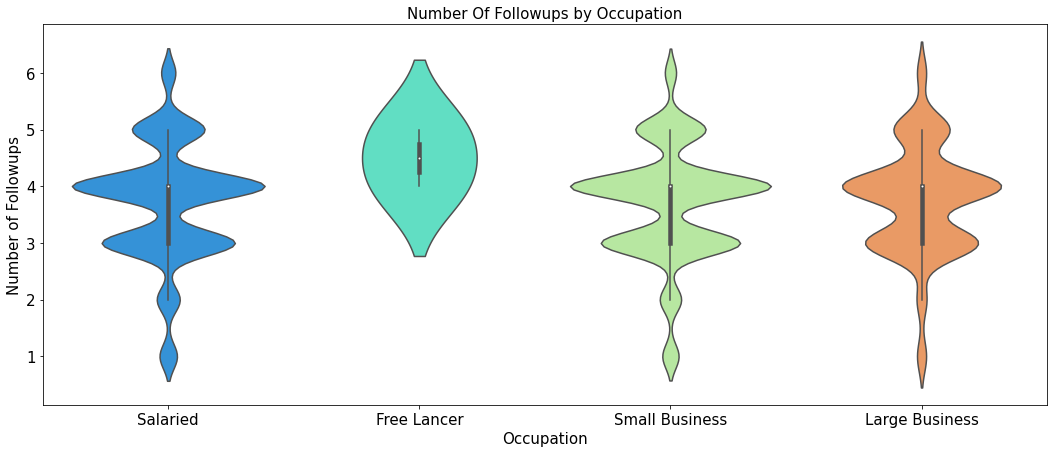

In [453]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "Occupation", y = "NumberOfFollowups", data = df, palette = "rainbow")
plt.title("Number Of Followups by Occupation", size = 15)
plt.xlabel("Occupation", size = 15)
plt.ylabel("Number of Followups", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Occupation by Product Pitched**

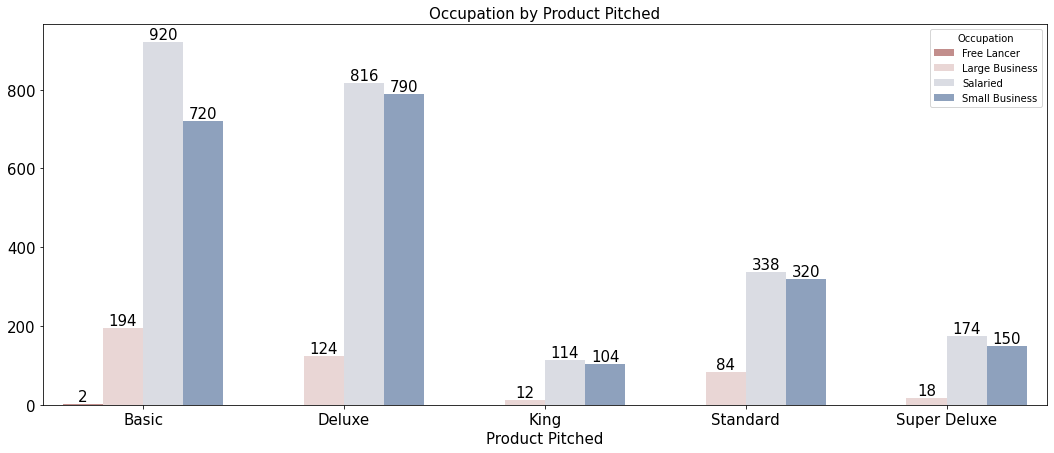

In [454]:
pp_o = df.groupby(["ProductPitched", "Occupation"])["Occupation"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "ProductPitched", y = "count", hue = "Occupation", data = pp_o, palette = "vlag_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.1, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Occupation by Product Pitched", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Product Pitched", size = 15)
plt.ylabel(None)
plt.show()

**Preferred Property Star by Occupation**

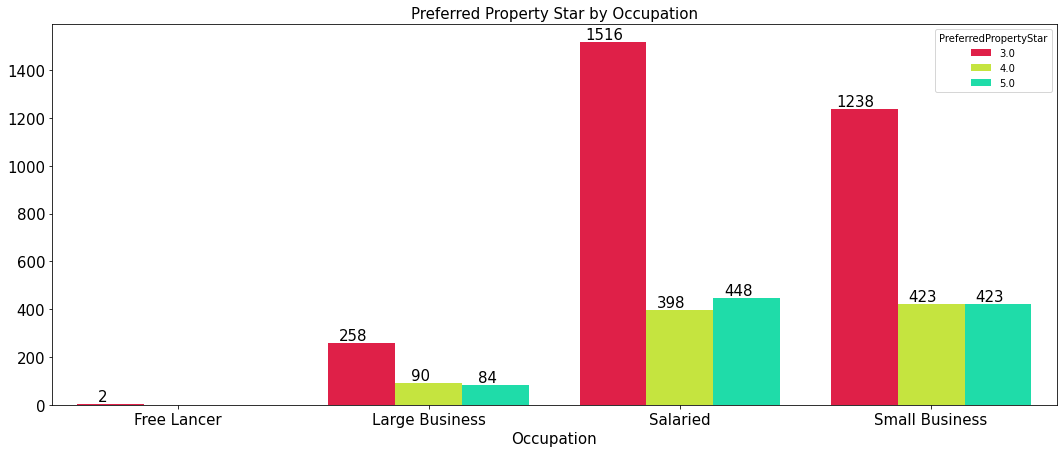

In [455]:
ps_o = df.groupby(["Occupation", "PreferredPropertyStar"])["PreferredPropertyStar"].agg(["count"]).reset_index()
ps_o
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Occupation", y = "count", hue = "PreferredPropertyStar", data = ps_o, palette = "gist_ncar_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.1, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Preferred Property Star by Occupation", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Occupation", size = 15)
plt.ylabel(None)
plt.show()

**Marital Status by Occupation**

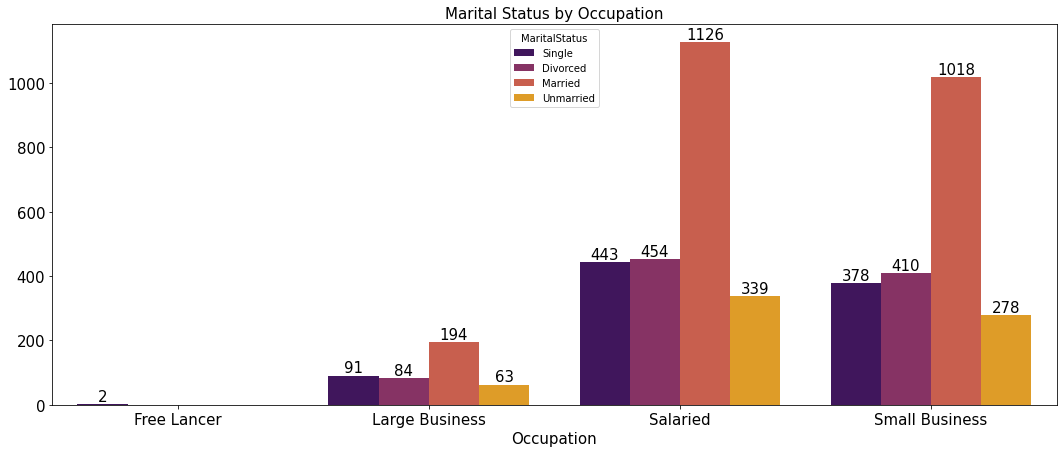

In [456]:
ms_o = df.groupby(["Occupation","MaritalStatus"])["MaritalStatus"].agg(["count"]).reset_index()

ms_o
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Occupation", y = "count", hue = "MaritalStatus", data = ms_o, palette = "inferno")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.1, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Marital Status by Occupation", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Occupation", size = 15)
plt.ylabel(None)
plt.show()

**Number of Trips by Occupation**

In [457]:
t_o = df.groupby("Occupation")["NumberOfTrips"].agg(["min", "mean", "max"]).round(2).reset_index()
t_o.columns = ["Occupation", "Min Trips", "Avg Trips", "Max Trips"]
t_o

Occupation  Min Trips  Avg Trips  Max Trips
0     Free Lancer        7.0       7.50        8.0
1  Large Business        1.0       3.38        8.0
2        Salaried        1.0       3.21        8.0
3  Small Business        1.0       3.20        8.0

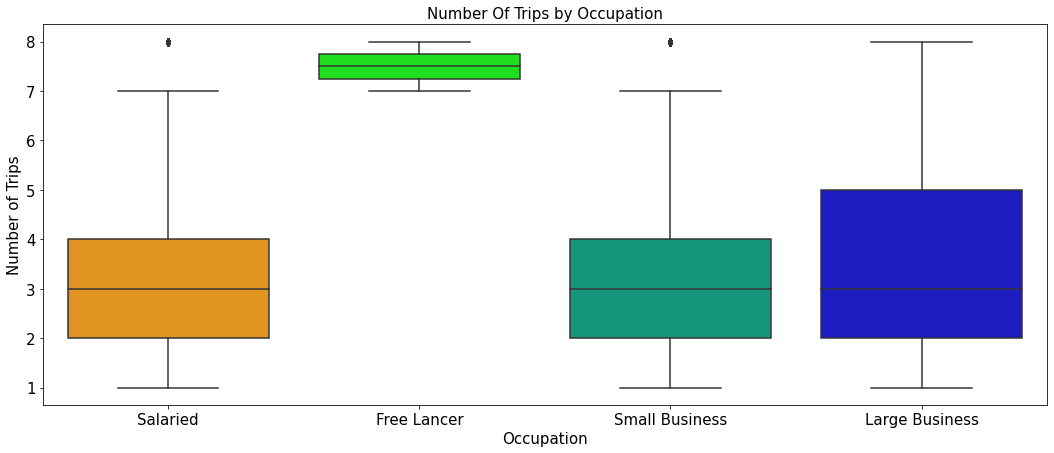

In [458]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "Occupation", y = "NumberOfTrips", data = df, palette = "nipy_spectral_r")
plt.title("Number Of Trips by Occupation", size = 15)
plt.xlabel("Occupation", size = 15)
plt.ylabel("Number of Trips", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Passport by Occupation**

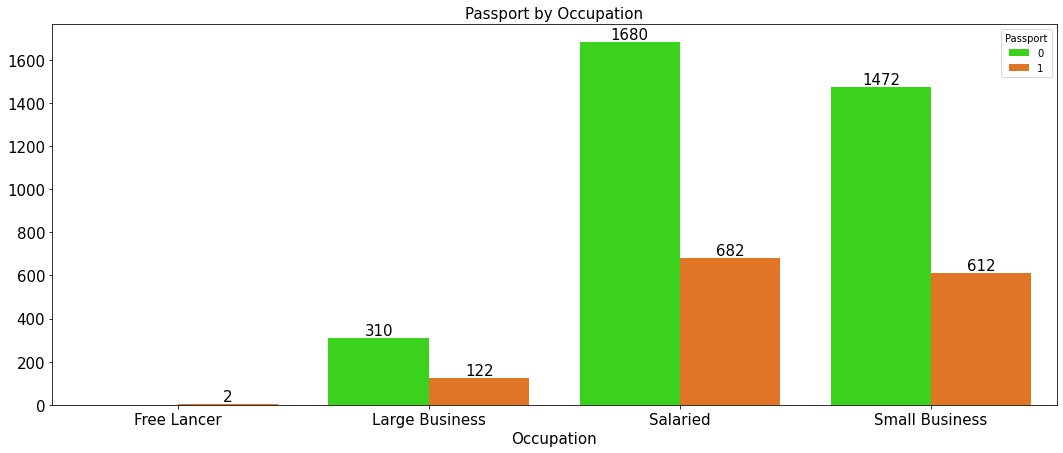

In [459]:
p_o = df.groupby(["Occupation","Passport"])["Passport"].agg(["count"]).reset_index()

p_o
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Occupation", y = "count", hue = "Passport", data = p_o, palette = "gist_ncar")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Passport by Occupation", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Occupation", size = 15)
plt.ylabel(None)
plt.show()

**Pitch Satisfaction Score by Occupation**

In [460]:
ps_o = df.groupby(["Occupation"])["PitchSatisfactionScore"].agg(["min", "mean", "max"]).round(2).reset_index()
ps_o.columns = ["Occupation", "Min Score", "Avg Score", "Max Score"]
ps_o

Occupation  Min Score  Avg Score  Max Score
0     Free Lancer          3       3.00          3
1  Large Business          1       3.25          5
2        Salaried          1       3.12          5
3  Small Business          1       3.00          5

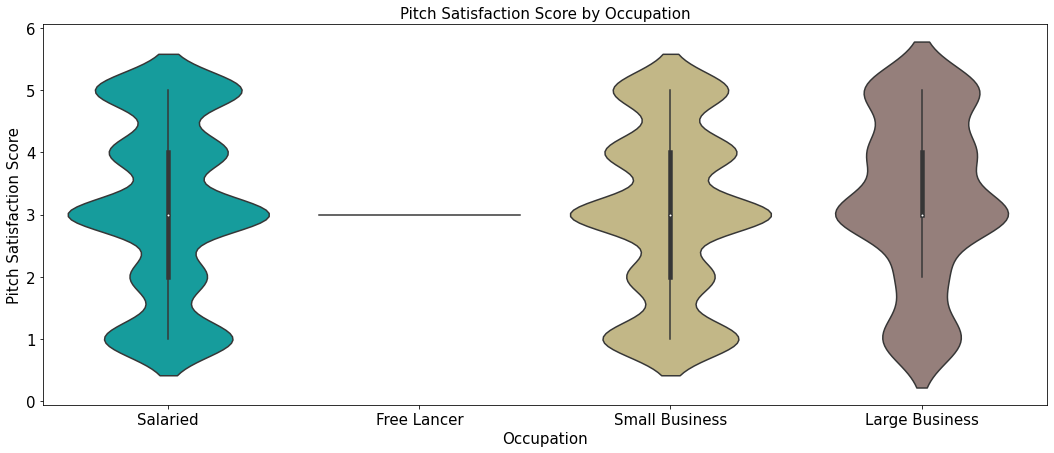

In [461]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "Occupation", y = "PitchSatisfactionScore", data = df, palette = "terrain")
plt.title("Pitch Satisfaction Score by Occupation", size = 15)
plt.xlabel("Occupation", size = 15)
plt.ylabel("Pitch Satisfaction Score", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Customer Cars by Occupation**

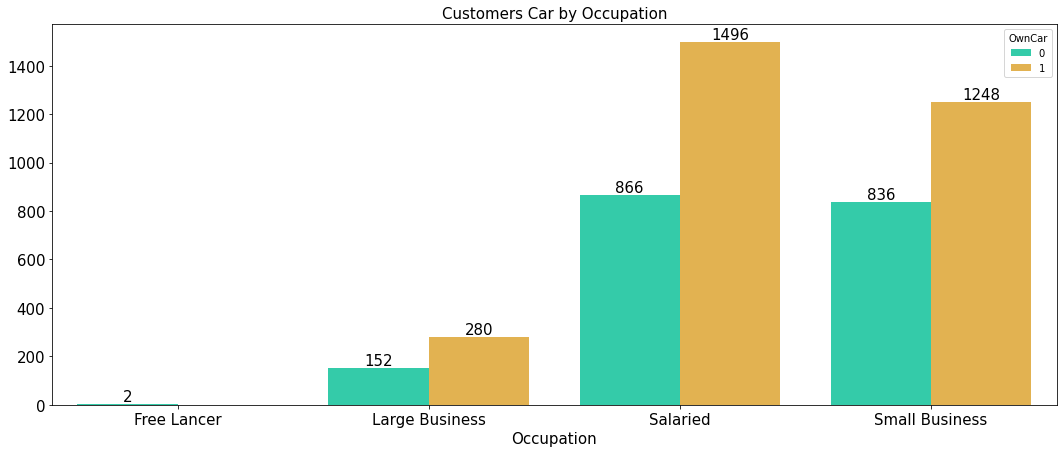

In [462]:
cc_o = df.groupby(["Occupation","OwnCar"])["OwnCar"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Occupation", y = "count", hue = "OwnCar", data = cc_o, palette = "turbo")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Customers Car by Occupation", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Occupation", size = 15)
plt.ylabel(None)
plt.show()

**Number of Children Visited by Occupation**

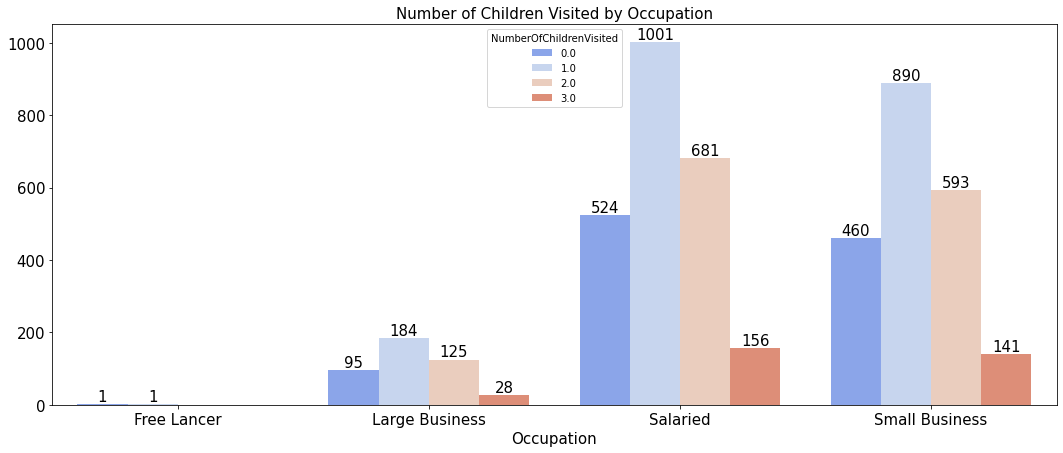

In [463]:
cv_o = df.groupby(["Occupation","NumberOfChildrenVisited"])["NumberOfChildrenVisited"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Occupation", y = "count", hue = "NumberOfChildrenVisited", data = cv_o, palette = "coolwarm")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.1, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Number of Children Visited by Occupation", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Occupation", size = 15)
plt.ylabel(None)
plt.show()

**Designation by Occupation**

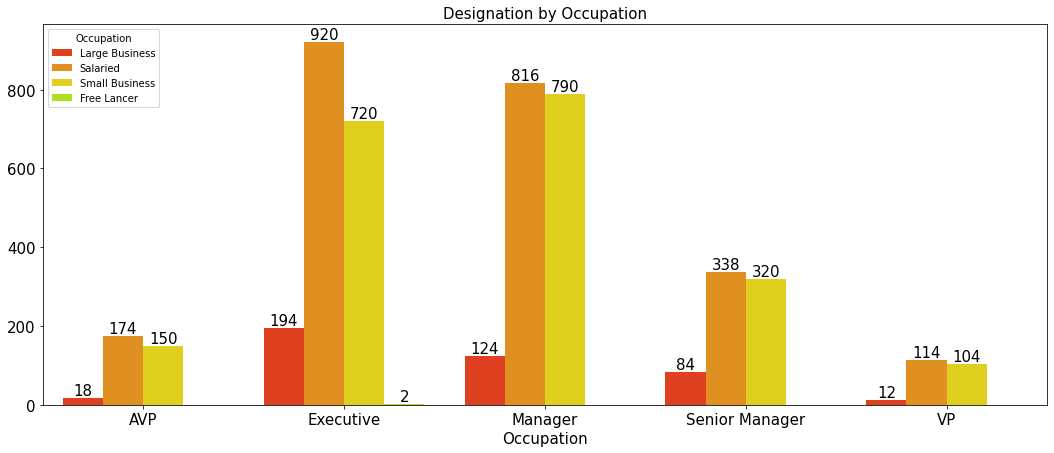

In [464]:
d_o = df.groupby(["Designation", "Occupation"])["Occupation"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Designation", y = "count", hue = "Occupation", data = d_o, palette = "prism")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.1, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Designation by Occupation", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Occupation", size = 15)
plt.ylabel(None)
plt.show()

**Monthly Income by Occupation**

In [465]:
mi_o = df.groupby(["Occupation"])["MonthlyIncome"].agg(["min", "mean", "max"]).round(2).reset_index()
mi_o.columns = ["Occupation", "Min Income", "Avg Income", "Max Income"]
mi_o

Occupation  Min Income  Avg Income  Max Income
0     Free Lancer     17090.0    18929.00     20768.0
1  Large Business      1000.0    22918.42     38621.0
2        Salaried     16051.0    23589.25     38677.0
3  Small Business     16009.0    23741.66     38537.0

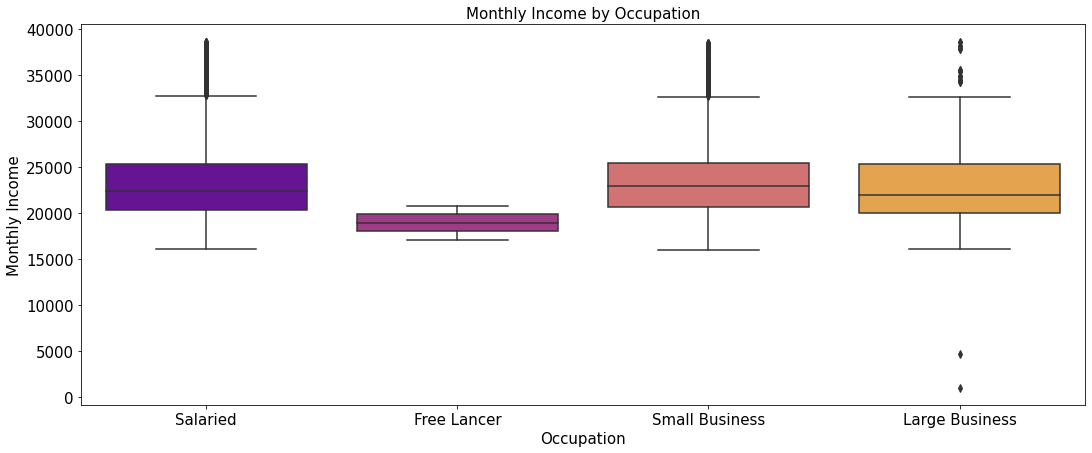

In [466]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "Occupation", y = "MonthlyIncome", data = df, palette = "plasma")
plt.title("Monthly Income by Occupation", size = 15)
plt.xlabel("Occupation", size = 15)
plt.ylabel("Monthly Income", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Age by Gender**

In [467]:
a_g = df.groupby("Gender")["Age"].agg(["min", "mean", "max"]).round(2).reset_index()
a_g.columns = ["Gender", "Min Age", "Avg Age", "Max Age"]
a_g

Gender  Min Age  Avg Age  Max Age
0  Female     18.0    38.05     61.0
1    Male     18.0    37.33     61.0

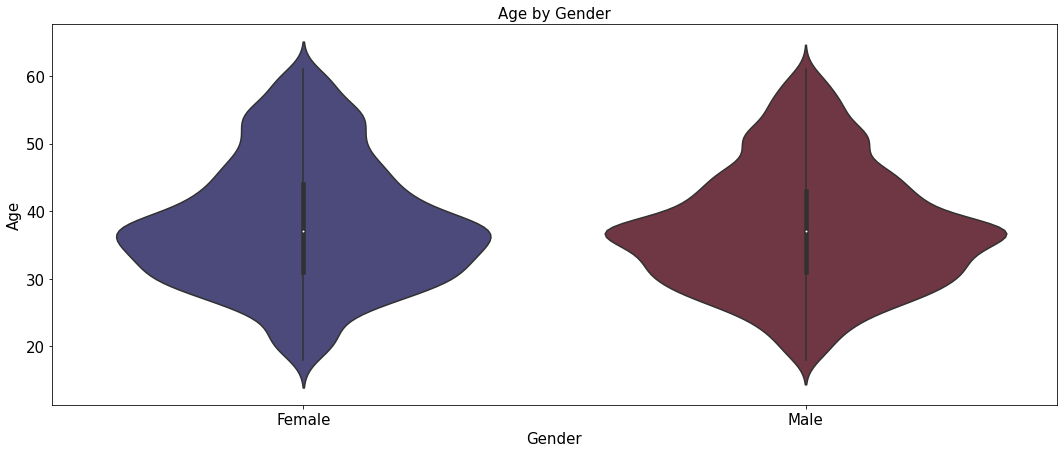

In [468]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "Gender", y = "Age", data = df, palette = "icefire")
plt.title("Age by Gender", size = 15)
plt.xlabel("Gender", size = 15)
plt.ylabel("Age", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**City Tier by Gender**

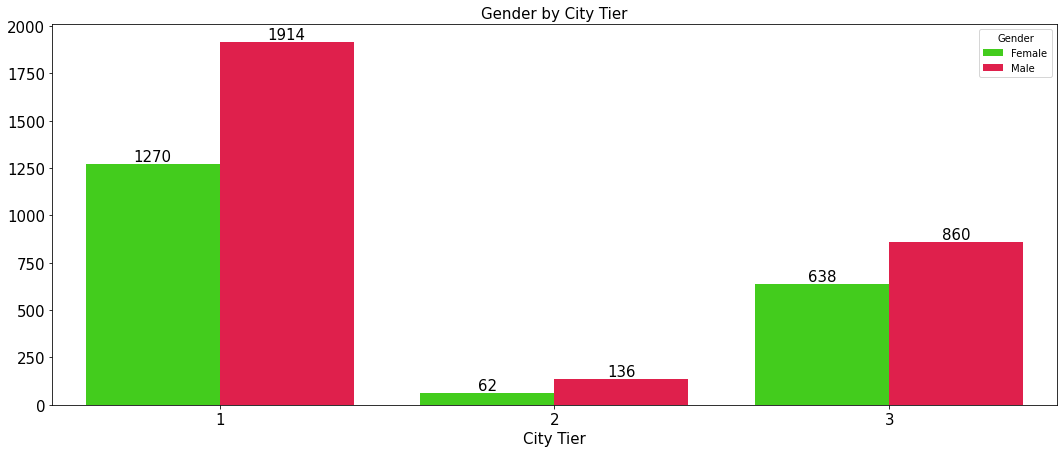

In [469]:
ct_g = df.groupby(["Gender", "CityTier"])["CityTier"].agg(["count"]).reset_index()
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "CityTier", y = "count", hue = "Gender", data = ct_g, palette = "prism")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Gender by City Tier", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("City Tier", size = 15)
plt.ylabel(None)
plt.show()

**Duration of Pitch by Gender**

In [470]:
p_g = df.groupby("Gender")["DurationOfPitch"].agg(["min", "mean", "max"]).round(2).reset_index()
p_g.columns = ["Gender", "Min Duration", "Avg Duration", "Max Duration"]
p_g

Gender  Min Duration  Avg Duration  Max Duration
0  Female           5.0         15.40          36.0
1    Male           5.0         15.48          36.0

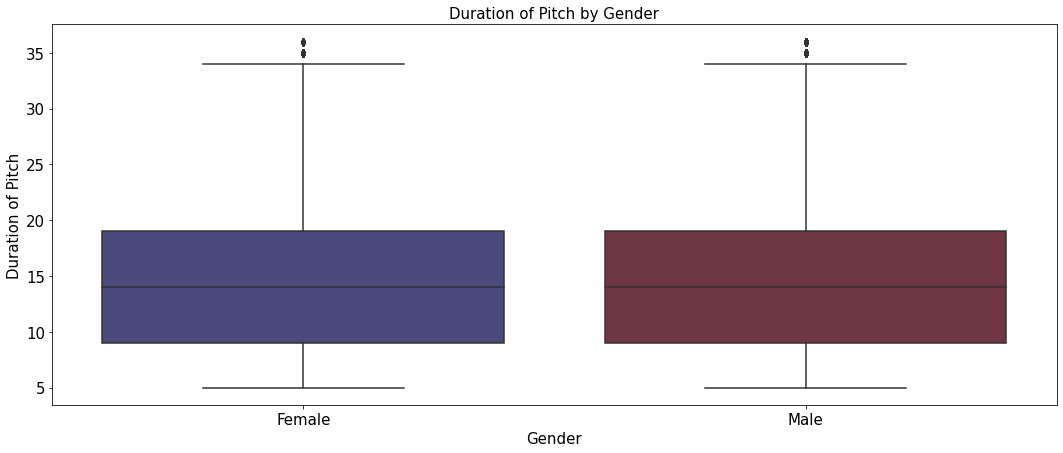

In [471]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "Gender", y = "DurationOfPitch", data = df, palette = "icefire")
plt.title("Duration of Pitch by Gender", size = 15)
plt.xlabel("Gender", size = 15)
plt.ylabel("Duration of Pitch", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Gender by Number of Person Visited**

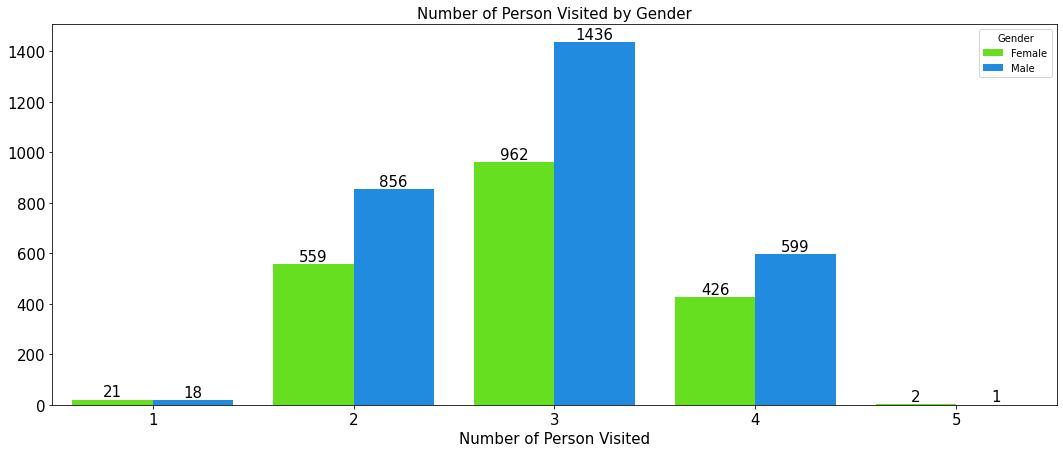

In [472]:
pv_g = df.groupby(["NumberOfPersonVisited", "Gender"])["Gender"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "NumberOfPersonVisited", y = "count", hue = "Gender", data = pv_g, palette = "gist_rainbow")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Number of Person Visited by Gender", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Number of Person Visited", size = 15)
plt.ylabel(None)
plt.show()

**Gender by Number of Followups**

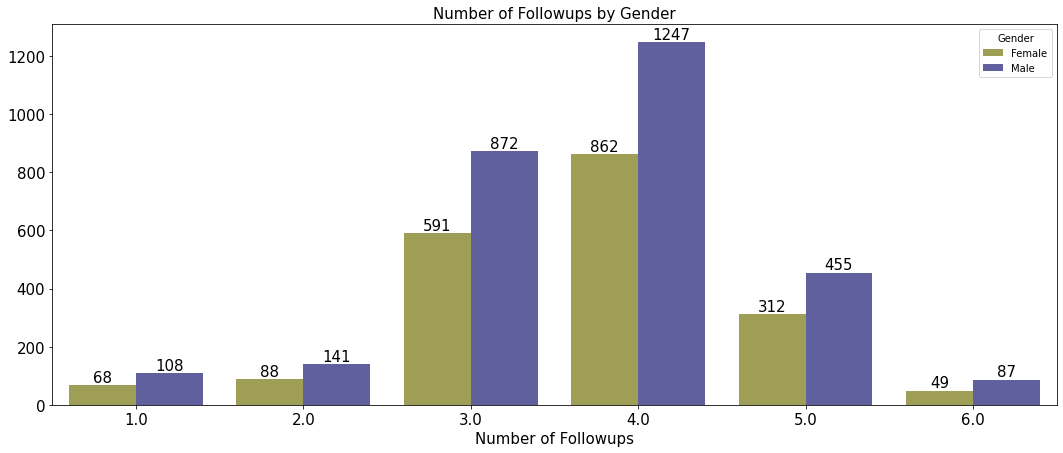

In [473]:
pv_g = df.groupby(["NumberOfFollowups", "Gender"])["Gender"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "NumberOfFollowups", y = "count", hue = "Gender", data = pv_g, palette = "gist_stern_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Number of Followups by Gender", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Number of Followups", size = 15)
plt.ylabel(None)
plt.show()

**Gender by Product Pitched**

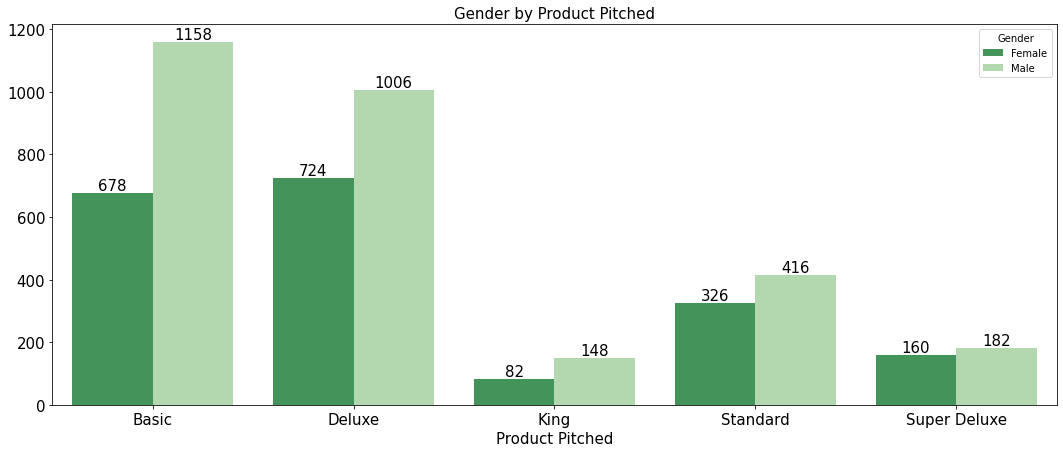

In [474]:
g_pp = df.groupby(["ProductPitched", "Gender"])["Gender"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "ProductPitched", y = "count", hue = "Gender", data = g_pp, palette = "Greens_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Gender by Product Pitched", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Product Pitched", size = 15)
plt.ylabel(None)
plt.show()

**Gender by Preferred Property Star**

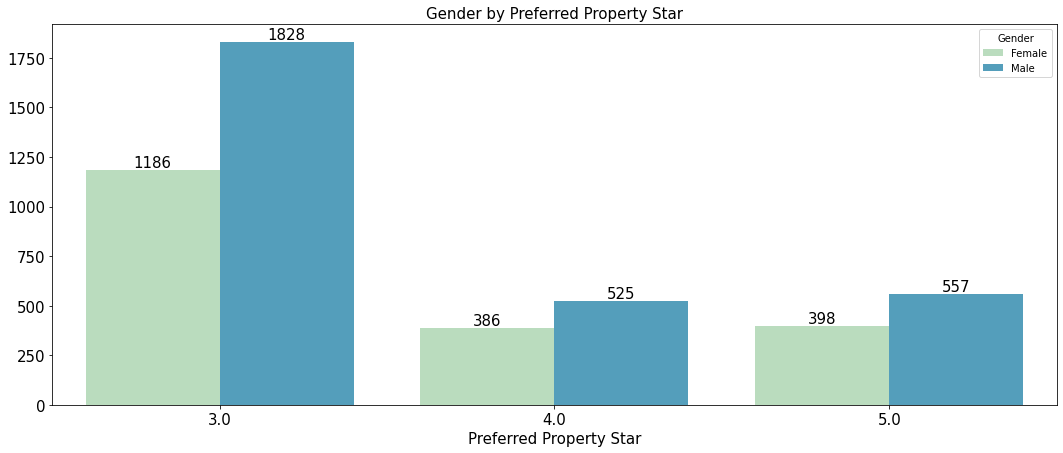

In [475]:
g_ps = df.groupby(["PreferredPropertyStar", "Gender"])["Gender"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "PreferredPropertyStar", y = "count", hue = "Gender", data = g_ps, palette = "GnBu")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Gender by Preferred Property Star", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Preferred Property Star", size = 15)
plt.ylabel(None)
plt.show()

**Gender by Marital Status** 

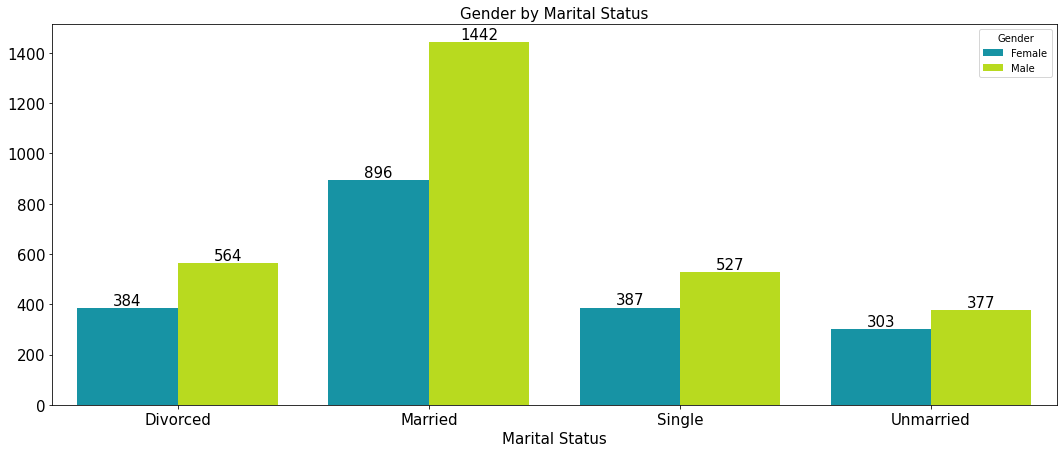

In [476]:
g_ms = df.groupby(["MaritalStatus", "Gender"])["Gender"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "MaritalStatus", y = "count", hue = "Gender", data = g_ms, palette = "nipy_spectral")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Gender by Marital Status", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Marital Status", size = 15)
plt.ylabel(None)
plt.show()

**Number of Trips by Gender**

In [477]:
t_g = df.groupby("Gender")["NumberOfTrips"].agg(["min", "mean", "max"]).round(2).reset_index()
t_g.columns = ["Gender", "Min Trips", "Avg Trips", "Max Trips"]
t_g

Gender  Min Trips  Avg Trips  Max Trips
0  Female        1.0       3.24        8.0
1    Male        1.0       3.21        8.0

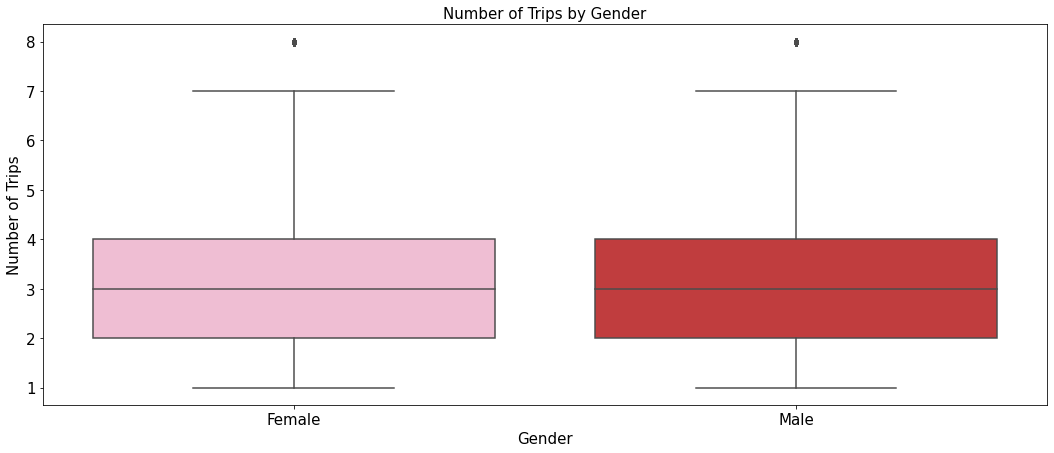

In [478]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "Gender", y = "NumberOfTrips", data = df, palette = "tab20_r")
plt.title("Number of Trips by Gender", size = 15)
plt.xlabel("Gender", size = 15)
plt.ylabel("Number of Trips", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Passport by Gender**

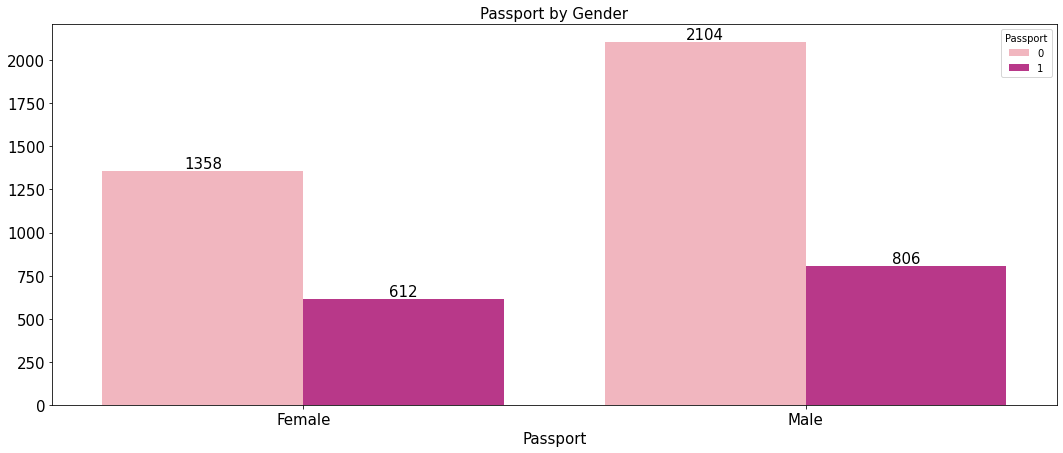

In [479]:
p_g = df.groupby(["Gender", "Passport"])["Passport"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Gender", y = "count", hue = "Passport", data = p_g, palette = "RdPu")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Passport by Gender", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Passport", size = 15)
plt.ylabel(None)
plt.show()

**Pitch Satisfaction Score by Gender**

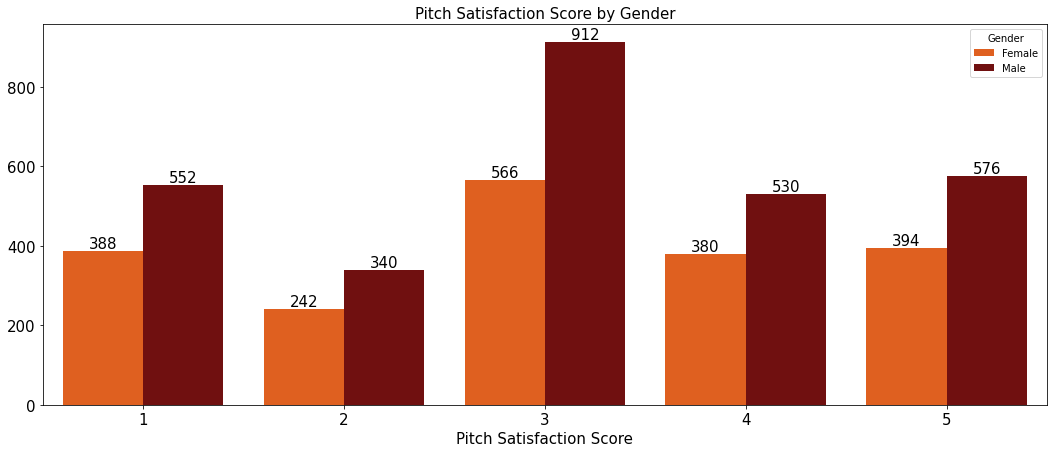

In [480]:
ps_g = df.groupby(["PitchSatisfactionScore", "Gender"])["Gender"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "PitchSatisfactionScore", y = "count", hue = "Gender", data = ps_g, palette = "gist_heat_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Pitch Satisfaction Score by Gender", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Pitch Satisfaction Score", size = 15)
plt.ylabel(None)
plt.show()

**Customer Car by Gender**

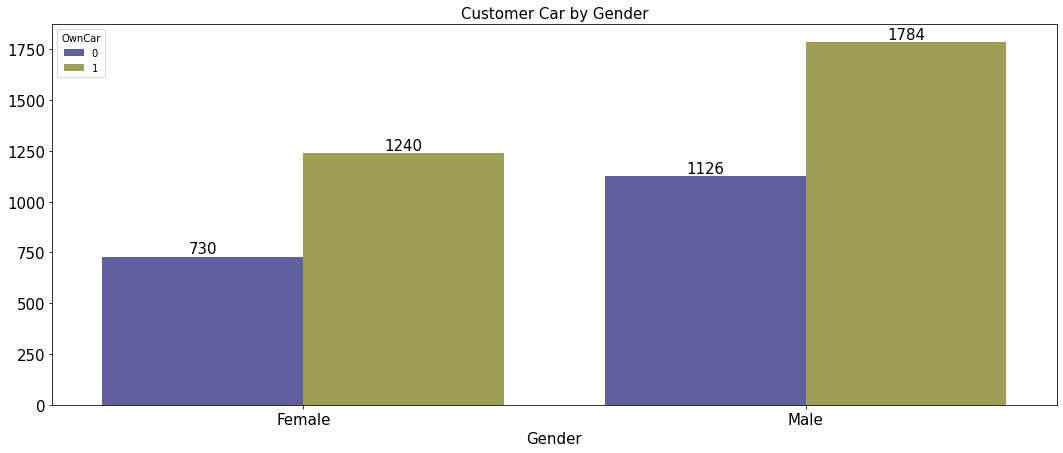

In [481]:
cc_g = df.groupby(["Gender", "OwnCar"])["OwnCar"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Gender", y = "count", hue = "OwnCar", data = cc_g, palette = "gist_stern")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Customer Car by Gender", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Gender", size = 15)
plt.ylabel(None)
plt.show()

**Genders having Number of Children Visited**

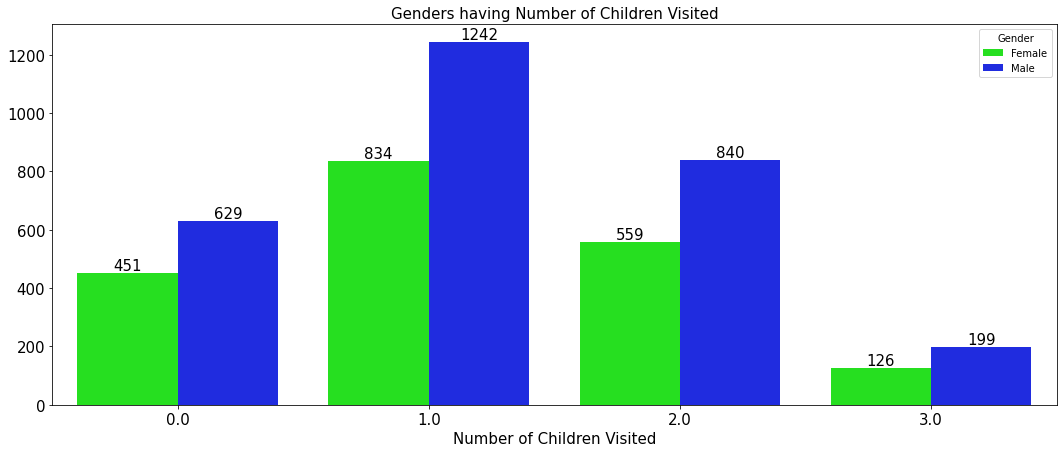

In [482]:
cv_g = df.groupby(["NumberOfChildrenVisited", "Gender"])["Gender"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "NumberOfChildrenVisited", y = "count", hue = "Gender", data = cv_g, palette = "hsv")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Genders having Number of Children Visited", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Number of Children Visited", size = 15)
plt.ylabel(None)
plt.show()

**Gender by Designation**

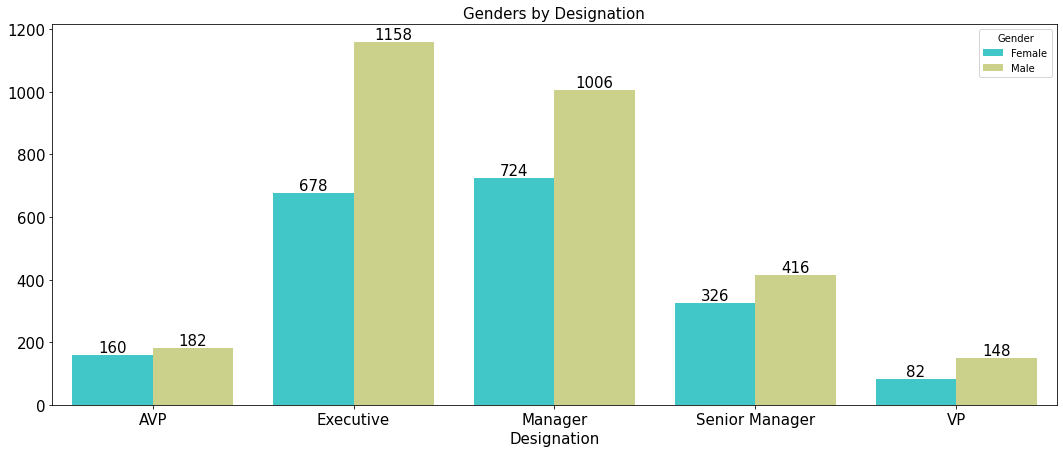

In [483]:
g_d = df.groupby(["Designation", "Gender"])["Gender"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Designation", y = "count", hue = "Gender", data = g_d, palette = "rainbow")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Genders by Designation", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Designation", size = 15)
plt.ylabel(None)
plt.show()

**Customer Age by Product Pitched**

In [484]:
ca_pp = df.groupby("ProductPitched")["Age"].agg(["min", "mean", "max"]).round(2).reset_index()
ca_pp.columns = ["Product Pitched", "Min Age", "Avg Age", "Max Age"]
ca_pp

Product Pitched  Min Age  Avg Age  Max Age
0           Basic     18.0    33.40     60.0
1          Deluxe     21.0    37.39     61.0
2            King     27.0    48.07     61.0
3        Standard     19.0    40.58     61.0
4    Super Deluxe     29.0    48.03     60.0

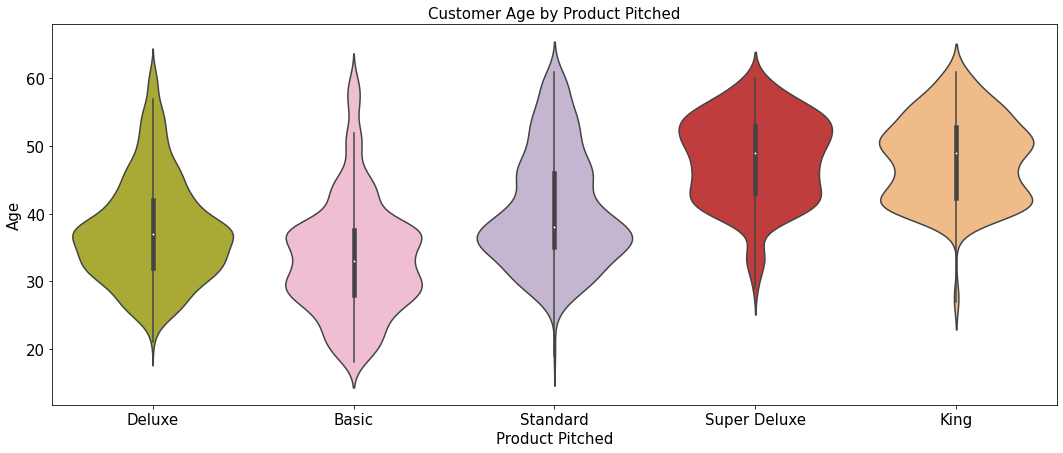

In [485]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "ProductPitched", y = "Age", data = df, palette = "tab20_r")
plt.title("Customer Age by Product Pitched", size = 15)
plt.xlabel("Product Pitched", size = 15)
plt.ylabel("Age", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**City Tier by Product Pitched**

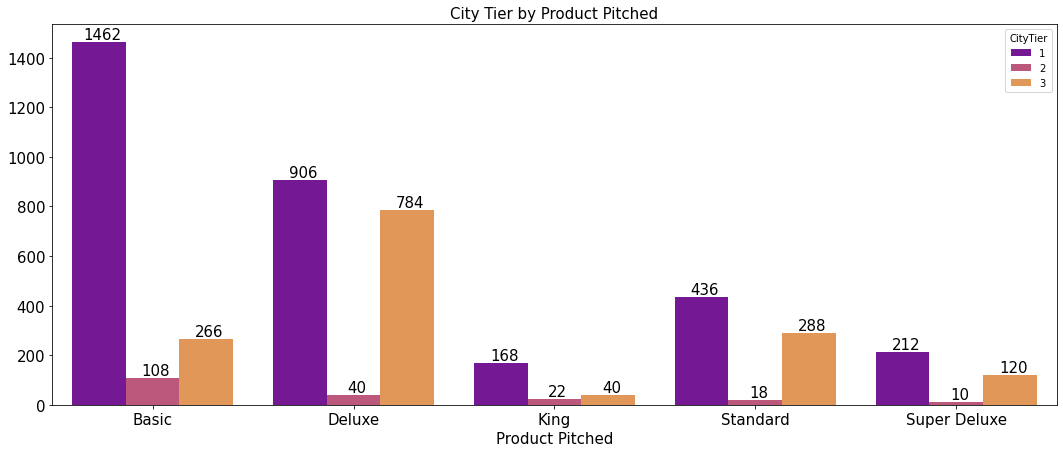

In [486]:
ct_pp = df.groupby(["ProductPitched", "CityTier"])["CityTier"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "ProductPitched", y = "count", hue = "CityTier", data = ct_pp, palette = "plasma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.15, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("City Tier by Product Pitched", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Product Pitched", size = 15)
plt.ylabel(None)
plt.show()

**Duration of Pitch by Product Pitched**

In [487]:
dp_pp = df.groupby("ProductPitched")["DurationOfPitch"].agg(["min", "mean", "max"]).round(2).reset_index()
dp_pp.columns = ["Product Pitched", "Min Duration", "Avg Duration", "Max Duration"]
dp_pp

Product Pitched  Min Duration  Avg Duration  Max Duration
0           Basic           5.0         15.09          36.0
1          Deluxe           5.0         15.89          36.0
2            King           5.0         12.10          33.0
3        Standard           5.0         15.99          36.0
4    Super Deluxe           6.0         16.23          36.0

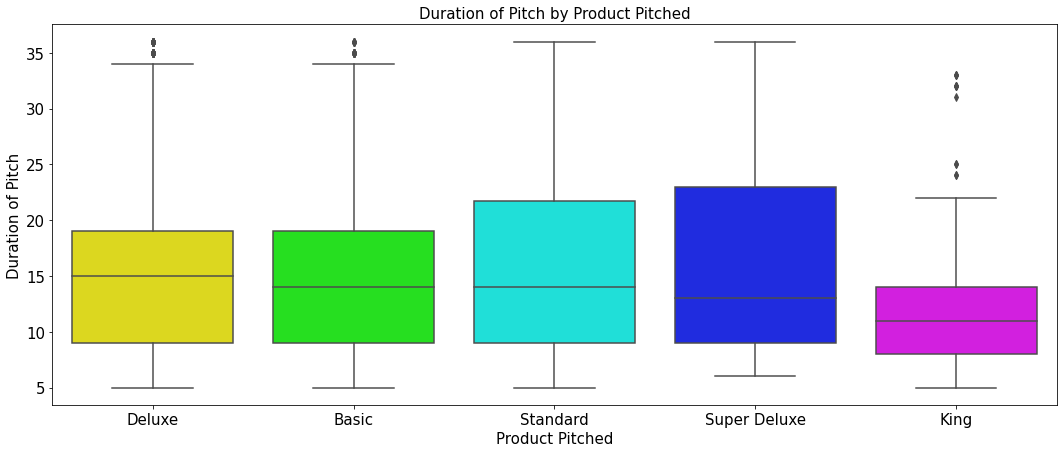

In [488]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "ProductPitched", y = "DurationOfPitch", data = df, palette = "hsv")
plt.title("Duration of Pitch by Product Pitched", size = 15)
plt.xlabel("Product Pitched", size = 15)
plt.ylabel("Duration of Pitch", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Number of Persons visited by Product Pitched**

In [489]:
pv_pp = df.groupby("ProductPitched")["NumberOfPersonVisited"].agg(["min", "mean", "max"]).round(2).reset_index()
pv_pp.columns = ["Product Pitched", "Min Persons", "Avg Persons", "Max Persons"]
pv_pp

Product Pitched  Min Persons  Avg Persons  Max Persons
0           Basic            1         2.93            5
1          Deluxe            1         2.89            5
2            King            2         2.85            4
3        Standard            1         2.92            5
4    Super Deluxe            1         2.85            4

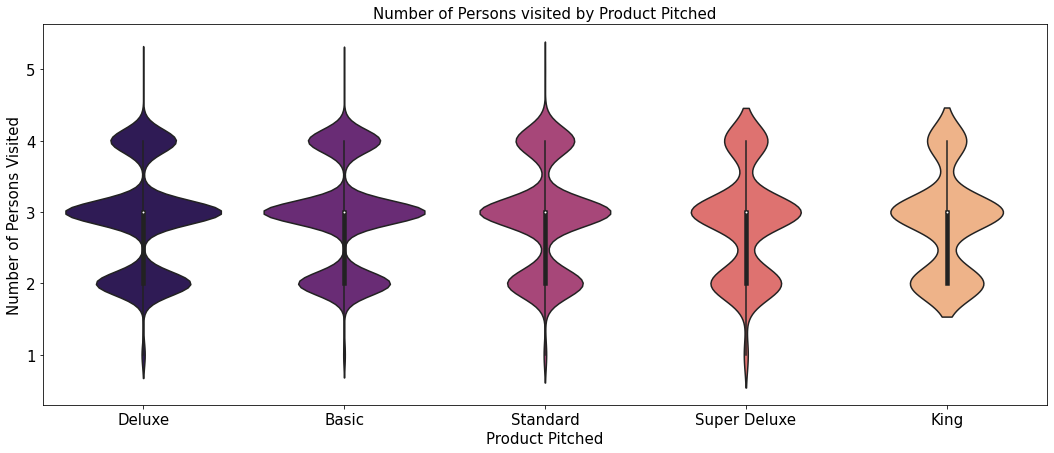

In [490]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "ProductPitched", y = "NumberOfPersonVisited", data = df, palette = "magma")
plt.title("Number of Persons visited by Product Pitched", size = 15)
plt.xlabel("Product Pitched", size = 15)
plt.ylabel("Number of Persons Visited", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Number of Followups by Product Pitched**

In [491]:
pv_pp = df.groupby("ProductPitched")["NumberOfFollowups"].agg(["min", "mean", "max"]).round(2).reset_index()
pv_pp.columns = ["Product Pitched", "Min Followups", "Avg Followups", "Max Followups"]
pv_pp

Product Pitched  Min Followups  Avg Followups  Max Followups
0           Basic            1.0           3.70            6.0
1          Deluxe            1.0           3.71            6.0
2            King            1.0           3.80            6.0
3        Standard            1.0           3.79            6.0
4    Super Deluxe            1.0           3.58            6.0

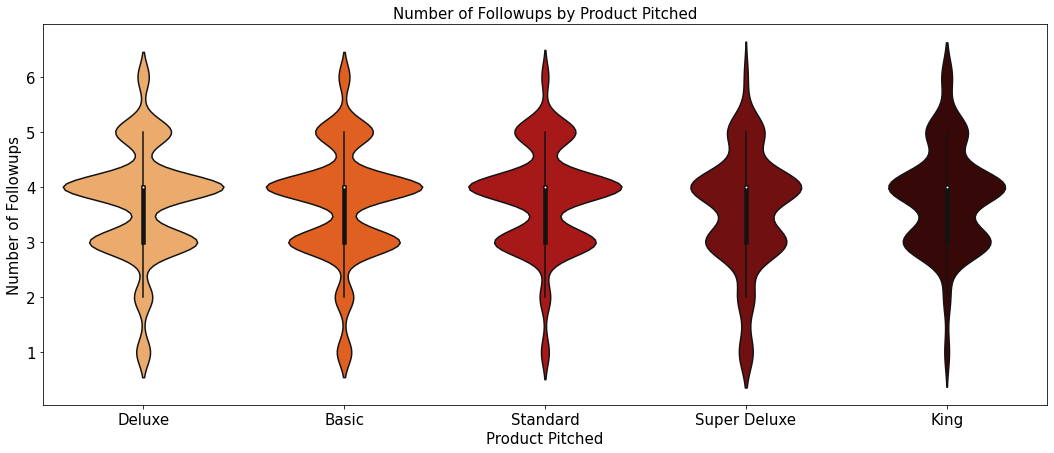

In [492]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "ProductPitched", y = "NumberOfFollowups", data = df, palette = "gist_heat_r")
plt.title("Number of Followups by Product Pitched", size = 15)
plt.xlabel("Product Pitched", size = 15)
plt.ylabel("Number of Followups", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Preferred Property Star by Product Pitched**

In [493]:
ps_pp = df.groupby("ProductPitched")["PreferredPropertyStar"].agg(["min", "mean", "max"]).round(2).reset_index()
ps_pp.columns = ["Product Pitched", "Min Star", "Avg Star", "Max Star"]
ps_pp

Product Pitched  Min Star  Avg Star  Max Star
0           Basic       3.0      3.59       5.0
1          Deluxe       3.0      3.56       5.0
2            King       3.0      3.43       5.0
3        Standard       3.0      3.65       5.0
4    Super Deluxe       3.0      3.58       5.0

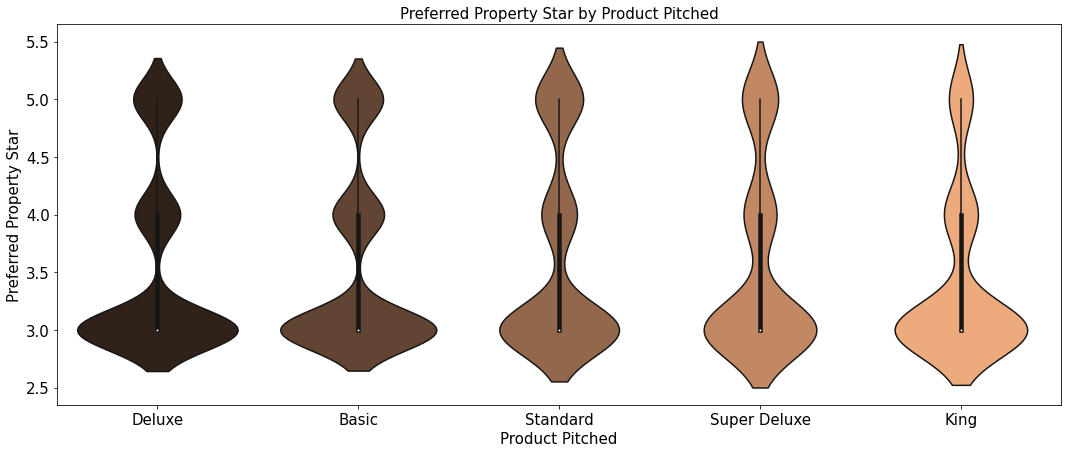

In [494]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "ProductPitched", y = "PreferredPropertyStar", data = df, palette = "copper")
plt.title("Preferred Property Star by Product Pitched", size = 15)
plt.xlabel("Product Pitched", size = 15)
plt.ylabel("Preferred Property Star", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Marital Status by Product Pitched**

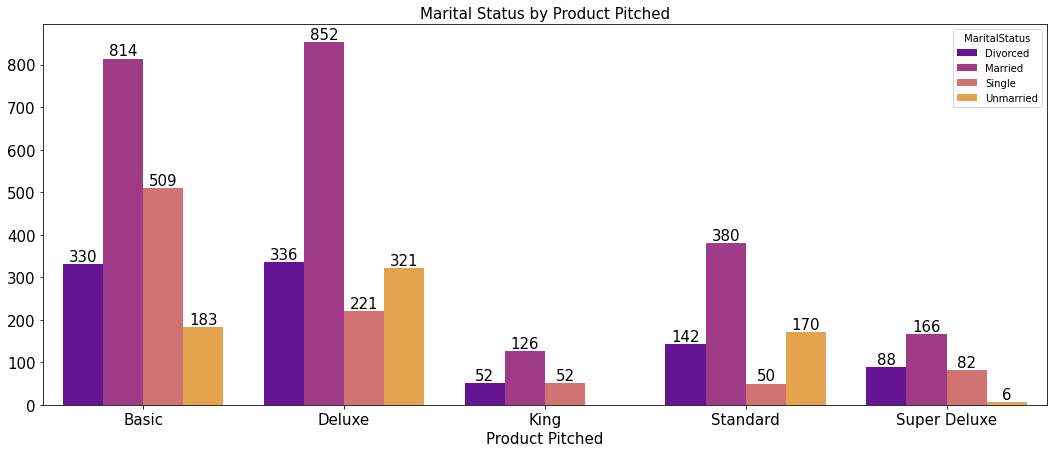

In [495]:
ms_pp = df.groupby(["ProductPitched", "MaritalStatus"])["MaritalStatus"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "ProductPitched", y = "count", hue = "MaritalStatus", data = ms_pp, palette = "plasma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.1, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Marital Status by Product Pitched", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Product Pitched", size = 15)
plt.ylabel(None)
plt.show()

**Number of Trips by Product Pitched**

In [496]:
t_pp = df.groupby("ProductPitched")["NumberOfTrips"].agg(["min", "mean", "max"]).round(2).reset_index()
t_pp.columns = ["Product Pitched", "Min Trips", "Avg Trips", "Max Trips"]
t_pp

Product Pitched  Min Trips  Avg Trips  Max Trips
0           Basic        1.0       3.08        8.0
1          Deluxe        1.0       3.26        8.0
2            King        1.0       3.31        8.0
3        Standard        1.0       3.32        8.0
4    Super Deluxe        1.0       3.54        8.0

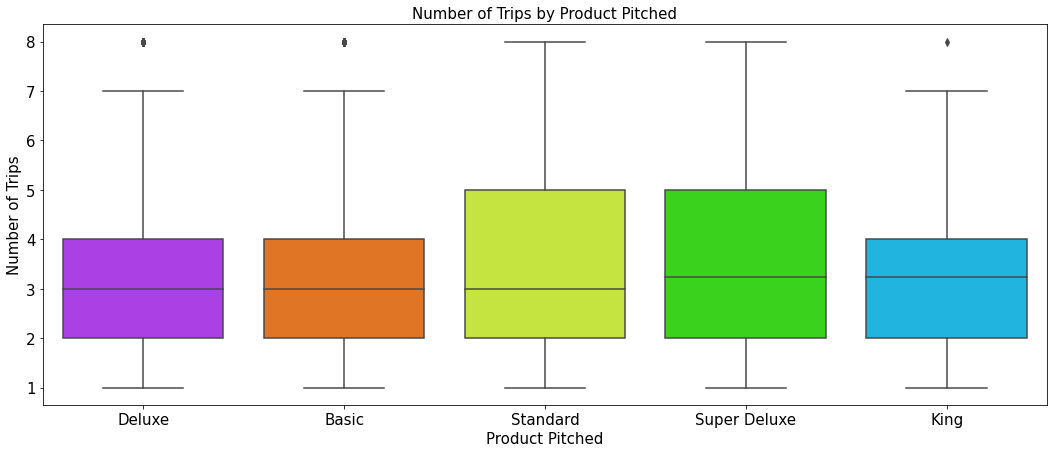

In [497]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "ProductPitched", y = "NumberOfTrips", data = df, palette = "gist_ncar_r")
plt.title("Number of Trips by Product Pitched", size = 15)
plt.xlabel("Product Pitched", size = 15)
plt.ylabel("Number of Trips", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Customers having Passports by Product Piched**

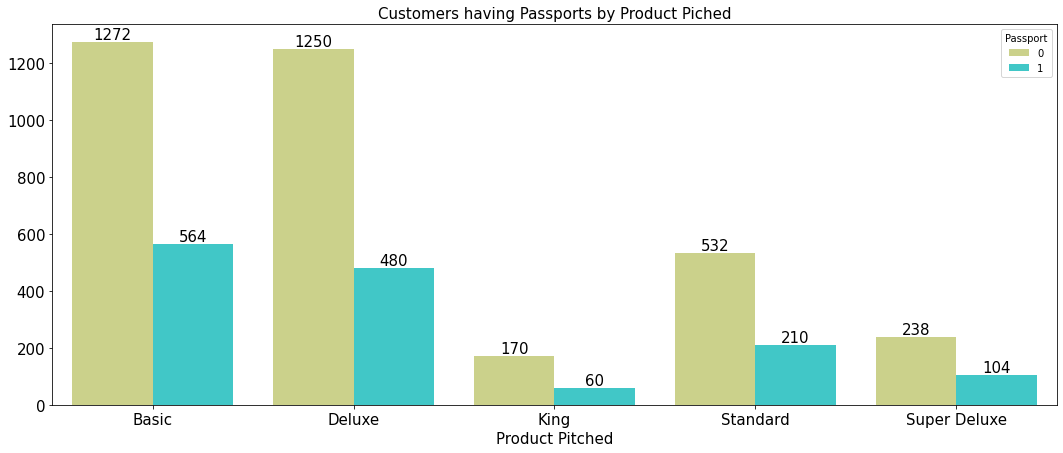

In [498]:
cp_pp = df.groupby(["ProductPitched", "Passport"])["Passport"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "ProductPitched", y = "count", hue = "Passport", data = cp_pp, palette = "rainbow_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Customers having Passports by Product Piched", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Product Pitched", size = 15)
plt.ylabel(None)
plt.show()

**Pitch Satisfaction Score by Product Pitched**

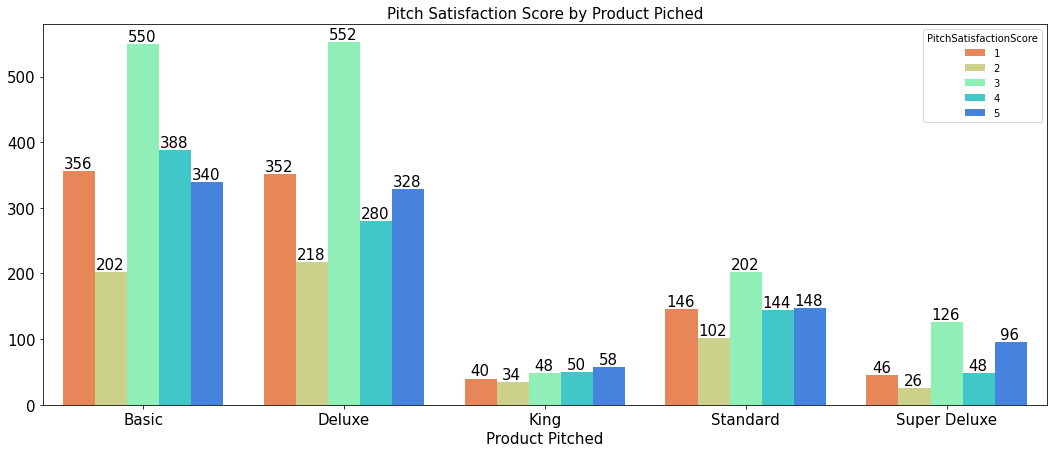

In [499]:
ps_pp = df.groupby(["ProductPitched", "PitchSatisfactionScore"])["PitchSatisfactionScore"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "ProductPitched", y = "count", hue = "PitchSatisfactionScore", data = ps_pp, palette = "rainbow_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.075, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Pitch Satisfaction Score by Product Piched", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Product Pitched", size = 15)
plt.ylabel(None)
plt.show()

**Customers having Cars by Product Pitched**

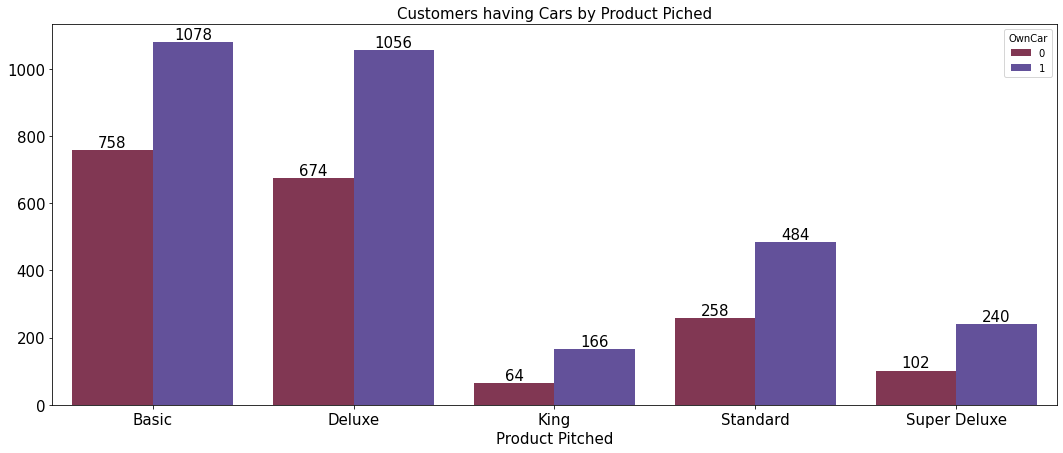

In [500]:
cc_pp = df.groupby(["ProductPitched", "OwnCar"])["OwnCar"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "ProductPitched", y = "count", hue = "OwnCar", data = cc_pp, palette = "twilight_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Customers having Cars by Product Piched", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Product Pitched", size = 15)
plt.ylabel(None)
plt.show()

**Number Of Children Visited by Product Pitched**

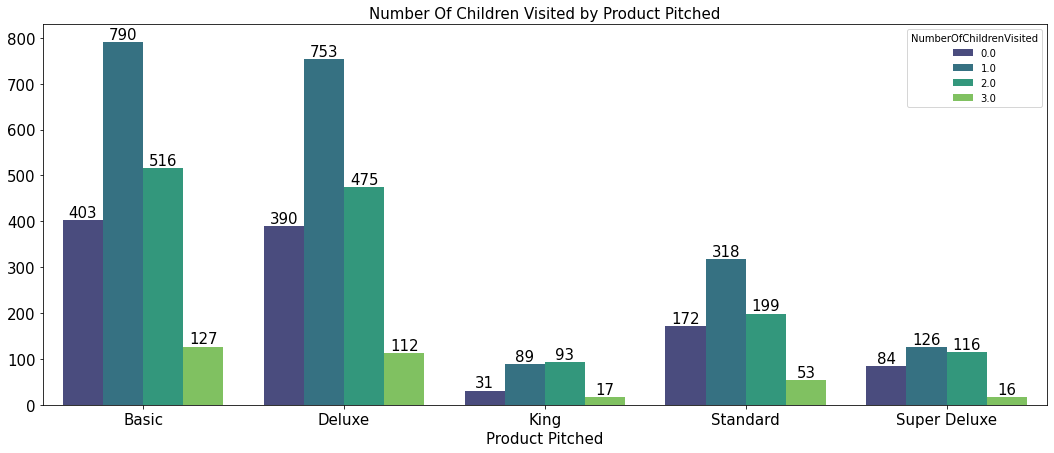

In [501]:
cv_pp = df.groupby(["ProductPitched", "NumberOfChildrenVisited"])["NumberOfChildrenVisited"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "ProductPitched", y = "count", hue = "NumberOfChildrenVisited", data = cv_pp, palette = "viridis")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.1, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Number Of Children Visited by Product Pitched", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Product Pitched", size = 15)
plt.ylabel(None)
plt.show()

**Product Pitched by Designation**

In [502]:
cv_pp = df.groupby(["ProductPitched", "Designation"])["Designation"].agg(["count"]).reset_index()
cv_pp

ProductPitched     Designation  count
0          Basic       Executive   1836
1         Deluxe         Manager   1730
2           King              VP    230
3       Standard  Senior Manager    742
4   Super Deluxe             AVP    342

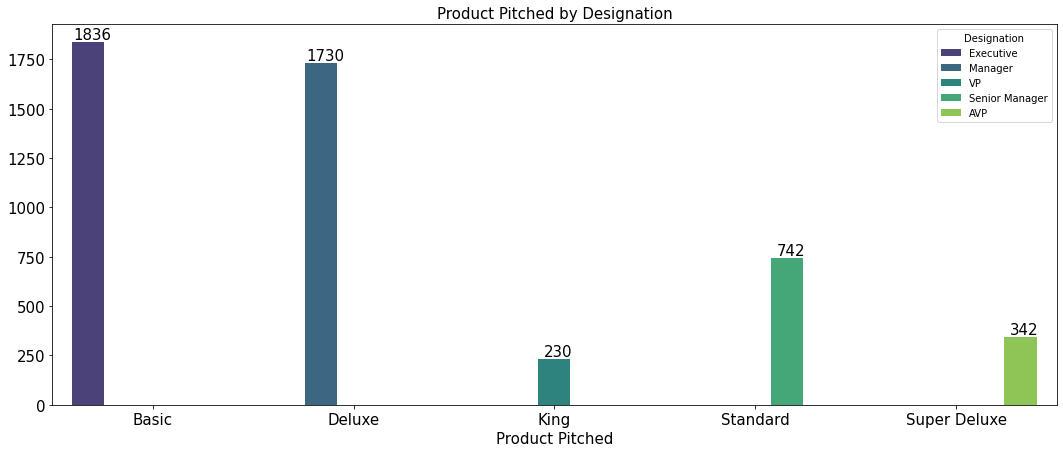

In [503]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "ProductPitched", y = "count", hue = "Designation", data = cv_pp, palette = "viridis")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.1, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Product Pitched by Designation", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Product Pitched", size = 15)
plt.ylabel(None)
plt.show()

**Product Pitched by Monthly Income**

In [504]:
pp_mi = df.groupby("ProductPitched")["MonthlyIncome"].agg(["min", "mean", "max"]).round(2).reset_index()
pp_mi.columns = ["Product Pitched", "Min Income", "Avg Income", "Max Income"]
pp_mi

Product Pitched  Min Income  Avg Income  Max Income
0           Basic     16009.0    20031.00     37868.0
1          Deluxe      1000.0    22724.45     38525.0
2            King     17517.0    35878.95     38677.0
3        Standard     17372.0    26637.75     38395.0
4    Super Deluxe     17705.0    32241.05     37502.0

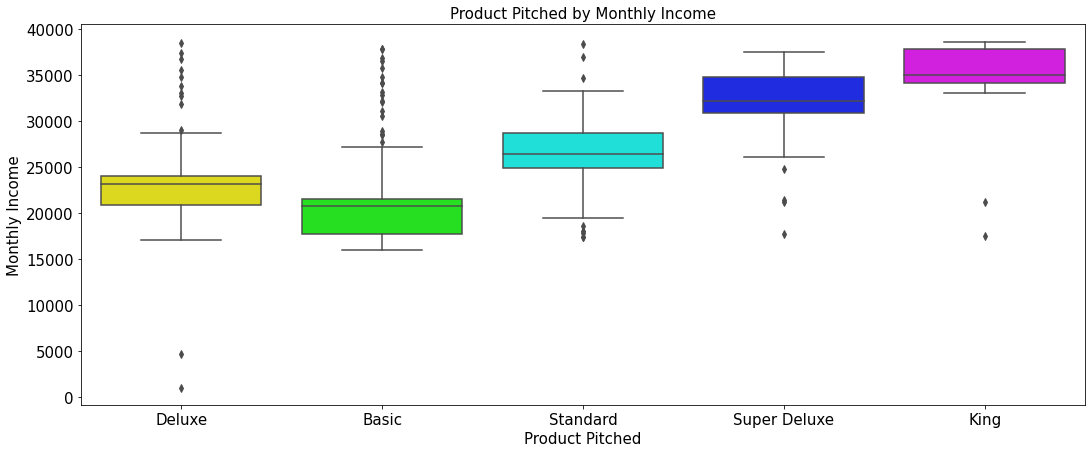

In [505]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "ProductPitched", y = "MonthlyIncome", data = df, palette = "hsv")
plt.title("Product Pitched by Monthly Income", size = 15)
plt.xlabel("Product Pitched", size = 15)
plt.ylabel("Monthly Income", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Marital Status by Age**

In [506]:
ms_a = df.groupby("MaritalStatus")["Age"].agg(["min", "mean", "max"]).round(2).reset_index()
ms_a.columns = ["Marital Status", "Min Age", "Avg Age", "Max Age"]
ms_a

Marital Status  Min Age  Avg Age  Max Age
0       Divorced     22.0    38.52     61.0
1        Married     21.0    38.23     61.0
2         Single     18.0    35.95     60.0
3      Unmarried     20.0    36.53     61.0

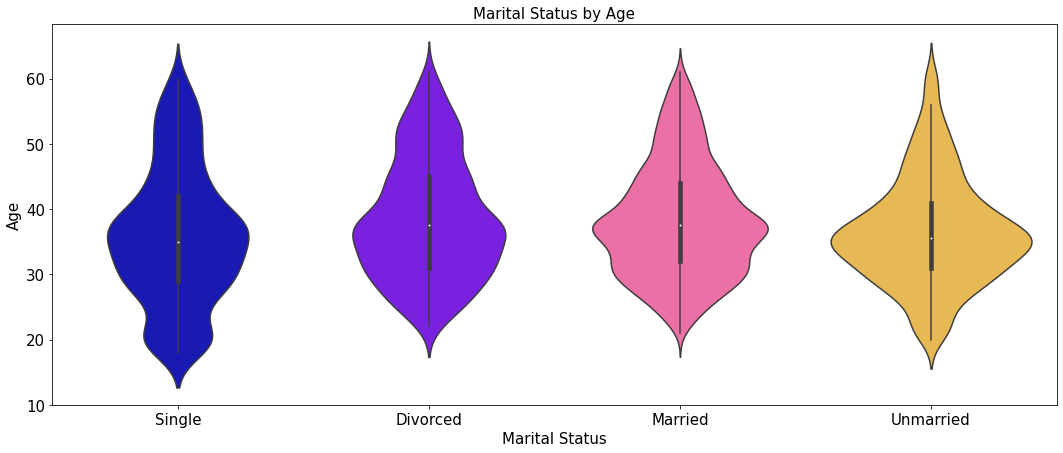

In [507]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "MaritalStatus", y = "Age", data = df, palette = "gnuplot2")
plt.title("Marital Status by Age", size = 15)
plt.xlabel("Marital Status", size = 15)
plt.ylabel("Age", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**City Tier by Martial Status**

In [508]:
ct_ms = df.groupby("MaritalStatus")["CityTier"].agg(["min", "mean", "max"]).round(2).reset_index()
ct_ms.columns = ["Marital Status", "Min City Tier", "Avg City Tier", "Max City Tier"]
ct_ms

Marital Status  Min City Tier  Avg City Tier  Max City Tier
0       Divorced              1           1.68              3
1        Married              1           1.62              3
2         Single              1           1.60              3
3      Unmarried              1           1.82              3

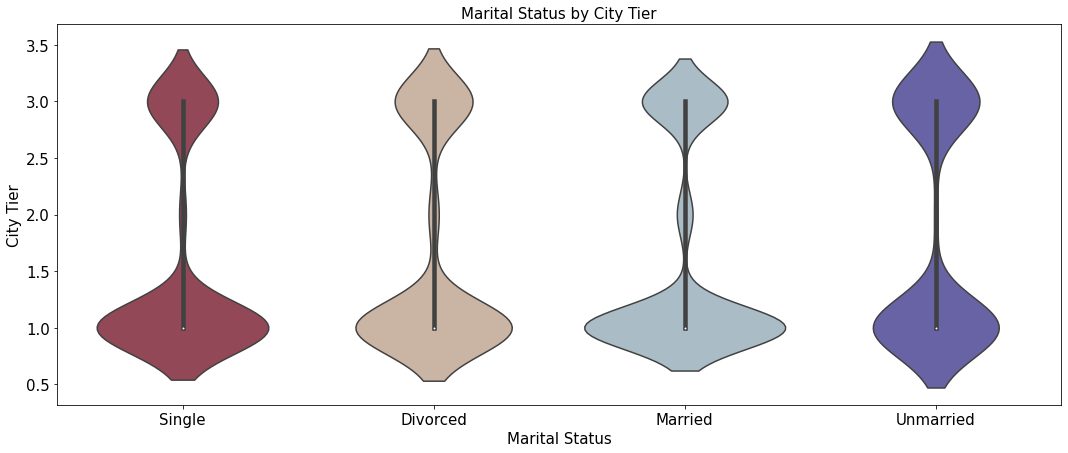

In [509]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "MaritalStatus", y = "CityTier", data = df, palette = "twilight_shifted_r")
plt.title("Marital Status by City Tier", size = 15)
plt.xlabel("Marital Status", size = 15)
plt.ylabel("City Tier", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Duration of Pitch by Marital Status**

In [510]:
dp_ms = df.groupby("MaritalStatus")["DurationOfPitch"].agg(["min", "mean", "max"]).round(2).reset_index()
dp_ms.columns = ["Marital Status", "Min Duration", "Avg Duration", "Max Duration"]
dp_ms

Marital Status  Min Duration  Avg Duration  Max Duration
0       Divorced           5.0         15.40          36.0
1        Married           5.0         15.60          36.0
2         Single           5.0         15.14          36.0
3      Unmarried           5.0         15.41          36.0

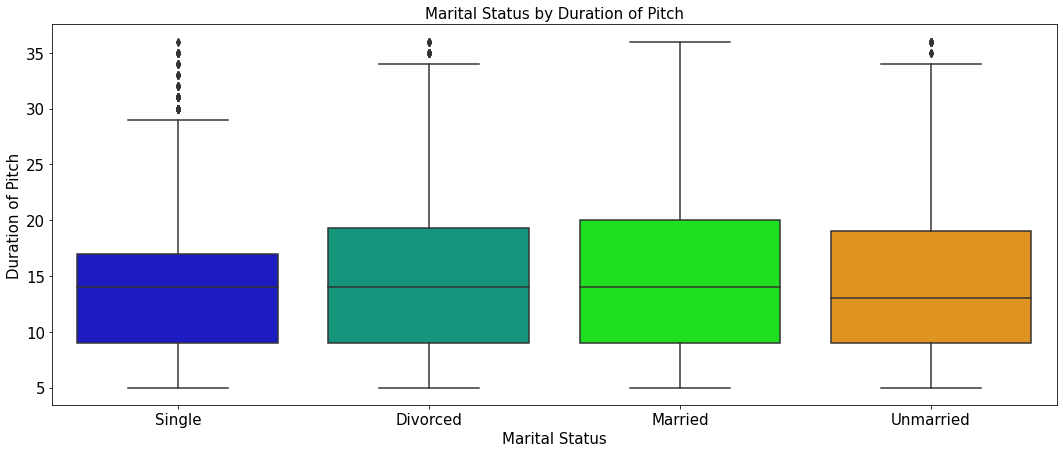

In [511]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "MaritalStatus", y = "DurationOfPitch", data = df, palette = "nipy_spectral")
plt.title("Marital Status by Duration of Pitch", size = 15)
plt.xlabel("Marital Status", size = 15)
plt.ylabel("Duration of Pitch", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Number Of Person Visited by Marital Status**

In [512]:
pv_ms = df.groupby("MaritalStatus")["NumberOfPersonVisited"].agg(["min", "mean", "max"]).round(2).reset_index()
pv_ms.columns = ["Marital Status", "Min Person", "Avg Person", "Max Person"]
pv_ms

Marital Status  Min Person  Avg Person  Max Person
0       Divorced           1        2.93           4
1        Married           1        2.93           5
2         Single           1        2.67           5
3      Unmarried           1        3.09           5

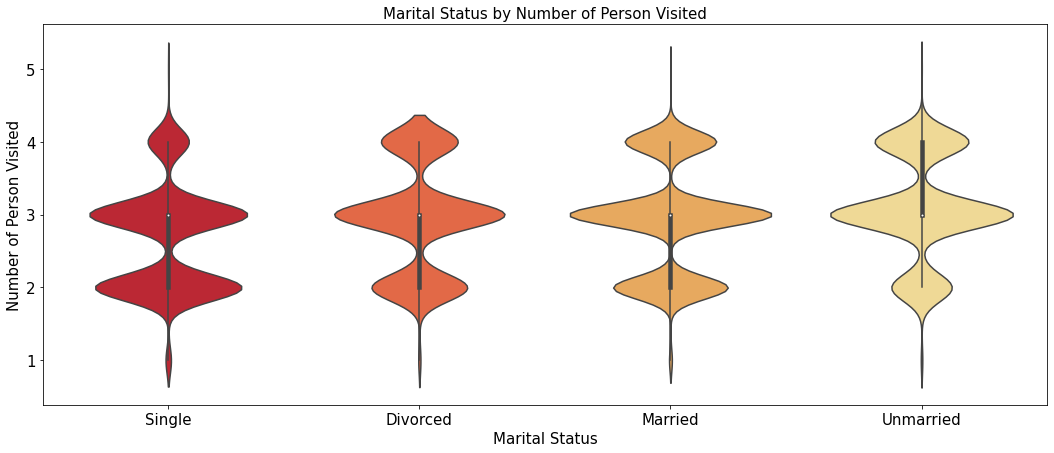

In [513]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "MaritalStatus", y = "NumberOfPersonVisited", data = df, palette = "YlOrRd_r")
plt.title("Marital Status by Number of Person Visited", size = 15)
plt.xlabel("Marital Status", size = 15)
plt.ylabel("Number of Person Visited", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Marital Status by Number Of Followups**

In [514]:
nf_ms = df.groupby("MaritalStatus")["NumberOfFollowups"].agg(["min", "mean", "max"]).round(2).reset_index()
nf_ms.columns = ["Marital Status", "Min Followups", "Avg Followups", "Max Followups"]
nf_ms

Marital Status  Min Followups  Avg Followups  Max Followups
0       Divorced            1.0           3.68            6.0
1        Married            1.0           3.67            6.0
2         Single            1.0           3.61            6.0
3      Unmarried            1.0           4.01            6.0

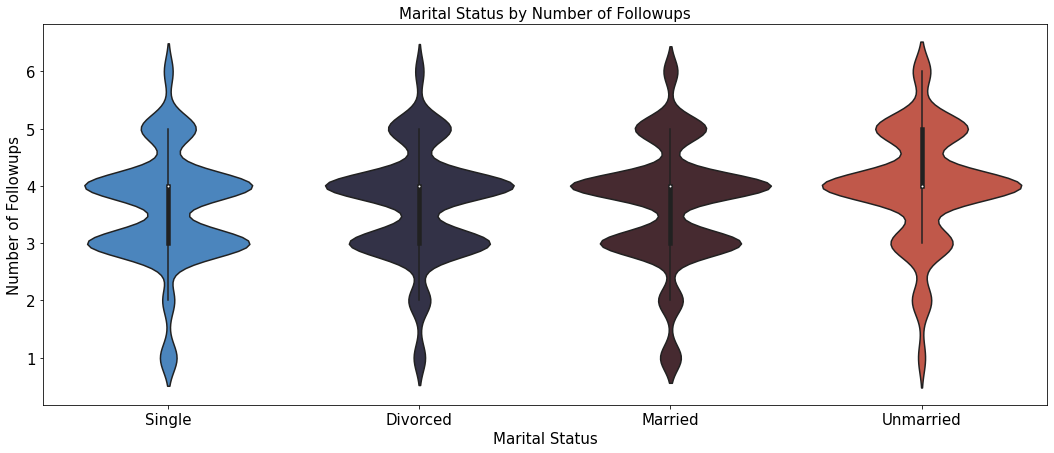

In [515]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "MaritalStatus", y = "NumberOfFollowups", data = df, palette = "icefire")
plt.title("Marital Status by Number of Followups", size = 15)
plt.xlabel("Marital Status", size = 15)
plt.ylabel("Number of Followups", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Preferred Property Star by Marital Status**

In [516]:
ps_ms = df.groupby("MaritalStatus")["PreferredPropertyStar"].agg(["min", "mean", "max"]).round(2).reset_index()
ps_ms.columns = ["Marital Status", "Min Star", "Avg Star", "Max Star"]
ps_ms

Marital Status  Min Star  Avg Star  Max Star
0       Divorced       3.0      3.57       5.0
1        Married       3.0      3.59       5.0
2         Single       3.0      3.56       5.0
3      Unmarried       3.0      3.56       5.0

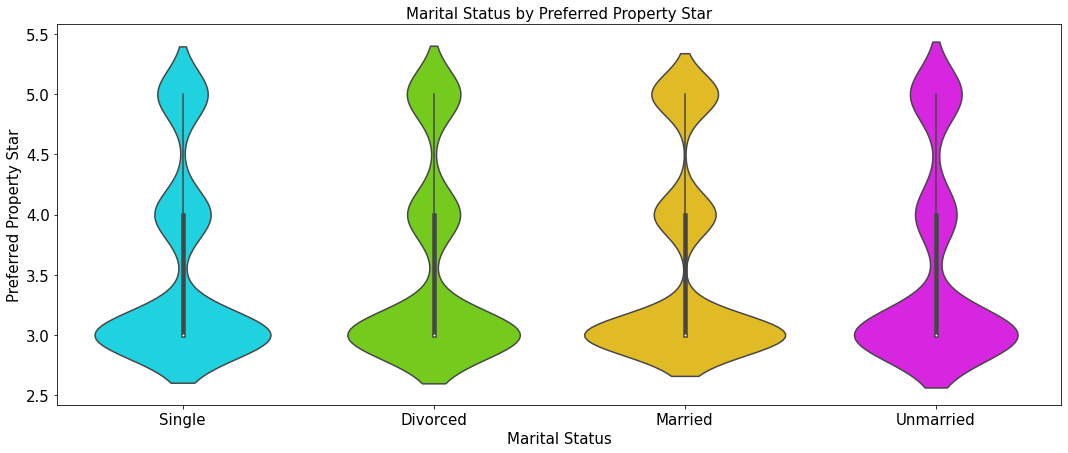

In [517]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "MaritalStatus", y = "PreferredPropertyStar", data = df, palette = "gist_ncar")
plt.title("Marital Status by Preferred Property Star", size = 15)
plt.xlabel("Marital Status", size = 15)
plt.ylabel("Preferred Property Star", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Number of Trips by Marital Status**

In [518]:
t_ms = df.groupby("MaritalStatus")["NumberOfTrips"].agg(["min", "mean", "max"]).round(2).reset_index()
t_ms.columns = ["Marital Status", "Min Trips","Avg Trips","Max Trips"]
t_ms

Marital Status  Min Trips  Avg Trips  Max Trips
0       Divorced        1.0       3.24        8.0
1        Married        1.0       3.31        8.0
2         Single        1.0       2.92        8.0
3      Unmarried        1.0       3.31        8.0

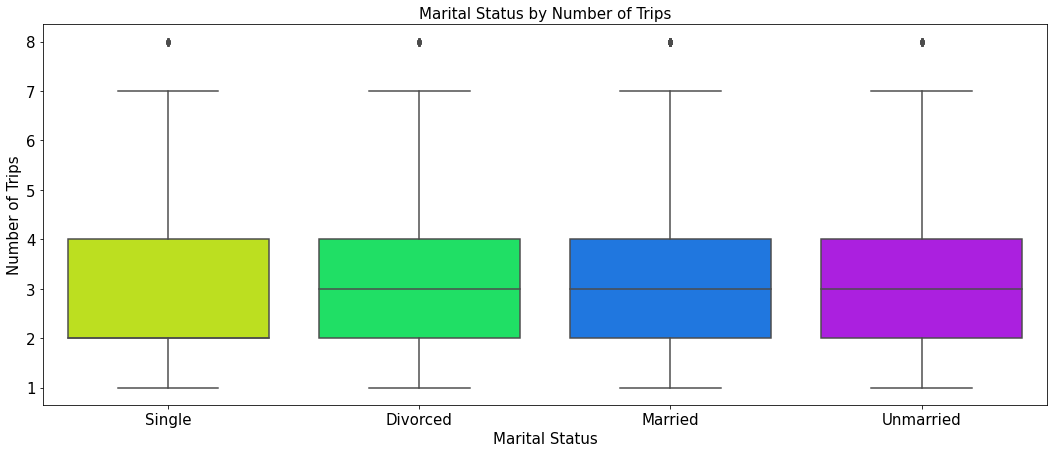

In [519]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "MaritalStatus", y = "NumberOfTrips", data = df, palette = "hsv")
plt.title("Marital Status by Number of Trips", size = 15)
plt.xlabel("Marital Status", size = 15)
plt.ylabel("Number of Trips", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Passport by Marital Status**

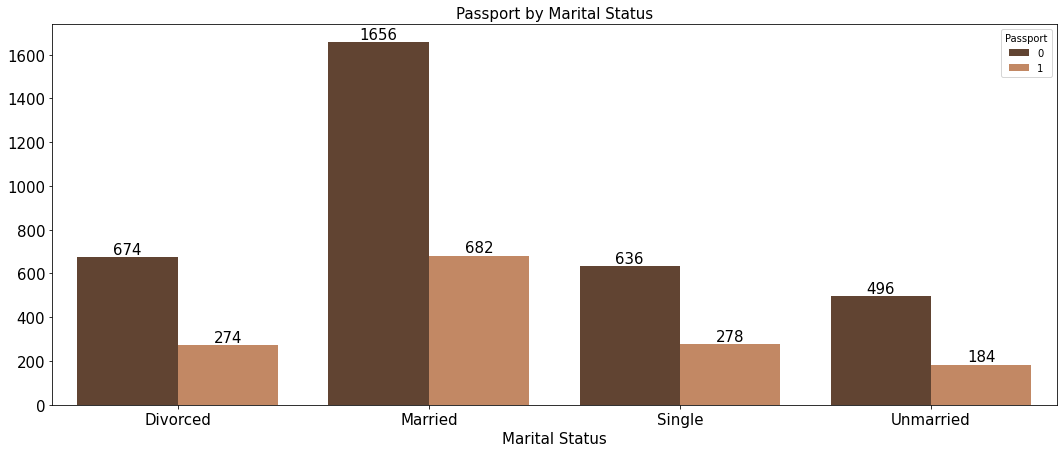

In [520]:
p_ms = df.groupby(["MaritalStatus", "Passport"])["Passport"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "MaritalStatus", y = "count", hue = "Passport", data = p_ms, palette = "copper")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Passport by Marital Status", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Marital Status", size = 15)
plt.ylabel(None)
plt.show()

**Cars by Marital Status**

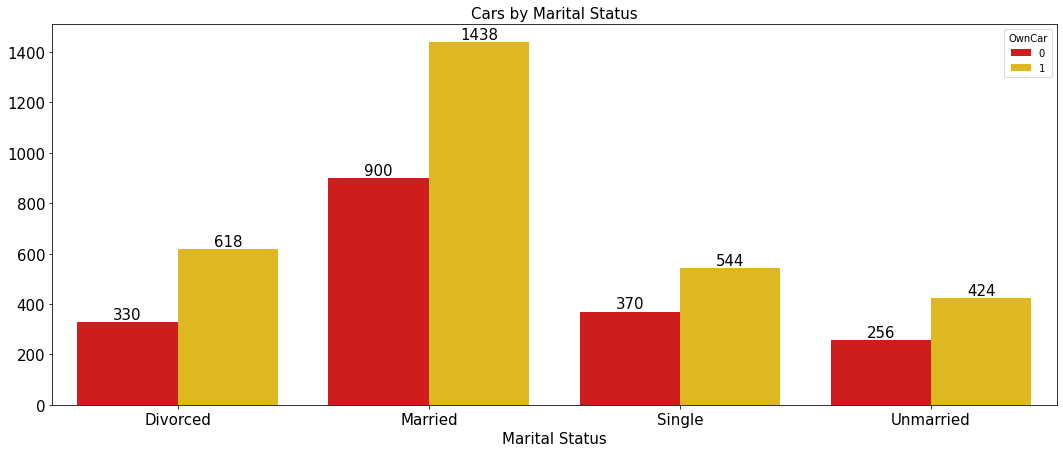

In [521]:
c_ms = df.groupby(["MaritalStatus", "OwnCar"])["OwnCar"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "MaritalStatus", y = "count", hue = "OwnCar", data = c_ms, palette = "hot")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Cars by Marital Status", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Marital Status", size = 15)
plt.ylabel(None)
plt.show()

**Children Visited by Marital Status**

In [522]:
cv_ms = df.groupby("MaritalStatus")["NumberOfChildrenVisited"].agg(["min", "mean", "max"]).round(2).reset_index()
cv_ms.columns = ["Marital Status", "Min Children", "Avg Children", "Max Children"]
cv_ms

Marital Status  Min Children  Avg Children  Max Children
0       Divorced           0.0          1.17           3.0
1        Married           0.0          1.22           3.0
2         Single           0.0          1.02           3.0
3      Unmarried           0.0          1.39           3.0

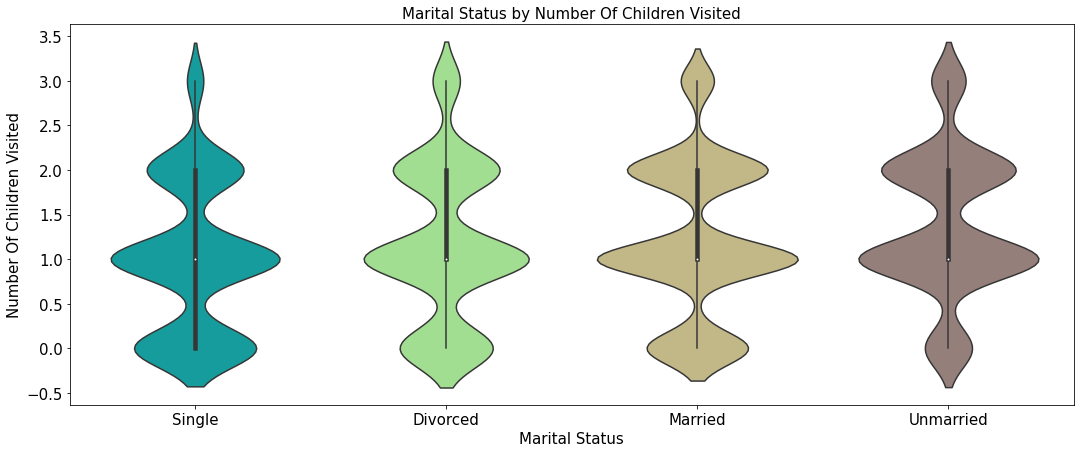

In [523]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "MaritalStatus", y = "NumberOfChildrenVisited", data = df, palette = "terrain")
plt.title("Marital Status by Number Of Children Visited", size = 15)
plt.xlabel("Marital Status", size = 15)
plt.ylabel("Number Of Children Visited", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Designation by Marital Status**

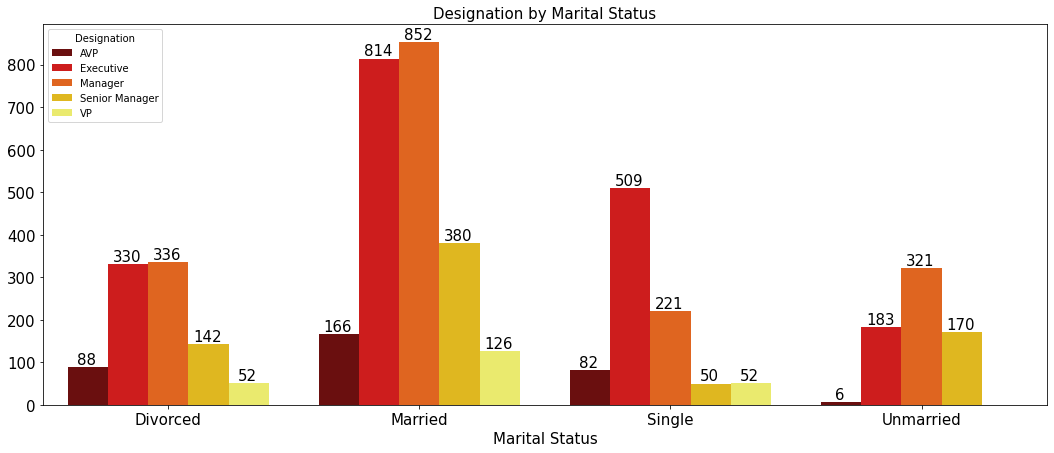

In [524]:
d_ms = df.groupby(["MaritalStatus", "Designation"])["Designation"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "MaritalStatus", y = "count", hue = "Designation", data = d_ms, palette = "hot")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.075, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Designation by Marital Status", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Marital Status", size = 15)
plt.ylabel(None)
plt.show()

**Monthly Income by Marital Status**

In [525]:
mi_ms = df.groupby("MaritalStatus")["MonthlyIncome"].agg(["min", "mean", "max"]).round(2).reset_index()
mi_ms.columns = ["Marital Status", "Min Income", "Avg Income", "Max Income"]
mi_ms

Marital Status  Min Income  Avg Income  Max Income
0       Divorced     16052.0    24003.03     38677.0
1        Married     16052.0    23850.14     38677.0
2         Single      1000.0    22351.67     38604.0
3      Unmarried     21278.0    23806.04     28566.0

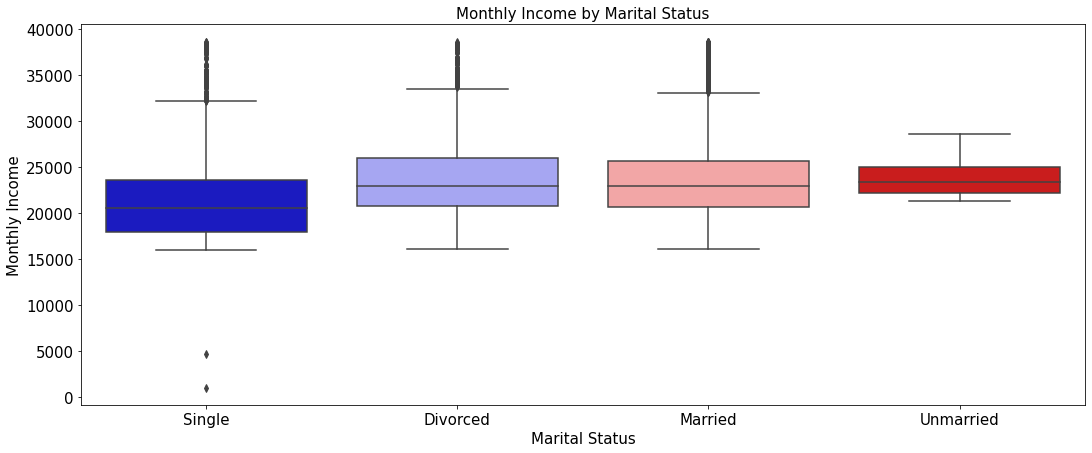

In [526]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "MaritalStatus", y = "MonthlyIncome", data = df, palette = "seismic")
plt.title("Monthly Income by Marital Status", size = 15)
plt.xlabel("Marital Status", size = 15)
plt.ylabel("Monthly Income", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Age by Designation**

In [527]:
a_d = df.groupby("Designation")["Age"].agg(["min", "mean", "max"]).round(2).reset_index()
a_d.columns = ["Designation", "Min Age", "Avg Age", "Max Age"]
a_d

Designation  Min Age  Avg Age  Max Age
0             AVP     29.0    48.03     60.0
1       Executive     18.0    33.40     60.0
2         Manager     21.0    37.39     61.0
3  Senior Manager     19.0    40.58     61.0
4              VP     27.0    48.07     61.0

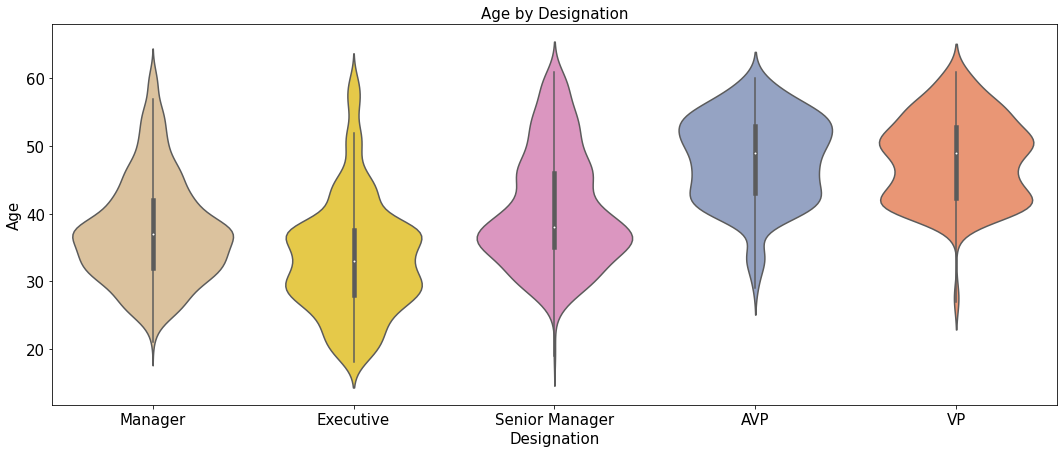

In [528]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "Designation", y = "Age", data = df, palette = "Set2_r")
plt.title("Age by Designation", size = 15)
plt.xlabel("Designation", size = 15)
plt.ylabel("Age", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**City Tier by Designation**

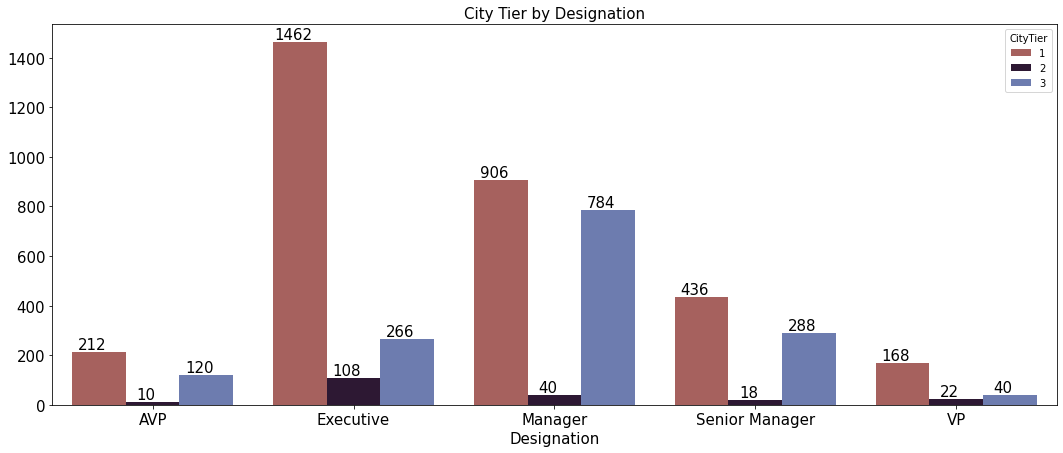

In [529]:
c_d = df.groupby(["Designation", "CityTier"])["CityTier"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Designation", y = "count", hue = "CityTier", data = c_d, palette = "twilight_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.1, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("City Tier by Designation", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Designation", size = 15)
plt.ylabel(None)
plt.show()

**Duration of Pitch by Designation**

In [530]:
p_d = df.groupby("Designation")["DurationOfPitch"].agg(["min", "mean", "max"]).round(2).reset_index()
p_d.columns = ["Designation", "Min Duration", "Avg Duration", "Max Duration"]
p_d

Designation  Min Duration  Avg Duration  Max Duration
0             AVP           6.0         16.23          36.0
1       Executive           5.0         15.09          36.0
2         Manager           5.0         15.89          36.0
3  Senior Manager           5.0         15.99          36.0
4              VP           5.0         12.10          33.0

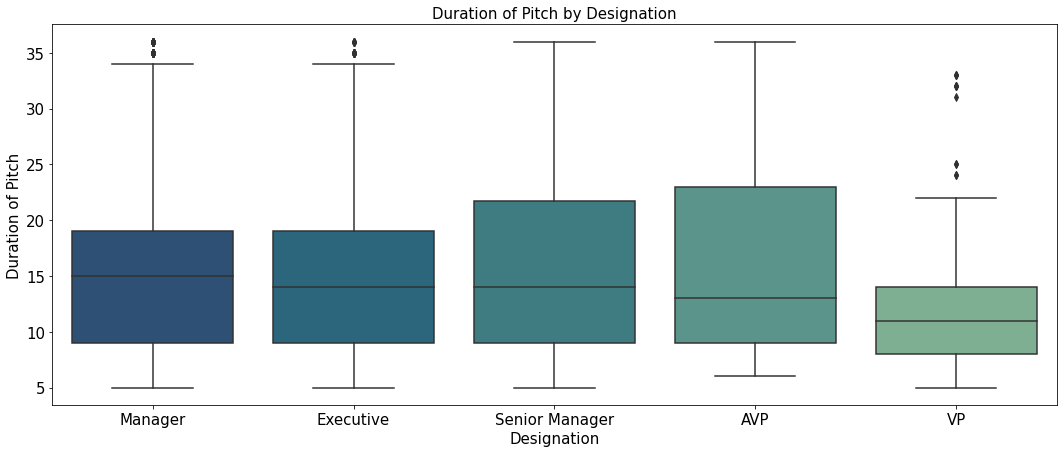

In [531]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "Designation", y = "DurationOfPitch", data = df, palette = "crest_r")
plt.title("Duration of Pitch by Designation", size = 15)
plt.xlabel("Designation", size = 15)
plt.ylabel("Duration of Pitch", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Number of Person Visited by Designation**

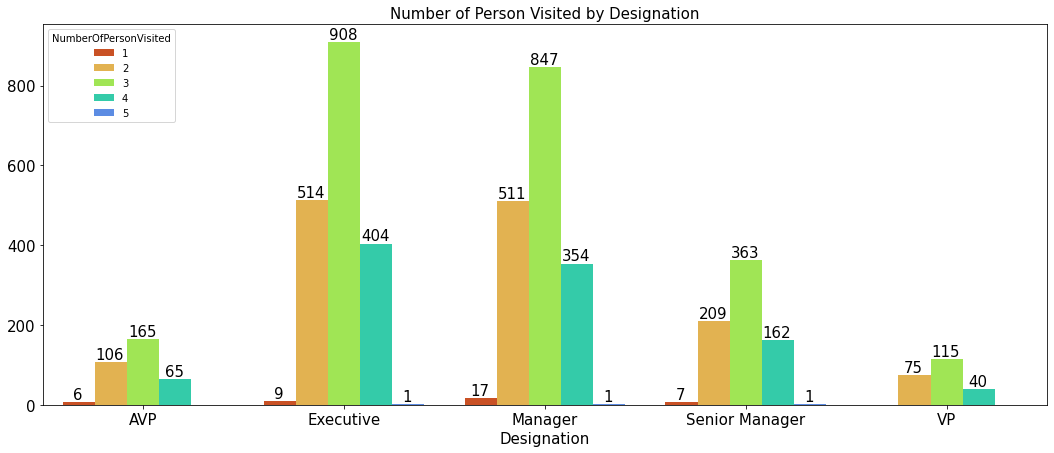

In [532]:
pv_d = df.groupby(["Designation", "NumberOfPersonVisited"])["NumberOfPersonVisited"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Designation", y = "count", hue = "NumberOfPersonVisited", data = pv_d, palette = "turbo_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.075, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Number of Person Visited by Designation", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Designation", size = 15)
plt.ylabel(None)
plt.show()

**Number Of Followups by Designation**

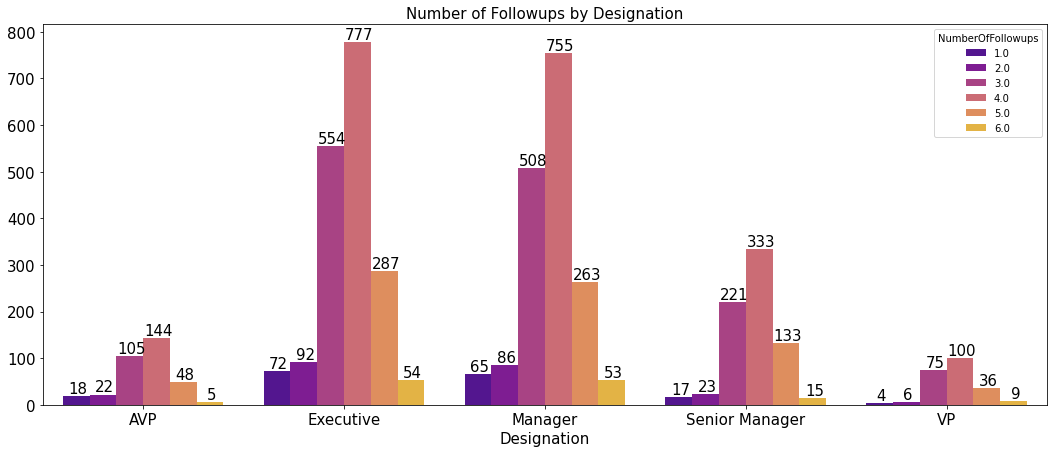

In [533]:
f_d = df.groupby(["Designation", "NumberOfFollowups"])["NumberOfFollowups"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Designation", y = "count", hue = "NumberOfFollowups", data = f_d, palette = "plasma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.075, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Number of Followups by Designation", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Designation", size = 15)
plt.ylabel(None)
plt.show()

**Preferred Property Star by Designation**

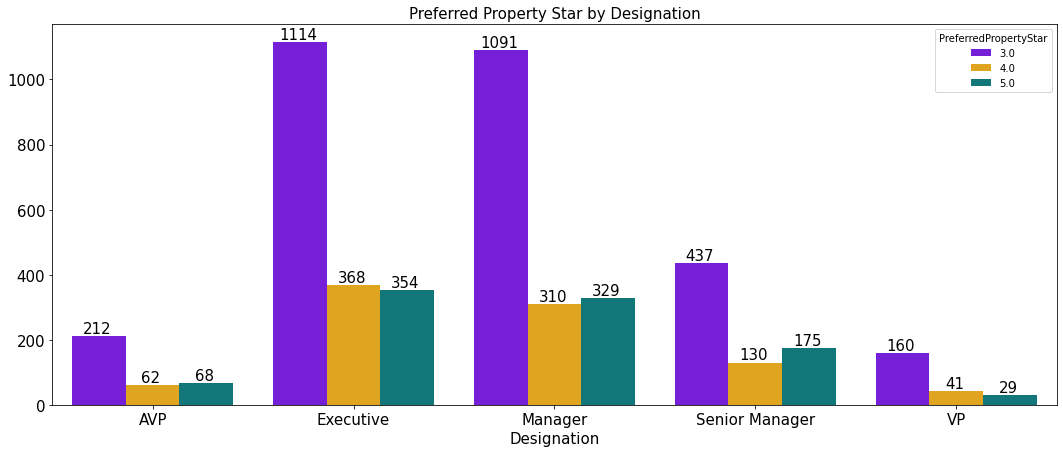

In [534]:
ps_d = df.groupby(["Designation", "PreferredPropertyStar"])["PreferredPropertyStar"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Designation", y = "count", hue = "PreferredPropertyStar", data = ps_d, palette = "prism_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.125, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Preferred Property Star by Designation", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Designation", size = 15)
plt.ylabel(None)
plt.show()

**Number of Trips by Designation**

In [535]:
t_d = df.groupby("Designation")["NumberOfTrips"].agg(["min", "mean", "max"]).round(2).reset_index()
t_d.columns = ["Designation", "Min Trips", "Avg Trips", "Max Trips"]
t_d

Designation  Min Trips  Avg Trips  Max Trips
0             AVP        1.0       3.54        8.0
1       Executive        1.0       3.08        8.0
2         Manager        1.0       3.26        8.0
3  Senior Manager        1.0       3.32        8.0
4              VP        1.0       3.31        8.0

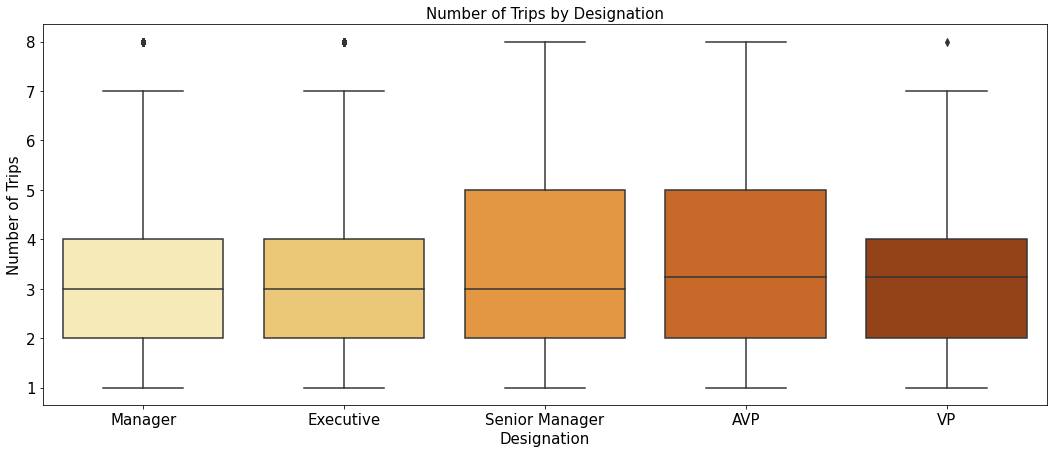

In [536]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "Designation", y = "NumberOfTrips", data = df, palette = "YlOrBr")
plt.title("Number of Trips by Designation", size = 15)
plt.xlabel("Designation", size = 15)
plt.ylabel("Number of Trips", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Passports by Designation**

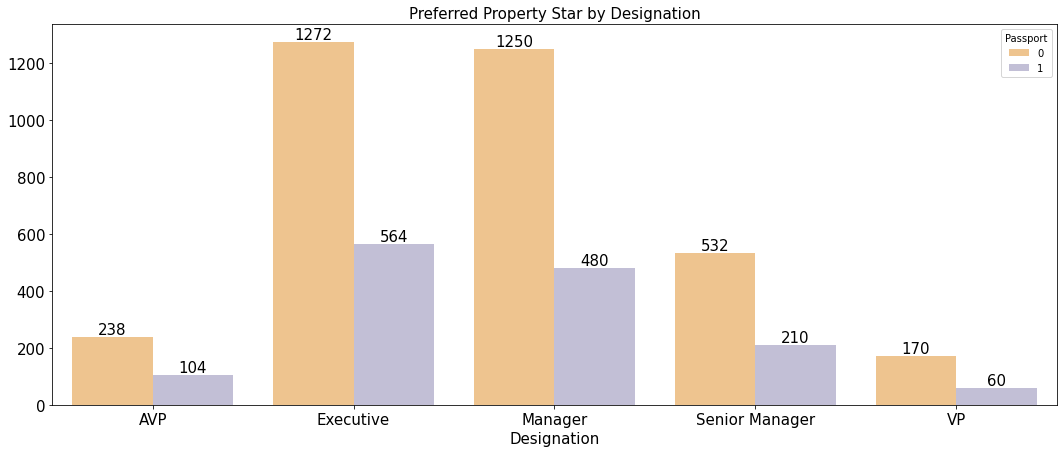

In [537]:
p_d = df.groupby(["Designation", "Passport"])["Passport"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Designation", y = "count", hue = "Passport", data = p_d, palette = "PuOr")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Preferred Property Star by Designation", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Designation", size = 15)
plt.ylabel(None)
plt.show()

**Pitch Satisfaction Score by Designation**

In [538]:
ps_d = df.groupby("Designation")["PitchSatisfactionScore"].agg(["min", "mean", "max"]).round(2).reset_index()
ps_d.columns = ["Designation", "Min Score", "Avg Score", "Max Score"]
ps_d

Designation  Min Score  Avg Score  Max Score
0             AVP          1       3.36          5
1       Executive          1       3.08          5
2         Manager          1       3.01          5
3  Senior Manager          1       3.06          5
4              VP          1       3.23          5

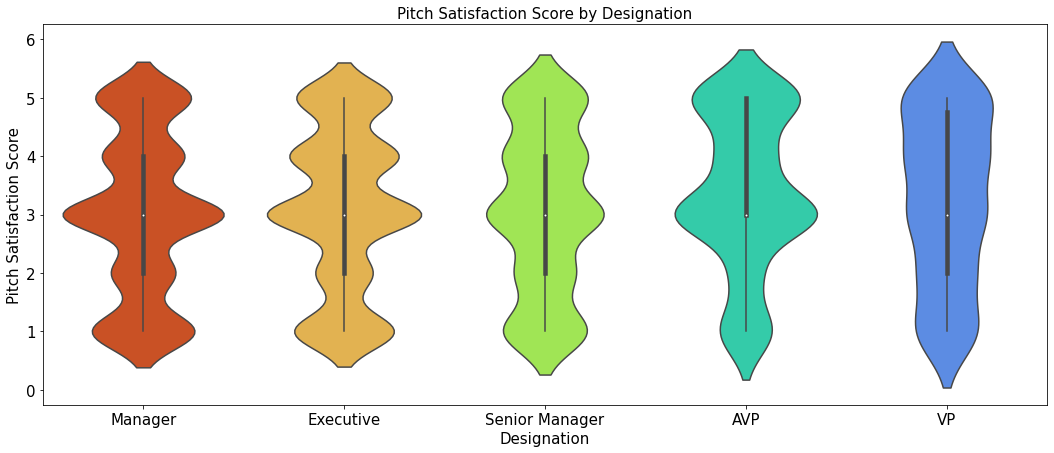

In [539]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "Designation", y = "PitchSatisfactionScore", data = df, palette = "turbo_r")
plt.title("Pitch Satisfaction Score by Designation", size = 15)
plt.xlabel("Designation", size = 15)
plt.ylabel("Pitch Satisfaction Score", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Cars by Designation**

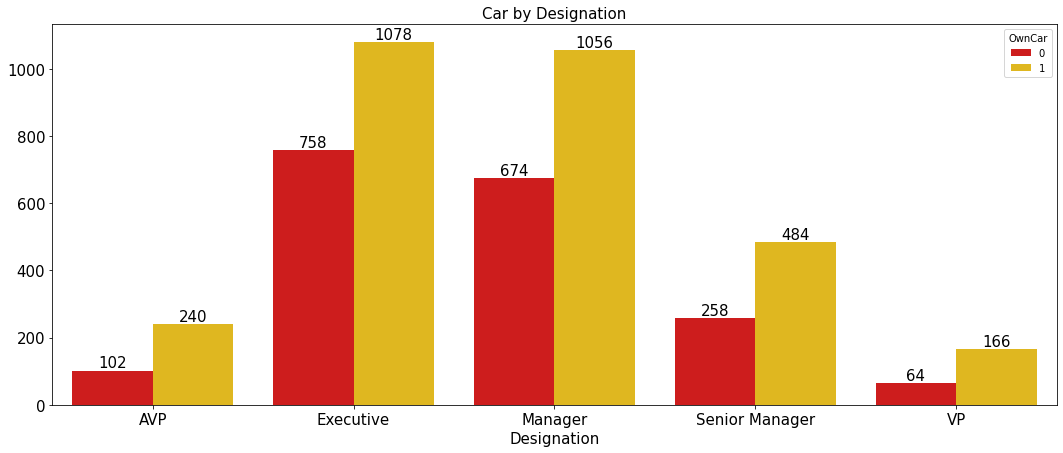

In [540]:
c_d = df.groupby(["Designation", "OwnCar"])["OwnCar"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Designation", y = "count", hue = "OwnCar", data = c_d, palette = "hot")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Car by Designation", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Designation", size = 15)
plt.ylabel(None)
plt.show()

**Number of Children by Designation**

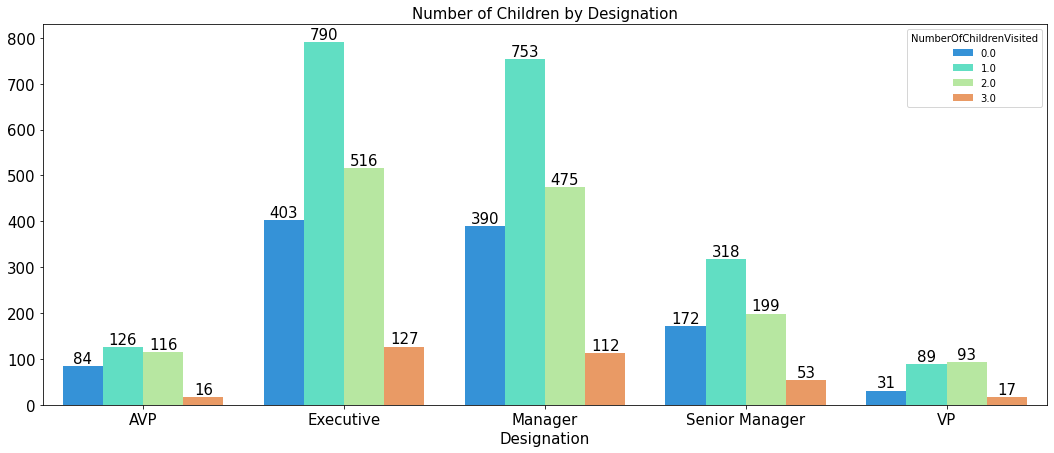

In [541]:
nc_d = df.groupby(["Designation", "NumberOfChildrenVisited"])["NumberOfChildrenVisited"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Designation", y = "count", hue = "NumberOfChildrenVisited", data = nc_d, palette = "rainbow")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.1, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Number of Children by Designation", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Designation", size = 15)
plt.ylabel(None)
plt.show()

**Monthly Income by Designation**

In [542]:
mi_d = df.groupby("Designation")["MonthlyIncome"].agg(["min", "mean", "max"]).round(2).reset_index()
mi_d.columns = ["Designation", "Min Income", "Avg Income", "Max Income"]
mi_d

Designation  Min Income  Avg Income  Max Income
0             AVP     17705.0    32241.05     37502.0
1       Executive     16009.0    20031.00     37868.0
2         Manager      1000.0    22724.45     38525.0
3  Senior Manager     17372.0    26637.75     38395.0
4              VP     17517.0    35878.95     38677.0

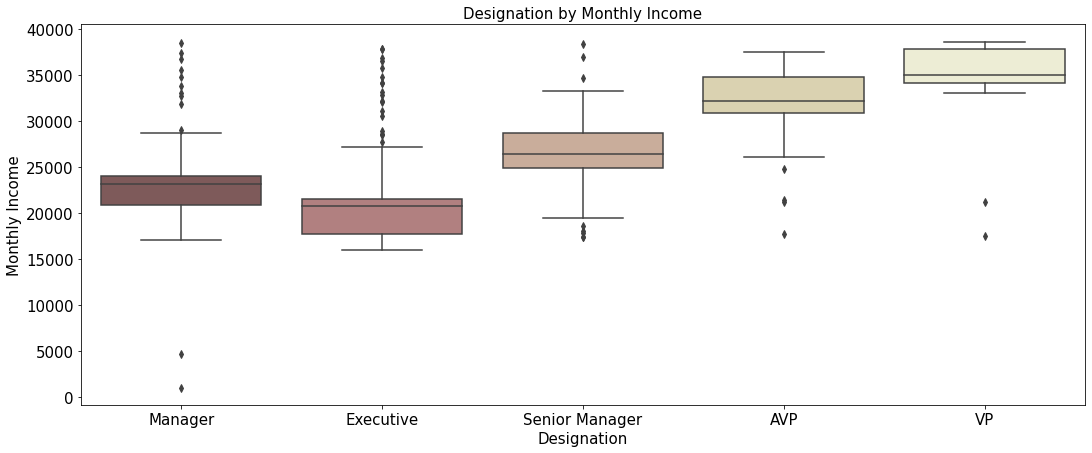

In [543]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "Designation", y = "MonthlyIncome", data = df, palette = "pink")
plt.title("Designation by Monthly Income", size = 15)
plt.xlabel("Designation", size = 15)
plt.ylabel("Monthly Income", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

# Bagging

**Feature Engineering**

In [544]:
df.head()

CustomerID  ProdTaken        Age    TypeofContact  CityTier  \
0      200000          1  41.000000     Self Enquiry         3   
1      200001          0  49.000000  Company Invited         1   
2      200002          1  37.000000     Self Enquiry         1   
3      200003          0  33.000000  Company Invited         1   
4      200004          0  37.622265     Self Enquiry         1   

   DurationOfPitch      Occupation  Gender  NumberOfPersonVisited  \
0              6.0        Salaried  Female                      3   
1             14.0        Salaried    Male                      3   
2              8.0     Free Lancer    Male                      3   
3              9.0        Salaried  Female                      2   
4              8.0  Small Business    Male                      2   

   NumberOfFollowups ProductPitched  PreferredPropertyStar MaritalStatus  \
0                3.0         Deluxe                    3.0        Single   
1                4.0         Deluxe                    4.0      Divorced   
2                4.0          Basic                    3.0        Single   
3                3.0          Basic                    3.0      Divorced   
4                3.0          Basic                    4.0      Divorced   

   NumberOfTrips  Passport  PitchSatisfactionScore  OwnCar  \
0            1.0         1                       2       1   
1            2.0         0                       3       1   
2            7.0         1                       3       0   
3            2.0         1                       5       1   
4            1.0         0                       5       1   

   NumberOfChildrenVisited Designation  MonthlyIncome  
0                      0.0     Manager        20993.0  
1                      2.0     Manager        20130.0  
2                      0.0   Executive        17090.0  
3                      1.0   Executive        17909.0  
4                      0.0   Executive        18468.0

In [545]:
# features
features = df[["PitchSatisfactionScore", "ProductPitched", "NumberOfFollowups", "DurationOfPitch"]]
features = pd.get_dummies(features)
features.head()

PitchSatisfactionScore  NumberOfFollowups  DurationOfPitch  \
0                       2                3.0              6.0   
1                       3                4.0             14.0   
2                       3                4.0              8.0   
3                       5                3.0              9.0   
4                       5                3.0              8.0   

   ProductPitched_Basic  ProductPitched_Deluxe  ProductPitched_King  \
0                     0                      1                    0   
1                     0                      1                    0   
2                     1                      0                    0   
3                     1                      0                    0   
4                     1                      0                    0   

   ProductPitched_Standard  ProductPitched_Super Deluxe  
0                        0                            0  
1                        0                            0  
2                        0                            0  
3                        0                            0  
4                        0                            0

In [546]:
# Target
target = df["Occupation"]

**Decision Tree (Occupation)**

In [547]:
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size = 0.2,
                                                    random_state = 42)

# Instantiate dt
dt = DecisionTreeClassifier(random_state = 42)


dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

score = accuracy_score(y_test, y_pred)
score

0.5543032786885246

accuracy_score is used to measure the performance of decision tree classifier on occupation prediction. accuracy_score is used for classification prediction score. That is the reason this metric is used. Model Performance can be improved by bagging

**Bagging Decision Tree (Occupation)**

In [548]:
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size = 0.2,
                                                    random_state = 42)

dt = DecisionTreeClassifier()

bc = BaggingClassifier(base_estimator = dt, n_estimators = 1000, random_state = 42, n_jobs = -1)

bc.fit(x_train, y_train)

y_pred = bc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Model =", accuracy)

Accuracy of Model = 0.5706967213114754


**Random Forest (Occupation)**

In [549]:
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size = 0.2,
                                                    random_state = 42)

rf = RandomForestClassifier()

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

score = accuracy_score(y_test, y_pred)
score

0.5461065573770492

**Bagging Random Forrest (Occupation)**

In [550]:
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size = 0.2,
                                                    random_state = 42)

rf = RandomForestClassifier()

bc = BaggingClassifier(base_estimator = rf, n_estimators = 10, random_state = 1, n_jobs = -1)

bc.fit(x_train, y_train)

y_pred = bc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Model =", accuracy)

Accuracy of Model = 0.5614754098360656


### Adaboost (Occupation)

In [551]:
seed = 2
kfold = KFold(n_splits = 10, random_state = seed)

num_trees = 10

model = AdaBoostClassifier(n_estimators = num_trees, random_state = seed)

results = cross_val_score(model, features, target, cv = kfold)
print(results.mean())

0.45696721311475413


### Gradient Boost (Occupation)

In [552]:
seed = 2
kfold = KFold(n_splits = 10, random_state = seed)

num_trees = 10

model = GradientBoostingClassifier(n_estimators = num_trees, random_state = seed)

results = cross_val_score(model, features, target, cv = kfold)
print(results.mean())

0.4977459016393443


### XGboost (Occupation)

In [553]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=seed)


# fit model no training data
model = XGBClassifier(verbosity = 0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5375543140906269


### Stacking Classifier

In [554]:
models = [('abc',AdaBoostClassifier()),('gbc', GradientBoostingClassifier()), ("xgb", XGBClassifier())]
stacking = StackingClassifier(estimators=models)

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

stacking.fit(X_train, y_train)

y_pred = stacking.predict(X_test)

score = accuracy_score(y_test, y_pred)

score

0.569672131147541

In [555]:
# features
X = df[["PitchSatisfactionScore", "ProductPitched", "NumberOfFollowups", "DurationOfPitch"]]
X = pd.get_dummies(X)

# Target
y = df["Gender"]

**Decision Tree (Gender)**

In [556]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

# Instantiate dt
dt = DecisionTreeClassifier(random_state = 42)


dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

score = accuracy_score(y_test, y_pred)
score

0.6188524590163934

**Bagging Decision Tree (Gender)**

In [557]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

dt = DecisionTreeClassifier()

bc = BaggingClassifier(base_estimator = dt, n_estimators = 500, random_state = 2, n_jobs = -1)

bc.fit(x_train, y_train)

y_pred = bc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Model =", accuracy)

Accuracy of Model = 0.6260245901639344


**Random Forest (Gender)**

In [558]:
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

rf = RandomForestClassifier()

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

score = accuracy_score(y_test, y_pred)
score

0.6096311475409836

**Bagging Random Forrest (Gender)**

In [559]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 21)

rf = RandomForestClassifier()

bc = BaggingClassifier(base_estimator = rf, n_estimators = 9, random_state = 1, n_jobs = -1)

bc.fit(x_train, y_train)

y_pred = bc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Model =", accuracy)

Accuracy of Model = 0.6188524590163934


### Adaboost (Gender)

In [560]:
seed = 2
kfold = KFold(n_splits = 10, random_state = seed)

num_trees = 10

model = AdaBoostClassifier(n_estimators = num_trees, random_state = seed)

results = cross_val_score(model, X, y, cv = kfold)
print(results.mean())

0.6


### Gradient Boost (Gender)

In [561]:
seed = 2
kfold = KFold(n_splits = 10, random_state = seed)

num_trees = 10

model = GradientBoostingClassifier(n_estimators = num_trees, random_state = seed)

results = cross_val_score(model, X, y, cv = kfold)
print(results.mean())

0.6012295081967213


### XGboost (Gender)

In [562]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


# fit model no training data
model = XGBClassifier(verbosity = 0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6021104903786468


### Stacking Classifier

In [563]:
models = [('abc',AdaBoostClassifier()),('gbc', GradientBoostingClassifier()), ("xgb", XGBClassifier())]
stacking = StackingClassifier(estimators=models)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

stacking.fit(X_train, y_train)

y_pred = stacking.predict(X_test)

score = accuracy_score(y_test, y_pred)

score

0.6262295081967213

In [564]:
# features
X = df[["PitchSatisfactionScore", "ProductPitched", "NumberOfFollowups", "DurationOfPitch"]]
X = pd.get_dummies(X)

# Target
y = df["MaritalStatus"]

**Decision Tree (Marital Status)**

In [565]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

# Instantiate dt
dt = DecisionTreeClassifier(random_state = 42)


dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

score = accuracy_score(y_test, y_pred)
score

0.41700819672131145

**Bagging Decision Tree (Marital Status)**

In [566]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

dt = DecisionTreeClassifier()

bc = BaggingClassifier(base_estimator = dt, n_estimators = 500, random_state = 2, n_jobs = -1)

bc.fit(x_train, y_train)

y_pred = bc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Model =", accuracy)

Accuracy of Model = 0.4385245901639344


**Random Forest (Marital Status)**

In [567]:
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

rf = RandomForestClassifier()

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

score = accuracy_score(y_test, y_pred)
score

0.4344262295081967

**Bagging Random Forrest (Marital Status)**

In [568]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

rf = RandomForestClassifier()

bc = BaggingClassifier(base_estimator = rf, n_estimators = 10, random_state = 1, n_jobs = -1)

bc.fit(x_train, y_train)

y_pred = bc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Model =", accuracy)

Accuracy of Model = 0.4456967213114754


### Adaboost (Marital Status)

In [569]:
seed = 2
kfold = KFold(n_splits = 10, random_state = seed)

num_trees = 10

model = AdaBoostClassifier(n_estimators = num_trees, random_state = seed)

results = cross_val_score(model, X, y, cv = kfold)
print(results.mean())

0.47438524590163933


### Gradient Boost (Marital Status)

In [570]:
seed = 2
kfold = KFold(n_splits = 10, random_state = seed)

num_trees = 10

model = GradientBoostingClassifier(n_estimators = num_trees, random_state = seed)

results = cross_val_score(model, X, y, cv = kfold)
print(results.mean())

0.5028688524590164


### XGBoost (Marital Status)

In [571]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


# fit model no training data
model = XGBClassifier(verbosity = 0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.45685909373060213


### Stacking Classifier (Marital Status)

In [572]:
models = [('abc',AdaBoostClassifier()),('gbc', GradientBoostingClassifier()), ("xgb", XGBClassifier())]
stacking = StackingClassifier(estimators=models)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

stacking.fit(X_train, y_train)

y_pred = stacking.predict(X_test)

score = accuracy_score(y_test, y_pred)

score

0.5155737704918033

In [573]:
# features
X = df[["PitchSatisfactionScore", "ProductPitched", "NumberOfFollowups", "DurationOfPitch"]]
X = pd.get_dummies(X)

# Target
y = df["Designation"]

**Decision Tree (Designation)**

In [574]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 2)

# Instantiate dt
dt = DecisionTreeClassifier(random_state = 1)


dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

score = accuracy_score(y_test, y_pred)
score

1.0

**Bagging Decision Tree (Designation)**

In [575]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

dt = DecisionTreeClassifier()

bc = BaggingClassifier(base_estimator = dt, n_estimators = 500, random_state = 2, n_jobs = -1)

bc.fit(x_train, y_train)

y_pred = bc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Model =", accuracy)

Accuracy of Model = 1.0


**Random Forest (Designation)**

In [576]:
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

rf = RandomForestClassifier()

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

score = accuracy_score(y_test, y_pred)
score

1.0

**Bagging Random Forrest (Designation)**

In [577]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

rf = RandomForestClassifier()

bc = BaggingClassifier(base_estimator = rf, n_estimators = 10, random_state = 1, n_jobs = -1)

bc.fit(x_train, y_train)

y_pred = bc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Model =", accuracy)

Accuracy of Model = 1.0


### Adaboost (Designation)

In [578]:
seed = 2
kfold = KFold(n_splits = 10, random_state = seed)

num_trees = 10

model = AdaBoostClassifier(n_estimators = num_trees, random_state = seed)

results = cross_val_score(model, X, y, cv = kfold)
print(results.mean())

1.0


### Gradient Boost (Designation)

In [580]:
seed = 2
kfold = KFold(n_splits = 10, random_state = seed)

num_trees = 10

model = GradientBoostingClassifier(n_estimators = num_trees, random_state = seed)

results = cross_val_score(model, X, y, cv = kfold)
print(results.mean())

1.0


### XGBoost (Designation)

In [581]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


# fit model no training data
model = XGBClassifier(verbosity = 0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


### Stacking Classifier (Dedsignation)

In [582]:
models = [('abc',AdaBoostClassifier()),('gbc', GradientBoostingClassifier()), ("xgb", XGBClassifier())]
stacking = StackingClassifier(estimators=models)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

stacking.fit(X_train, y_train)

y_pred = stacking.predict(X_test)

score = accuracy_score(y_test, y_pred)

score

1.0